In [1]:
#==================================================================
#Program: SLADS_TensorFlow_Simulation
#Author(s): David Helminiak
#Date Created: 13 February 2019
#Date Last Modified: May 2019
#Changelog: 0.1 - Combined Structure            - February 2019
#           0.2 - Combined Train/Test           - February 2019
#           0.3 - Gaussian CPU Multi-Threading  - February 2019
#           0.4 - Restructuring of dir vars     - March 2019
#           0.5 - Clearer code progress viz     - March 2019
#           0.6 - Plotting Statistics           - March 2019
#           0.61 - Initial/Var Mask Generation  - May 2019           
#           0.7 - Line Scanning                 - May 2019
#           0.8 - .RAW usage
#           0.9 - Continuous value prediction
#==================================================================
#==================================================================

#==================================================================
#ADDITIONAL NOTES:
#==================================================================
#Add Breakpoint anywhere in the program: 
#Tracer()()
#
#For jupyter-notebook, resize cells to fit to length of window
#from IPython.core.display import display, HTML
#display(HTML("<style>.container {width:80% !important;}</style>"))
#
#NOTE - MeasuredIdxs does not contain the initial mask idxs
#
#==================================================================
#==================================================================

#==================================================================
#LIBRARY IMPORTS
#==================================================================
from __future__ import absolute_import, division, print_function
#import tensorflow as tf
#tf.enable_eager_execution() #Evaluate all operations without building graphs
import cv2
import pandas as pd
import numpy as np
import numpy.matlib as matlib
import matplotlib.pyplot as plt
import multiprocessing
import os
import PIL
import PIL.ImageOps  
import math
import glob
import re
import random
import sys
import scipy
import shutil
import time
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
from IPython import display
from IPython.core.debugger import Tracer
from joblib import Parallel, delayed
from matplotlib.pyplot import figure
from PIL import Image
from scipy import misc
from scipy.io import loadmat
from scipy.io import savemat
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.neighbors import NearestNeighbors
from skimage.measure import compare_ssim
from skimage import filters
from sobol import *
from tqdm.auto import tqdm
#from tensorflow import keras
#==================================================================

In [ ]:
#TIF TO GRAYSCALE

#USER PARAMETERS
#==================================================================
dataPath = r'./TIF_TO_CONVERT/' #Set path to where .csv datasets are located
outputPath = r'./PNG_OUTPUT/'#Set path to where images should be exported
startXLen, startYLen = 333, 307 #Specify the image/data starting dimensions; #columns, #rows

#DATA IMPORTATION & VARIABLE SETUP
#==================================================================
print('IMPORTING DATA')
dataFileNames = glob.glob(dataPath + "/*.tif") #Obtain filenames for each set
zLen = len(dataFileNames) #Find total number of files imported
datasets = np.zeros((zLen, startYLen, startXLen)) #Construct structure for data; #set, max(#row, #column), max(#row, #column)
for file in dataFileNames: #For each of the filenames
    dataset = Image.open(file).convert('L') #Read in an image as grayscale
    dataset = dataset.resize([256,256])
    dataset = np.asarray(dataset,dtype=np.float64).reshape((dataset.size[1],dataset.size[0])) #Flatten the image
    datasetXLen, datasetYLen = dataset.shape[1], dataset.shape[0] #Obtain the set's dimensions
    grayImage=Image.fromarray(dataset).convert("L")
    outputName = file
    outputName = outputName[outputName.startswith(dataPath) and len(dataPath):]
    outputName = re.sub('\.tif$', '', outputName)
    grayImage.save(outputPath+outputName+'.png')
print('FINISHED EXPORTING IMAGES')


In [ ]:
#MATLAB PLOTTING TOOLS

Mask = misc.imread('a.png',flatten = 'True')
ReconImage = misc.imread('a.png',flatten = 'True')
img = misc.imread('a.png',flatten = 'True')

#Moved out plotting code into only function it is used
MSE = (np.sum((ReconImage.astype("float") - img.astype("float")) ** 2))/(float(ReconImage.shape[0] * ReconImage.shape[1]))
SSIM = compare_ssim(ReconImage, img, multichannel=True)

#Set plot formatting
font = {'family' : 'normal', 'size' : 18}
plt.rc('font', **font)


f = plt.figure(figsize=(20,8))

plt.subplots_adjust(wspace = 0.3)
plt.suptitle("MSE: %.3f, SSIM: %.3f" % (MSE, SSIM), fontsize=20, fontweight='bold', y = 0.9)
#plt.figure(figsize=(3, 3))
ax1 = f.add_subplot(131)
ax1.imshow(Mask, cmap='gist_heat')
ax1.set_title('Sampled Mask')
ax2 = f.add_subplot(132)       
ax2.imshow(ReconImage)
ax2.set_title('Reconstructed Image')
ax3 = f.add_subplot(133)
ax3.imshow(img)
ax3.set_title('Ground-truth Image')
plt.savefig('./test' + '.png')


In [ ]:

def gausKern_parhelper(index, a, temp):
    indexVal = temp(index)
    Filter = generateGaussianKernel(sigma[indexVal],WindowSize) #Form a Gaussian filter
    temp[:,index] = ImgAsBlocksOnlyUnmeasured[:,indexVal]*Filter #Calculate an "area" that the c value will capture
    return temp

temp = 
num_threads = multiprocessing.cpu_count() #Determine number of available threads
temp = Parallel(n_jobs=num_threads)(delayed(gausKern_parhelper)(index, a, temp) for index in range(0,len(OrderForRD))) #Perform task in parallel




In [2]:
#==================================================================
#Program: SLADS_TensorFlow_Training
#Author(s): David Helminiak
#Date Created: 13 February 2018
#Date Last Modified: February 2018
#Changelog: 0.1 - Combined Structure            - February 2018
#           0.2 - Combined Train/Test           - February 2018
#           0.3 - Gaussian CPU Multi-Threading  - February 2018
#==================================================================
#==================================================================

#==================================================================
#ADDITIONAL NOTES:
#==================================================================
#Add Breakpoint anywhere in the program: 
#from IPython.core.debugger import Tracer; Tracer()() 
#==================================================================
#==================================================================

#==================================================================
#LIBRARY IMPORTS
#==================================================================
from __future__ import absolute_import, division, print_function

import pandas as pd
import numpy as np
import numpy.matlib as matlib
import matplotlib.pyplot as plt
import multiprocessing
import os
import PIL
import math
import glob
import re
import random
import sys
import scipy
import shutil
import time
import warnings
warnings.filterwarnings("ignore")
from IPython import display
from joblib import Parallel, delayed
from matplotlib.pyplot import figure
from PIL import Image
from scipy import misc
from scipy.io import loadmat
from scipy.io import savemat
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.neighbors import NearestNeighbors
from skimage.measure import compare_ssim
from tensorflow import keras
#==================================================================


ImportError: cannot import name 'keras'

In [ ]:
temp = [[1,1,1,1,1],[0, 0, 0, 0, 0]]
temp

In [ ]:
temp[0][1]

In [ ]:
import numpy as np

In [ ]:
SizeImage = [128,128]
#Create a blank mask
Mask = np.zeros((SizeImage[0],SizeImage[1]))


In [ ]:
    UnifMatrix = np.random.rand(SizeImage[0],SizeImage[1])
    Mask = UnifMatrix<(MeasurementPercentageVector[m]/100)

In [ ]:
linesToScan = []
for i in range(0,math.floor(SizeImage[0]*(5/100))):
    notFound = True
    while notFound:
        lineNumber = random.randint(1,SizeImage[0])
        if lineNumber not in linesToScan:
            notFound = False
            linesToScan.append(lineNumber)





In [ ]:
import numpy as np

In [ ]:
test = np.load('./ResultsAndData/InitialSamplingMasks/H_1_64_64_Percentage_1.0_lineScanning_False/InitialMask.npy')       





In [ ]:
from datetime import datetime
from sobol import *
SizeImage=[64,64]
lineScanning = False
MaskType = 'H'

seed = int(((datetime.now()).microsecond))
Mask = np.zeros((SizeImage[0],SizeImage[1]))
if not lineScanning:
    UnifMatrix = []
    if MaskType == 'H':
        samplePoints = round((5/100)*(SizeImage[0]*SizeImage[1]))
        for i in range(0,samplePoints):
            row, seed = i4_uniform(0, SizeImage[0]-1, seed)
            column, seed = i4_uniform(0, SizeImage[1]-1, seed)
            Mask[row, column] = 1
        UnifMatrix = np.asarray(UnifMatrix)
    elif MaskType == 'U':
        UnifMatrix = np.random.rand(SizeImage[0],SizeImage[1])
        Mask = UnifMatrix<(5/100)
    else:
        sys.exit('Error!!! - undefined handeling for the generation of the MaskType indicated')




In [ ]:
Mask==1

In [ ]:
int(np.sum(Mask)/255)/(64*64)

In [ ]:
round(0.05*4096)

In [ ]:
int(np.sum(Mask)/255)



In [ ]:
ERDValuesNP = [[1,-5,-1],
              [-2,-2,-2],
              [0,0,0],
              [-1,-1,-1],
              [0,0,0]]

In [ ]:
for i in range(0, len(ERDValuesNP)):
    if [0,0,0] == ERDValuesNP[i]:
        print(i)








In [ ]:

(useSizeImage/2).astype('int')




In [ ]:
Mask[tuple(position)]




In [ ]:
Mask[line.tolist()] = 1


In [114]:
SizeImage = [64,64]

#For manual angle lineScanning 
#What should the angle spacing be for considered angles
manualAngleDiff = 45
manualStartAngle = 0
manualStopAngle = 180-manualAngleDiff


#What points should be used for the initial mask if lineScanning
#C: A line that passes as close as possible to the middle of the image
#S: A spiral pattern
#M: A custom set of points
initialMaskSelection = 'C'

#If using a custom set of points for the initialMaskSelection, specify
initialMaskCustom = [[0,0],[1,1]]




manualAngles = np.linspace(manualStartAngle,manualStopAngle, int(((manualStopAngle-manualStartAngle)/manualAngleDiff)+1)).astype(int)
linesToScan = []
for manualAngle in manualAngles:

    #Mask is upside down and reversed
    theta = manualAngle+90

    #Make a list of all the possible lines in the image for a particular angle
    if theta < 0:
        theta = theta+360
    if theta > 180:
        theta = theta - 180*int(theta/180)
    if theta > 90:
        theta = 90-(theta-90)
        flipX = True
    else:
        flipX = False
    yfact = math.sin(math.radians(theta))
    xfact = math.cos(math.radians(theta))

    #Make the initial line
    currX = 0
    currY = 0
    pts = []
    while currX <= SizeImage[0] and currY <= SizeImage[1]:
        if currX < SizeImage[0] and currY < SizeImage[1] and currX >= 0 and currY >= 0:
            pts.append([int(currX), int(currY)])
        currX = currX + xfact
        currY = currY + yfact
    pts = np.asarray(pd.DataFrame(pts).drop_duplicates())

    if flipX:
        pts[:,0] = np.flip(pts[:,0])

    if theta <= 45:
        #Each column should have only a single value such that shifting does not create duplicate points to scan between >45 and 135
        simppts = []
        for i in range(0,SizeImage[0]):
            columnIdxs = []
            for j in range(0,len(pts)):
                if pts[j][0] == i:
                    columnIdxs.append(pts[j].tolist())
            if len(columnIdxs) > 1:
                simppts.append(columnIdxs[np.argmin(np.asarray(columnIdxs)[:,1])])
            else:
                simppts.append(columnIdxs[0])

        #Shift the line along y until there are no points in range
        simppts = np.asarray(simppts)
        currY = -SizeImage[1]
        while currY <= SizeImage[1]:
            temppts = simppts.copy()
            temppts[:,1] = temppts[:,1]+currY
            line = []
            for i in range(0,len(temppts)):
                xpt, ypt = temppts[i][0], temppts[i][1]
                if xpt < SizeImage[0] and ypt < SizeImage[1] and xpt >= 0 and ypt >= 0:
                    line.append([xpt, ypt])
            if len(line) > 0:
                linesToScan.append(line)
            currY = currY + 1

    else: #theta is greater than 45 deg
        #Each row should have only a single value
        simppts = []
        for i in range(0,SizeImage[0]):
            rowIdxs = []
            for j in range(0,len(pts)):
                if pts[j][1] == i:
                    rowIdxs.append(pts[j].tolist())
            if len(rowIdxs) > 1:
                simppts.append(rowIdxs[np.argmin(np.asarray(rowIdxs)[:,0])])
            else:
                simppts.append(rowIdxs[0])

        #Shift the line along x until there are no points in range
        simppts = np.asarray(simppts)
        currX = -SizeImage[0]
        while currX <= SizeImage[0]:
            temppts = simppts.copy()
            temppts[:,0] = temppts[:,0]+currX
            line = []
            for i in range(0,len(temppts)):
                xpt, ypt = temppts[i][0], temppts[i][1]
                if xpt < SizeImage[0] and ypt < SizeImage[1] and xpt >= 0 and ypt >= 0:
                    line.append([xpt, ypt])
            if len(line) > 0:
                linesToScan.append(line)
            currX = currX + 1

#Make a backup copy of the lines to scan 
originalLinesToScan = linesToScan.copy()

#Select the initial line to scan            
if initialMaskSelection == 'C':
    #Find the line that is closest to the center for the initial scan location
    midIndex = 0
    for i in range(0,len(linesToScan)):
        a = np.average(np.asarray(linesToScan[i])[:,0]) - (SizeImage[0]/2)
        b = np.average(np.asarray(linesToScan[i])[:,1]) - (SizeImage[1]/2)
        d = math.sqrt((a**2)+(b**2))
        if i == 0: minD = d
        if d < minD:
            minD = d
            midIndex = i
    initialMaskPts = linesToScan[midIndex]
else:
    sys.exit('Error!!! - initialMaskSelection criteria specified has not yet been implemented.')

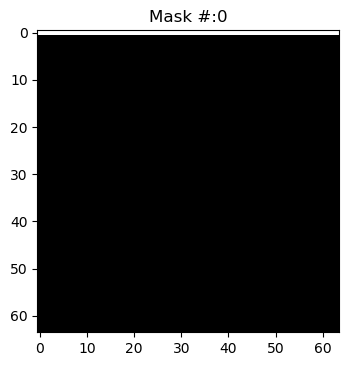

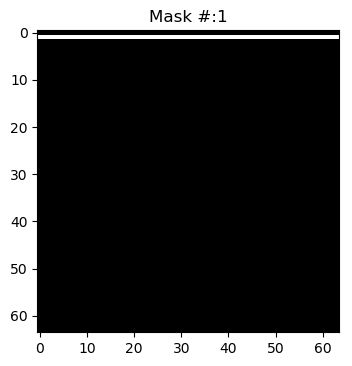

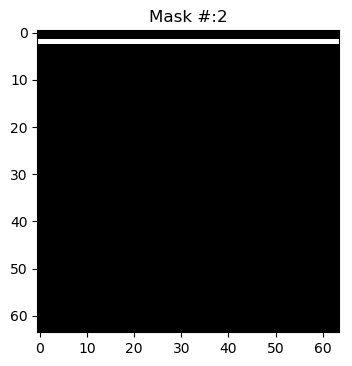

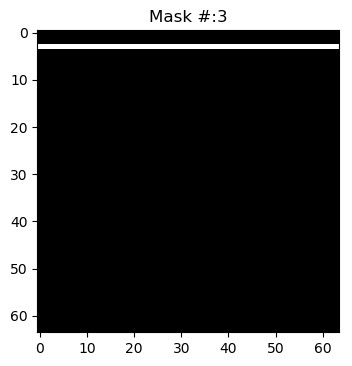

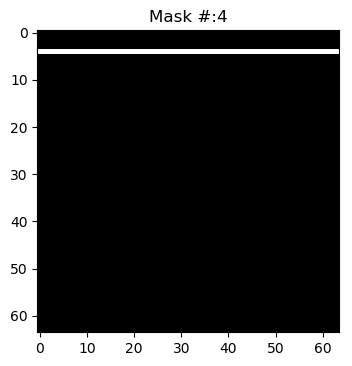

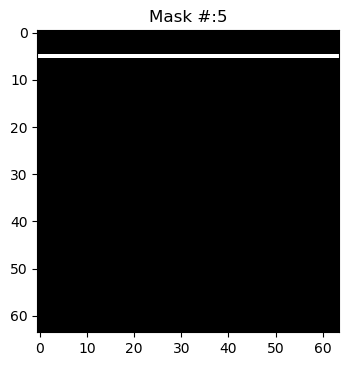

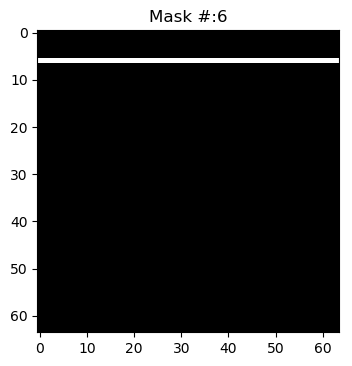

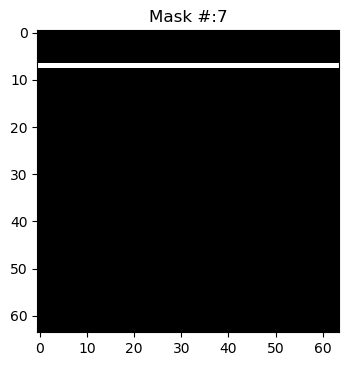

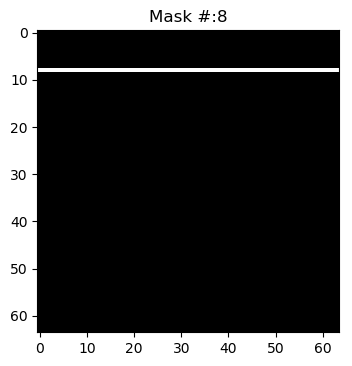

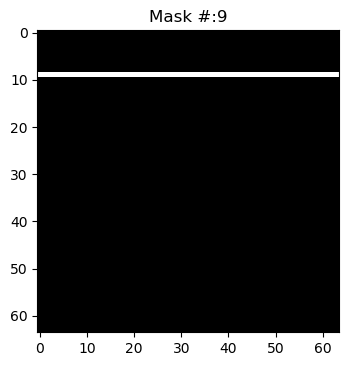

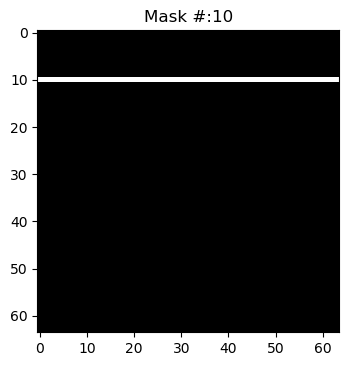

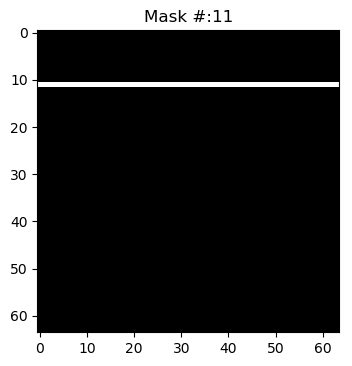

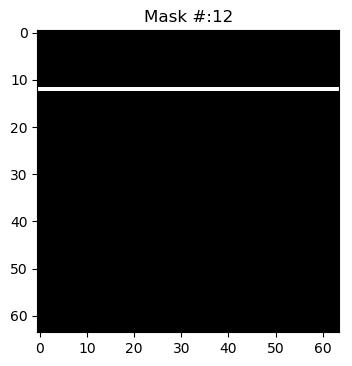

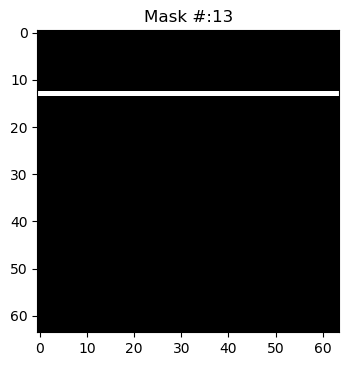

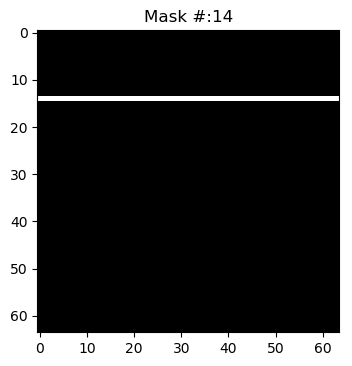

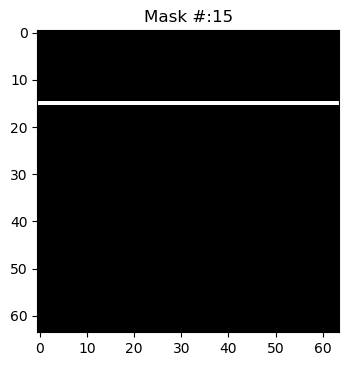

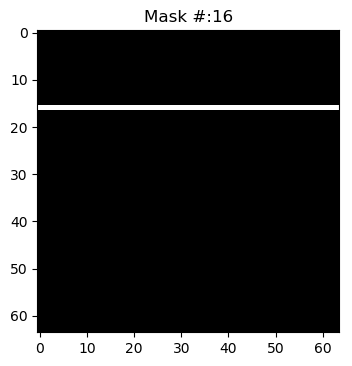

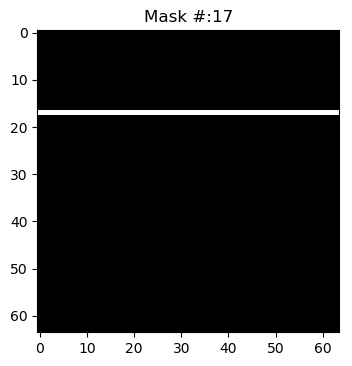

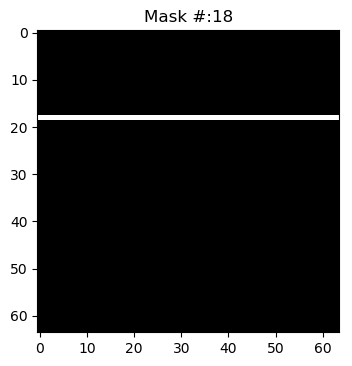

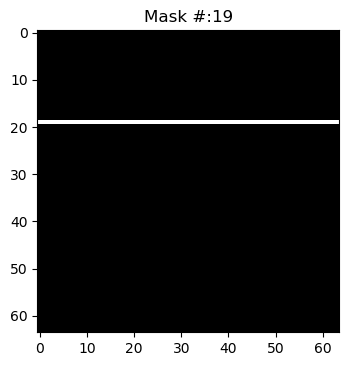

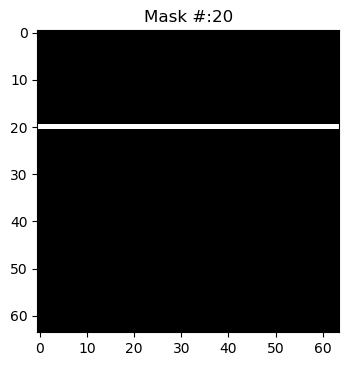

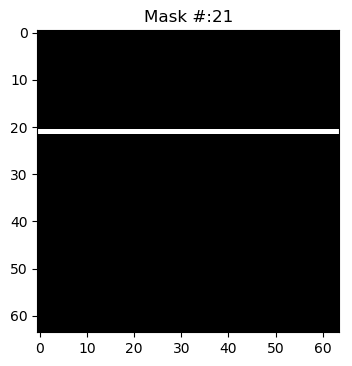

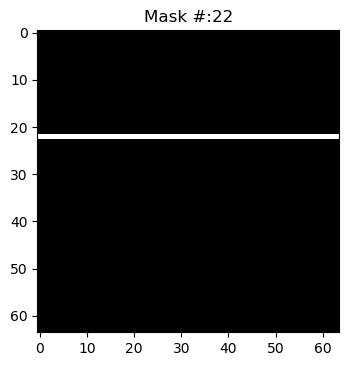

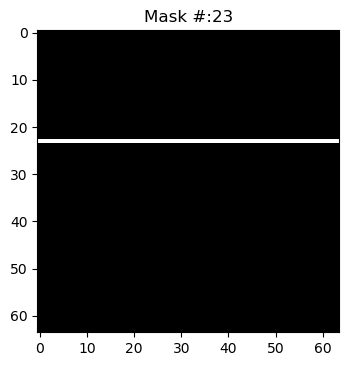

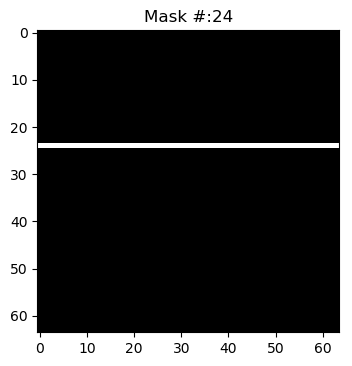

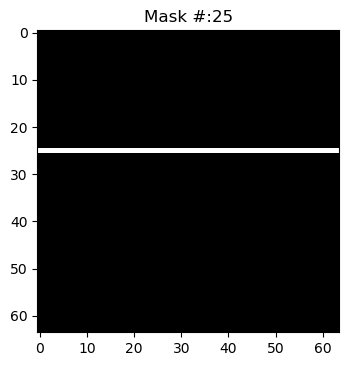

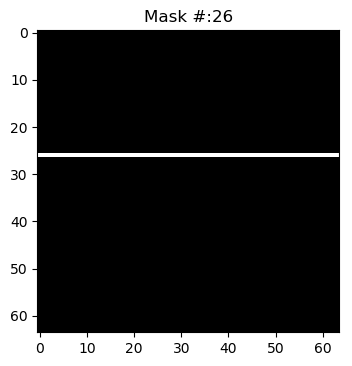

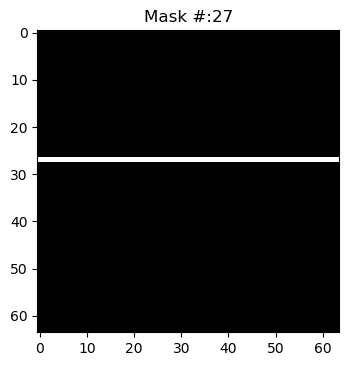

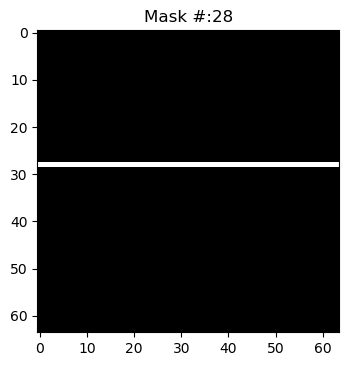

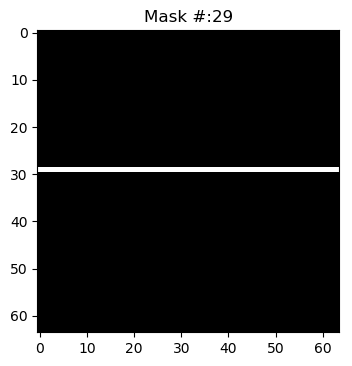

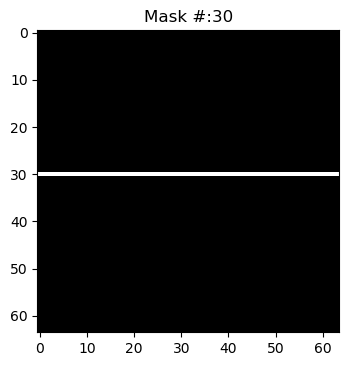

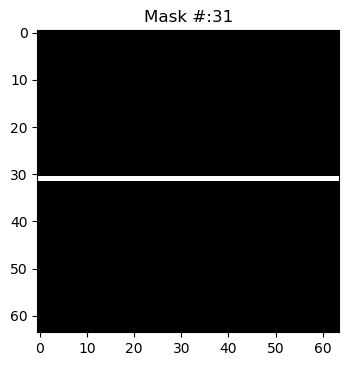

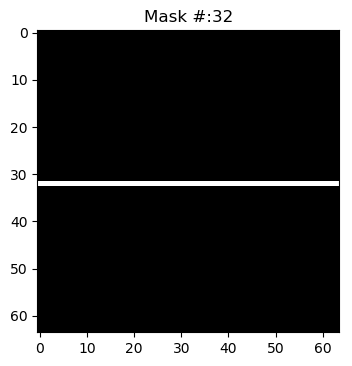

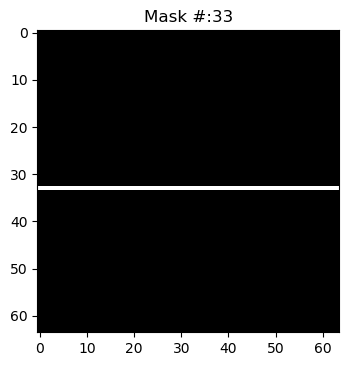

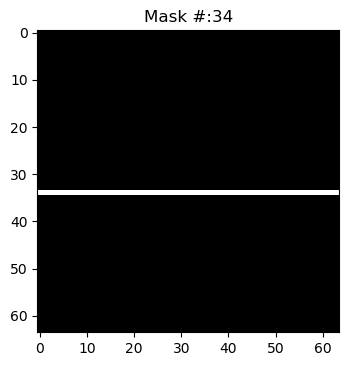

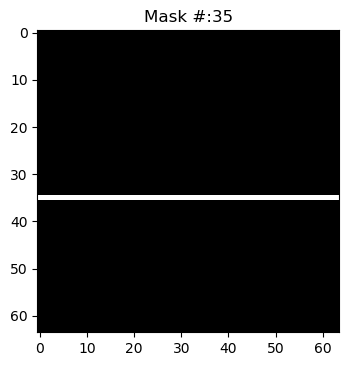

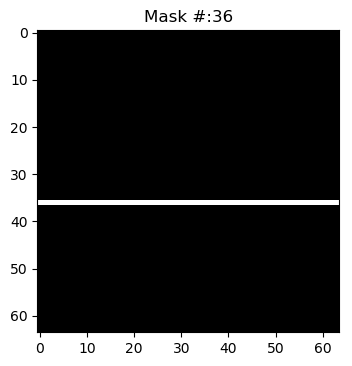

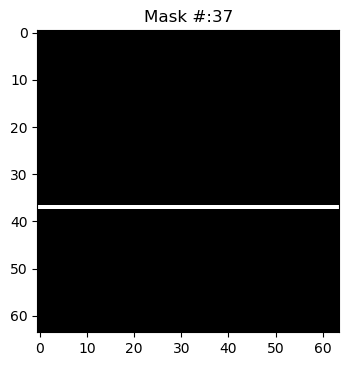

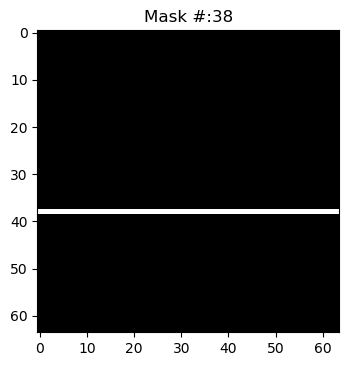

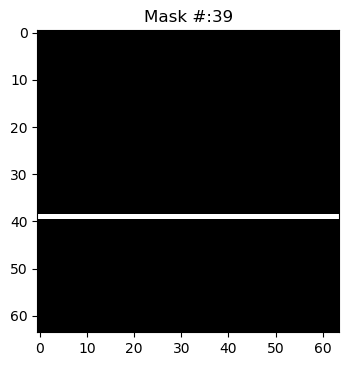

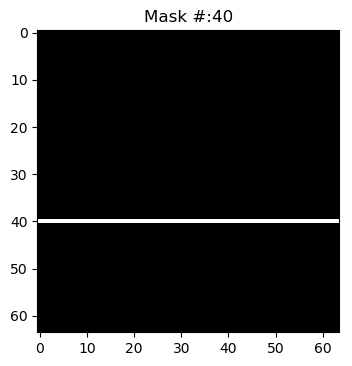

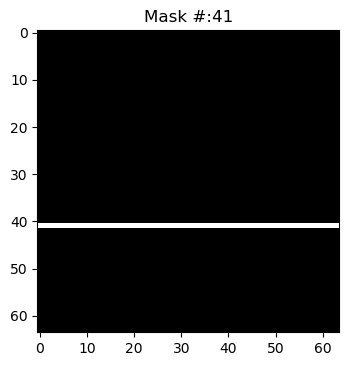

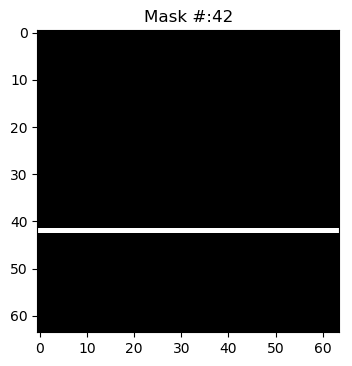

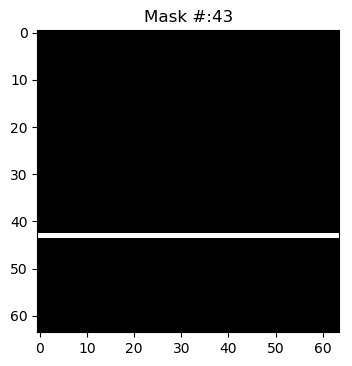

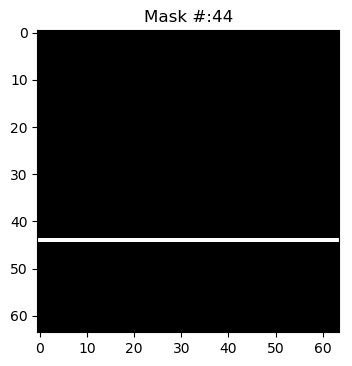

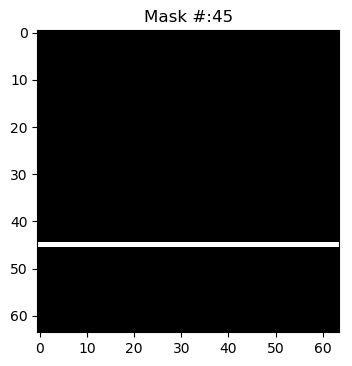

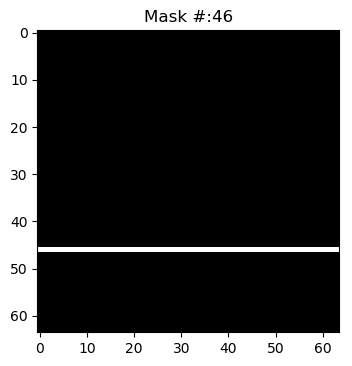

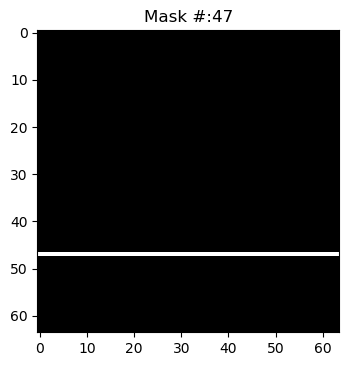

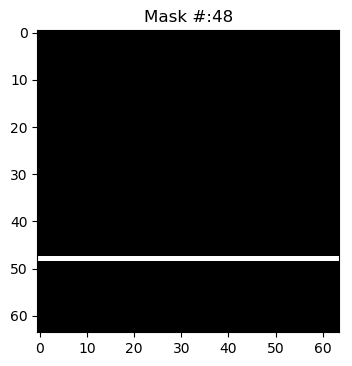

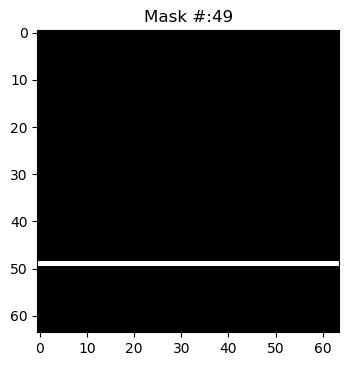

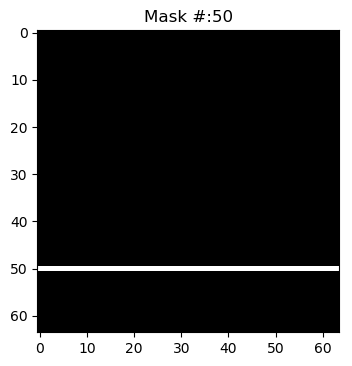

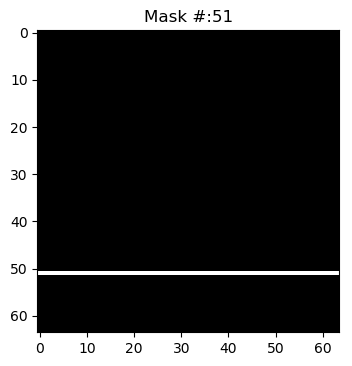

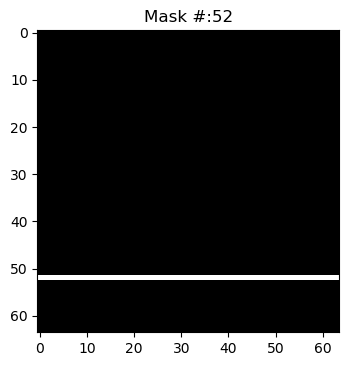

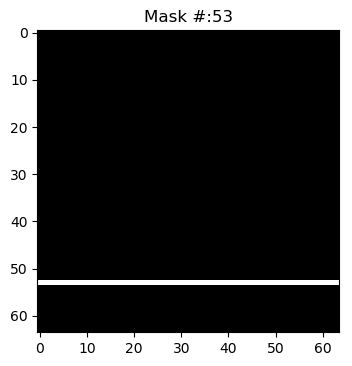

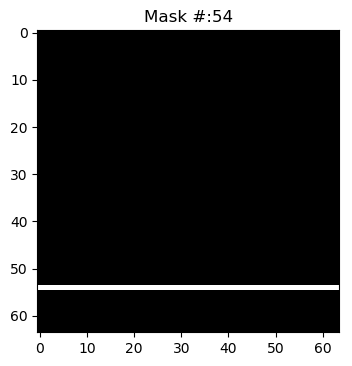

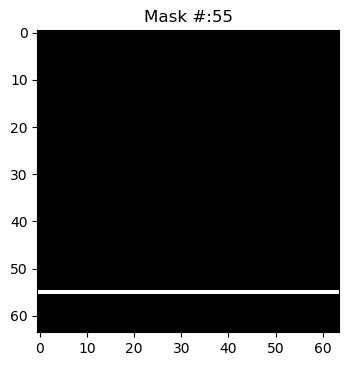

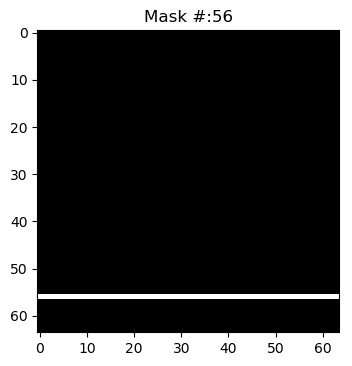

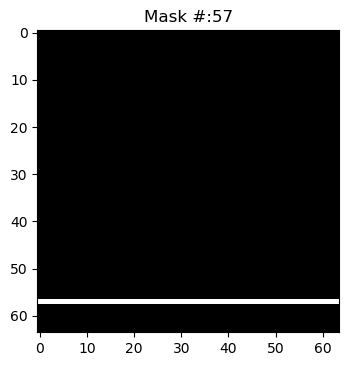

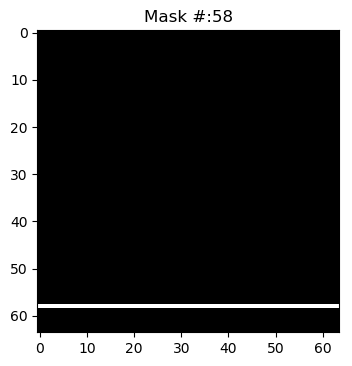

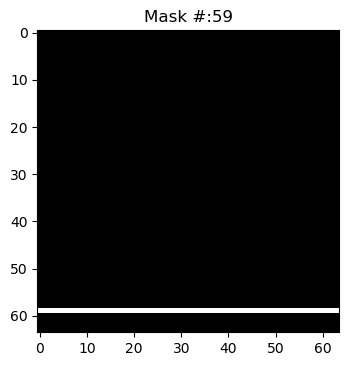

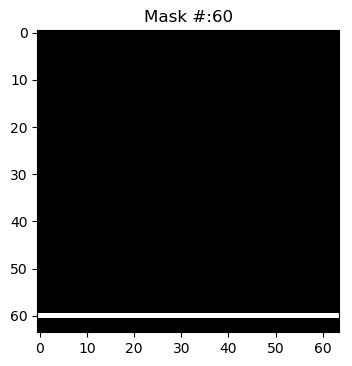

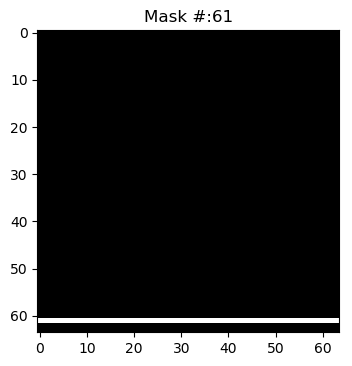

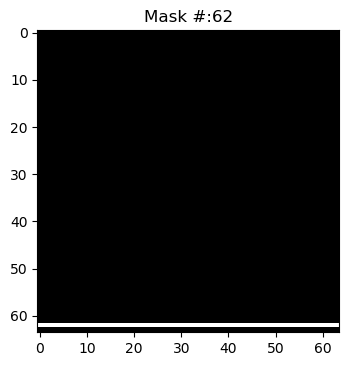

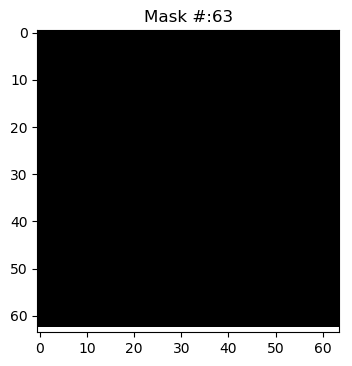

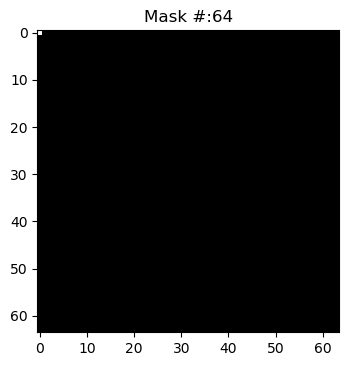

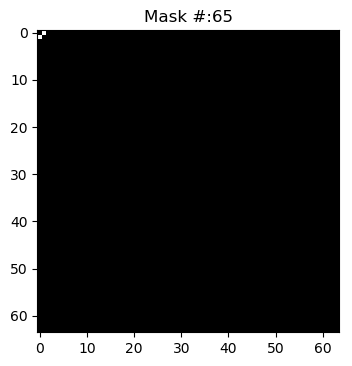

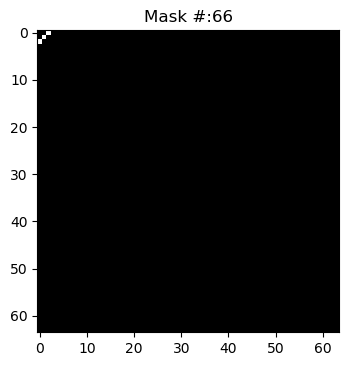

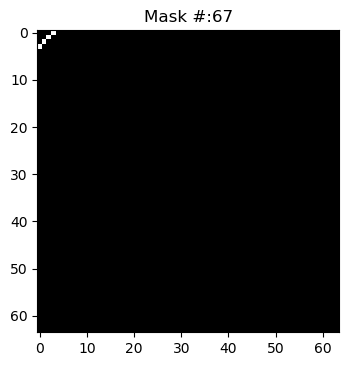

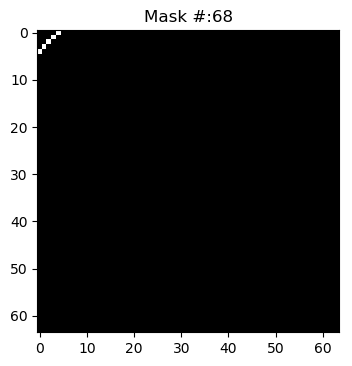

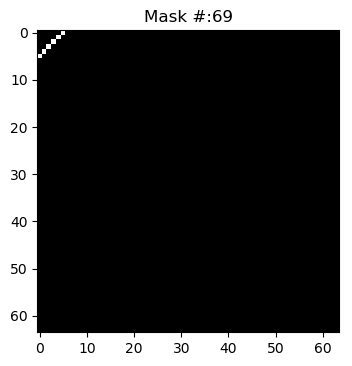

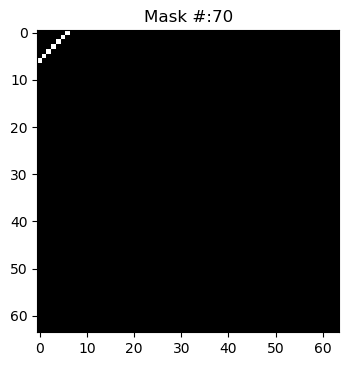

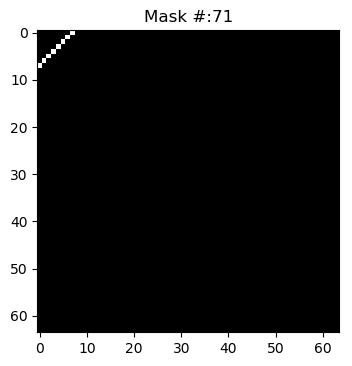

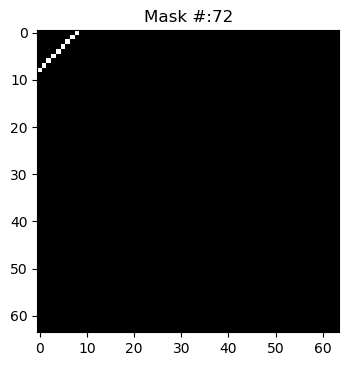

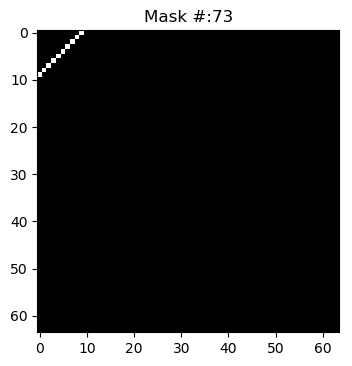

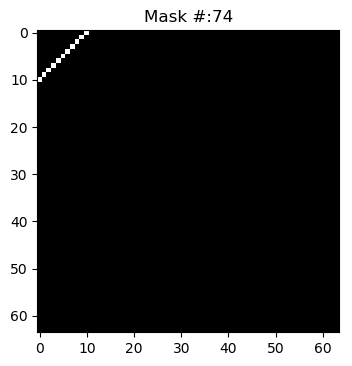

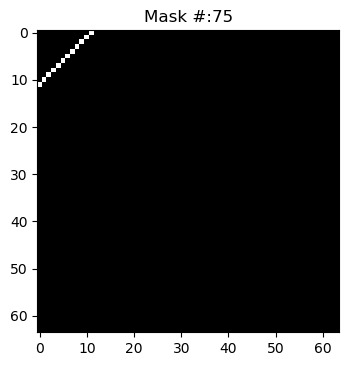

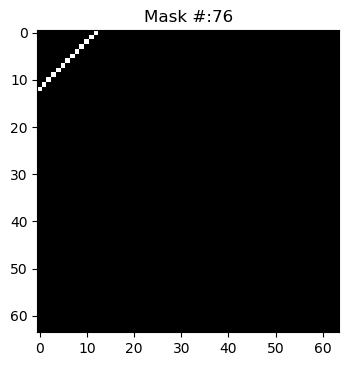

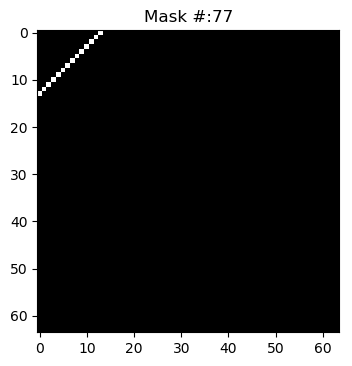

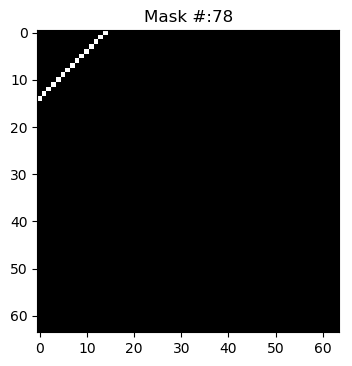

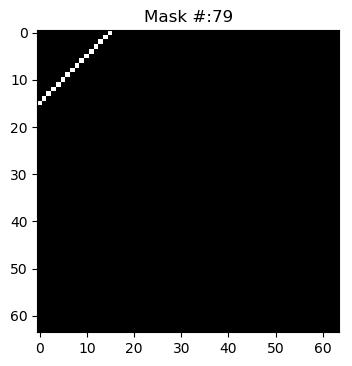

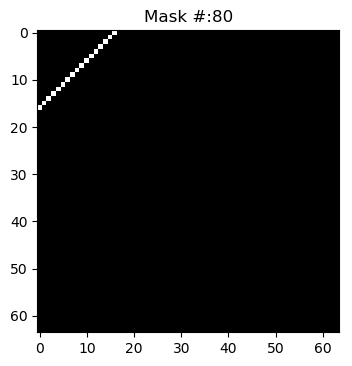

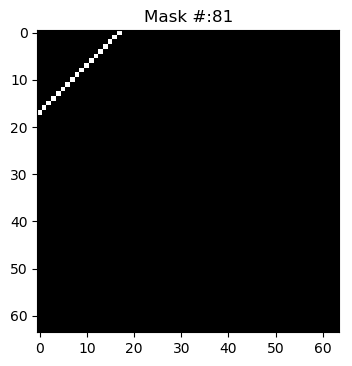

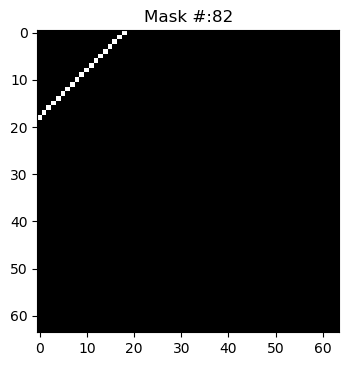

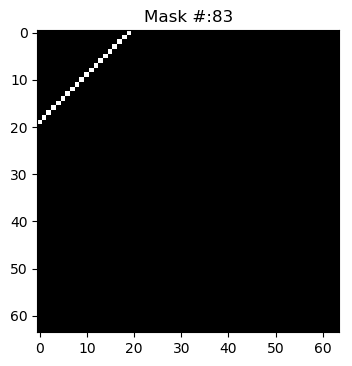

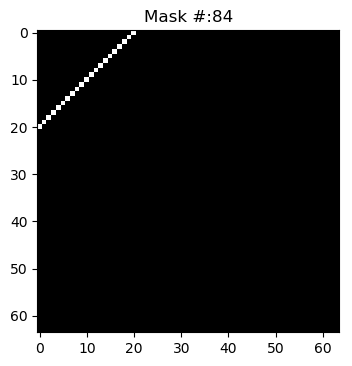

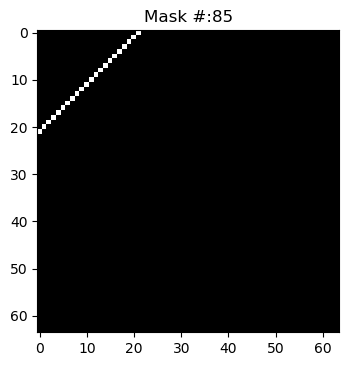

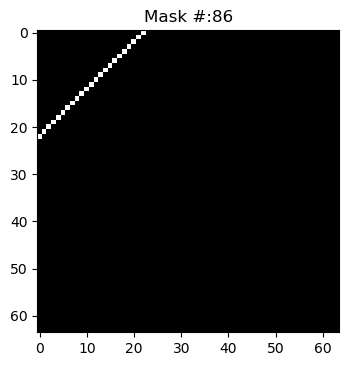

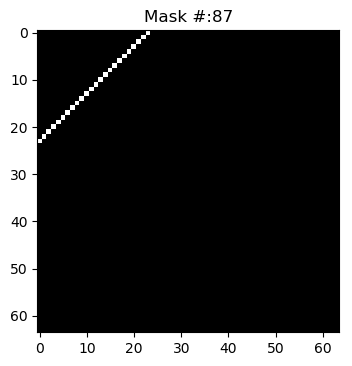

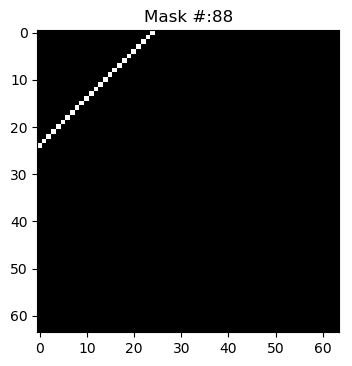

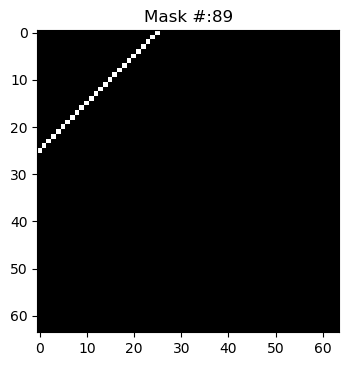

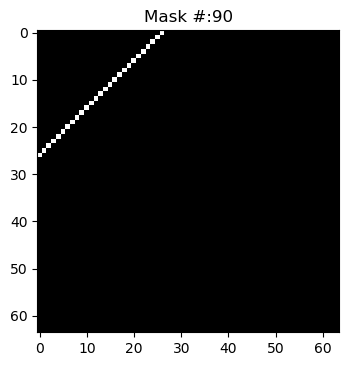

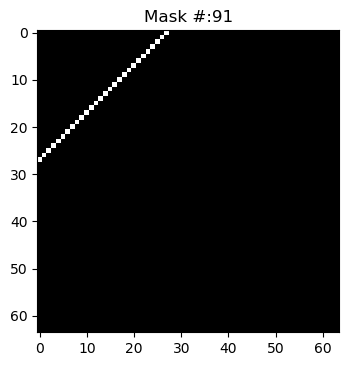

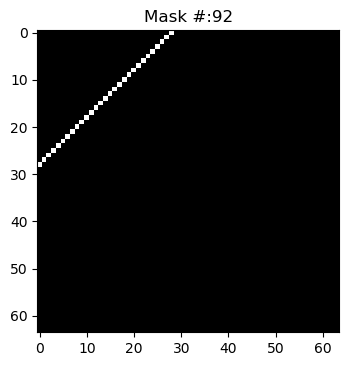

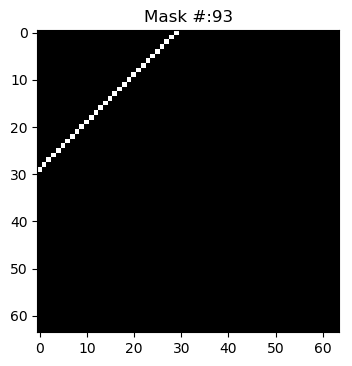

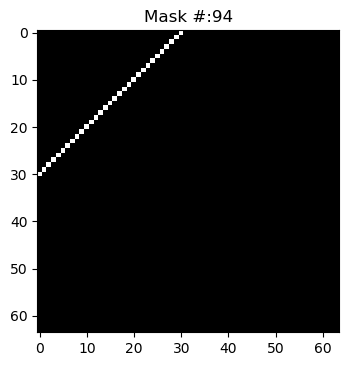

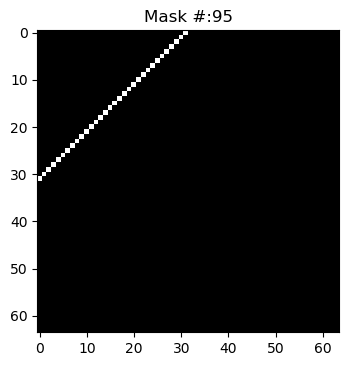

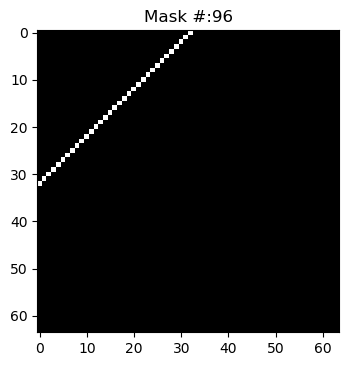

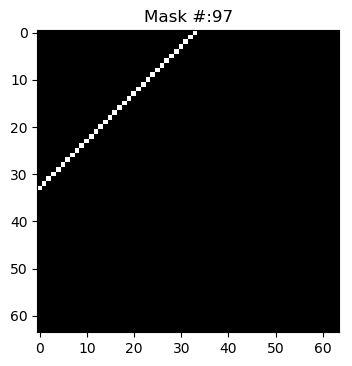

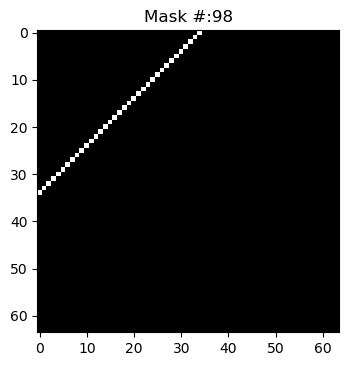

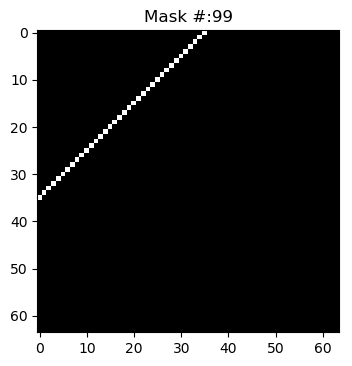

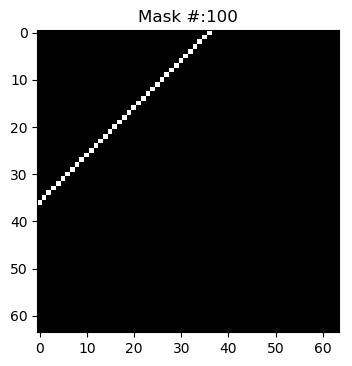

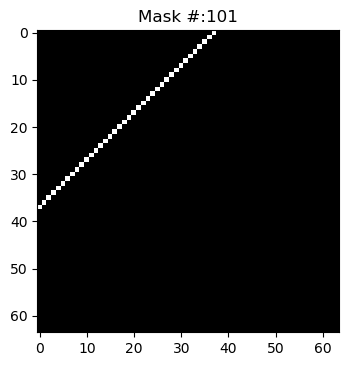

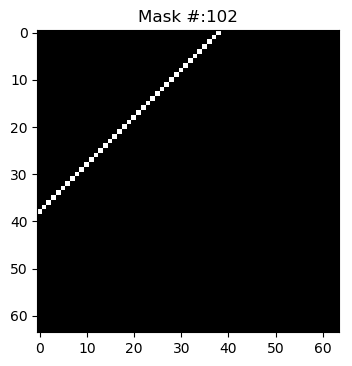

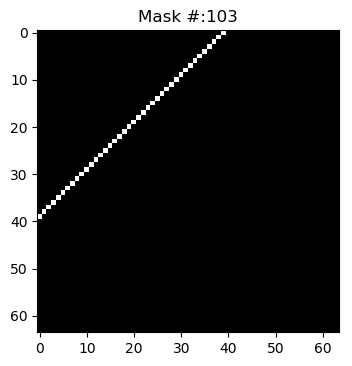

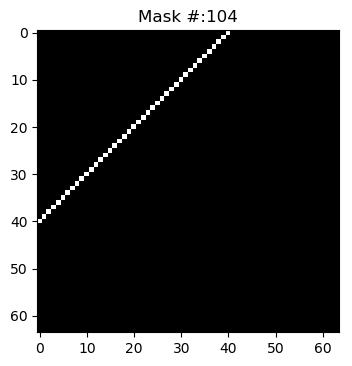

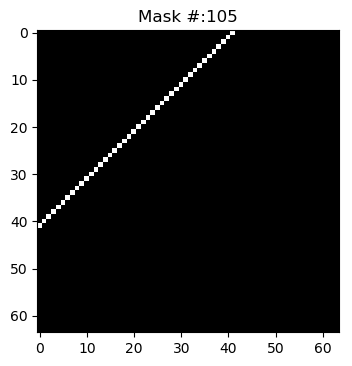

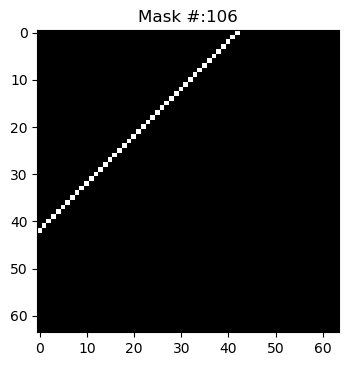

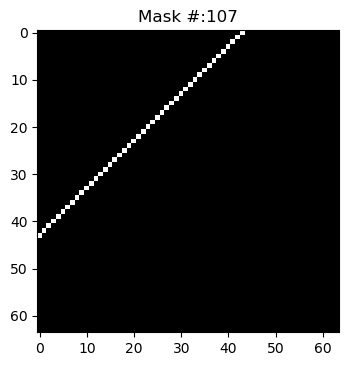

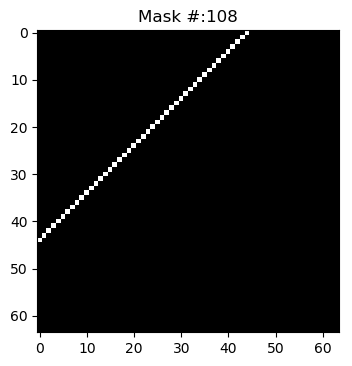

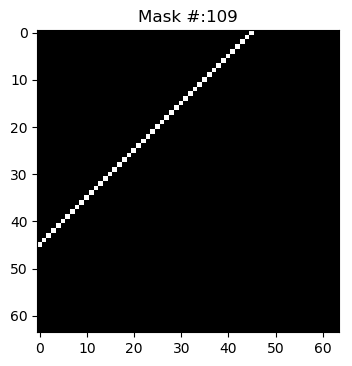

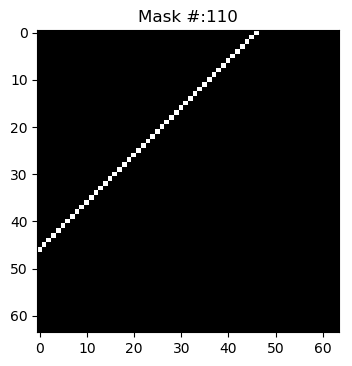

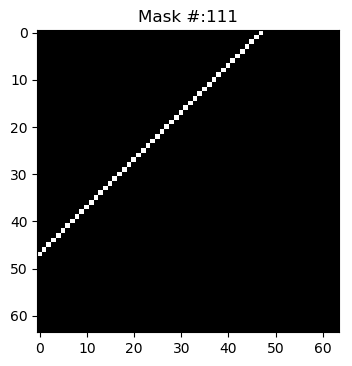

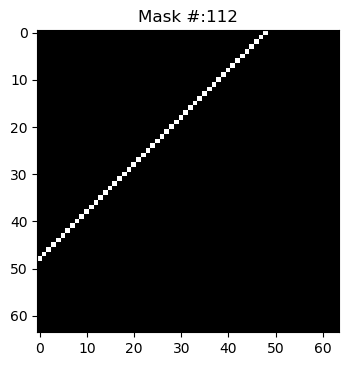

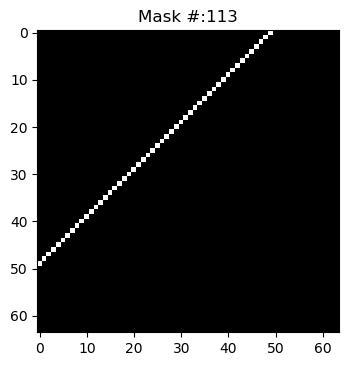

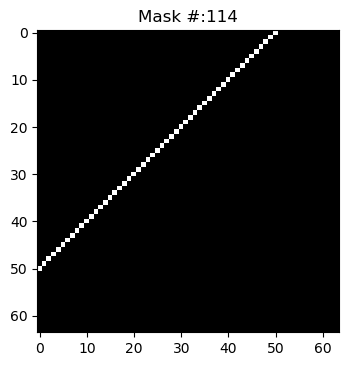

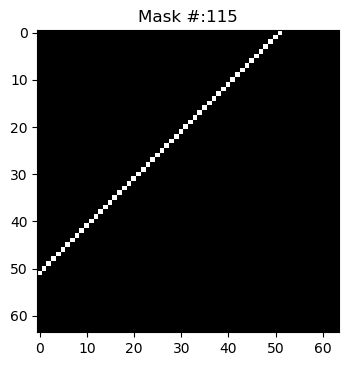

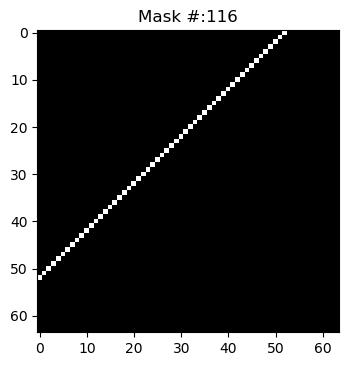

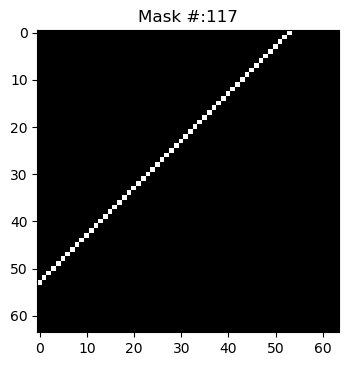

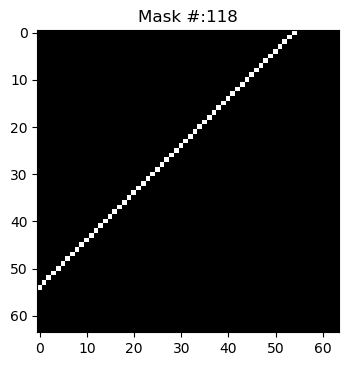

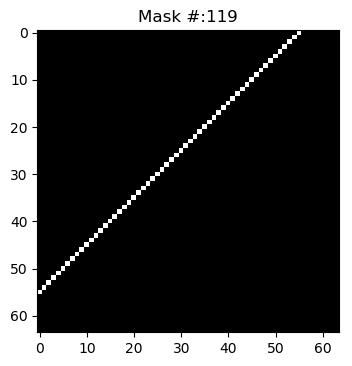

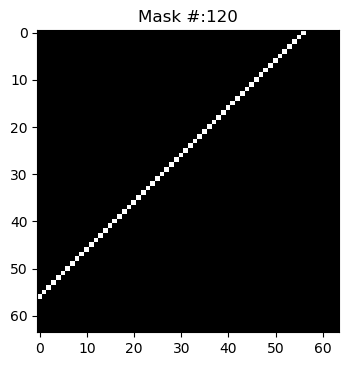

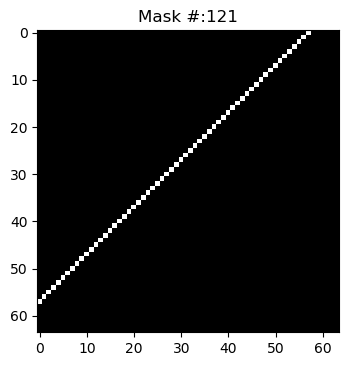

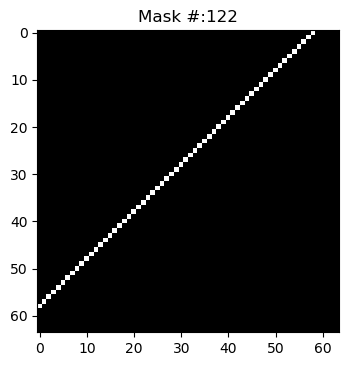

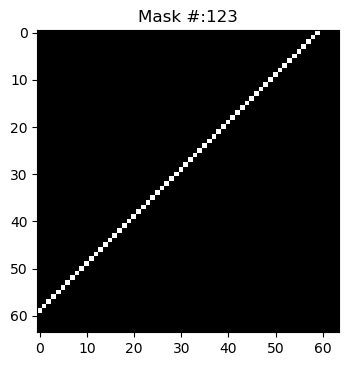

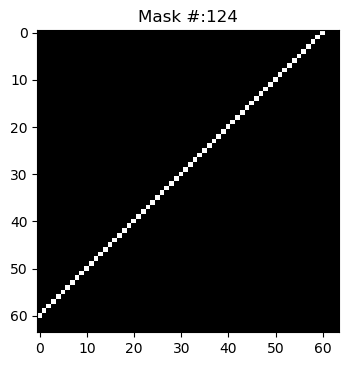

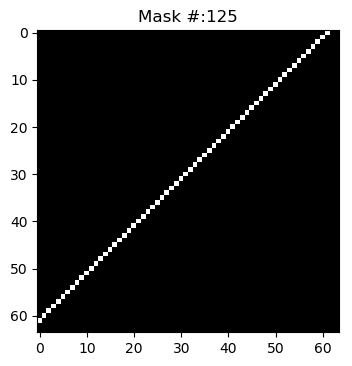

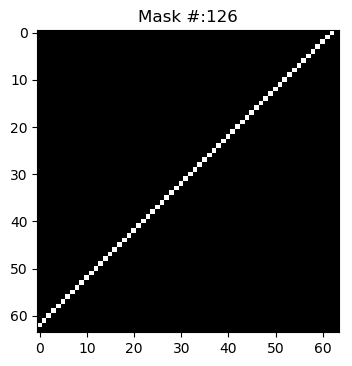

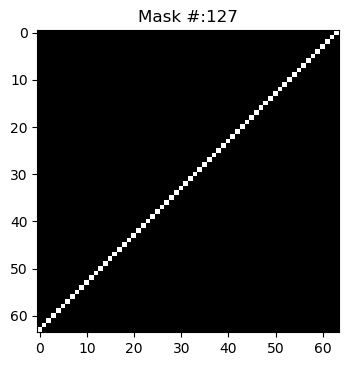

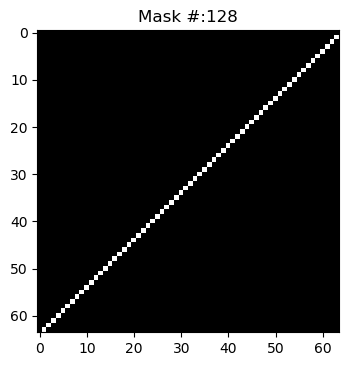

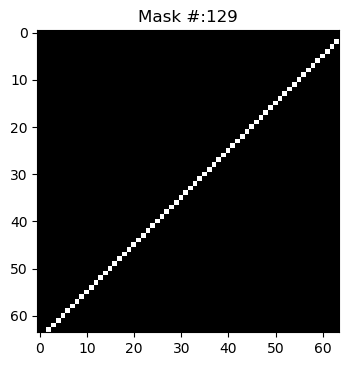

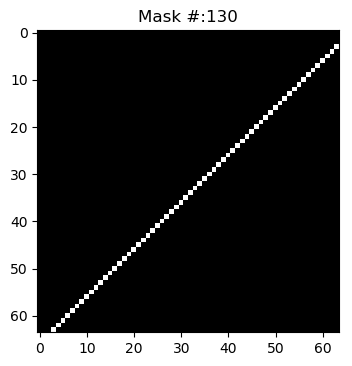

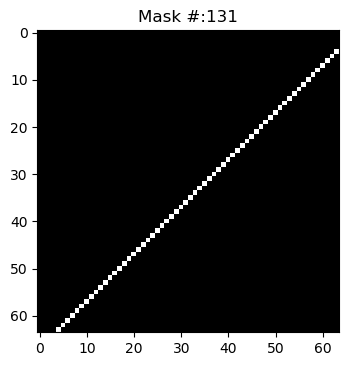

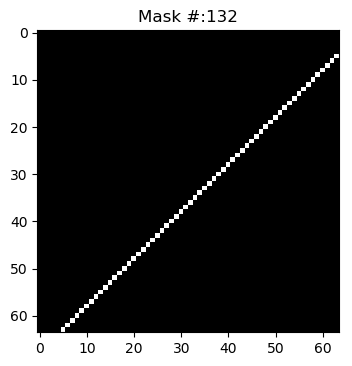

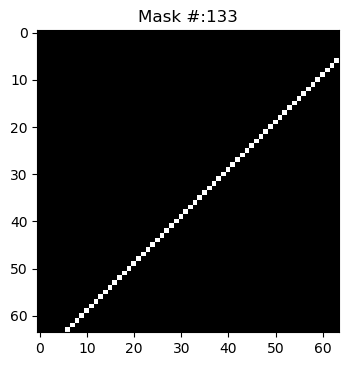

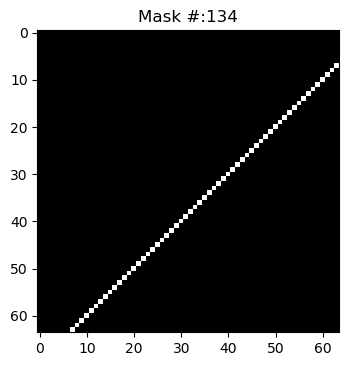

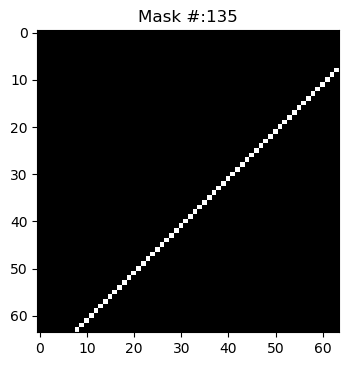

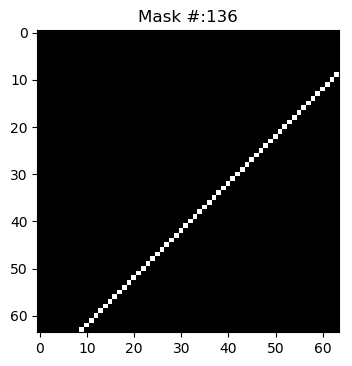

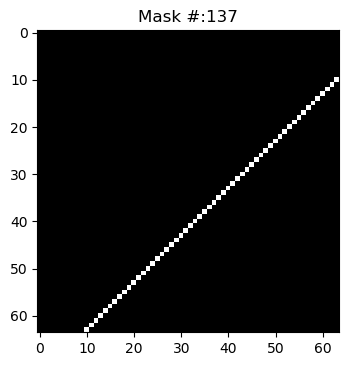

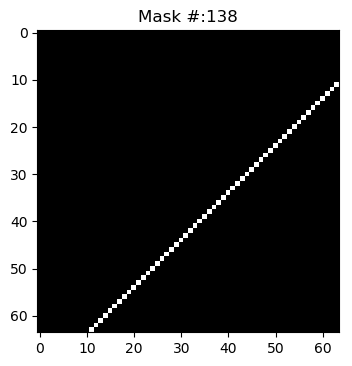

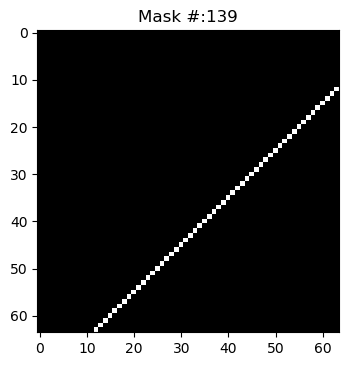

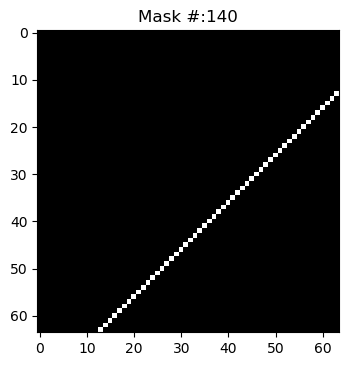

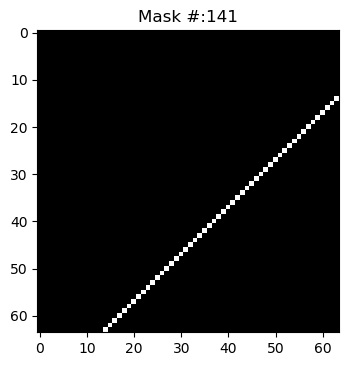

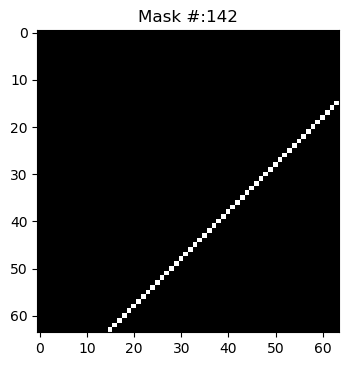

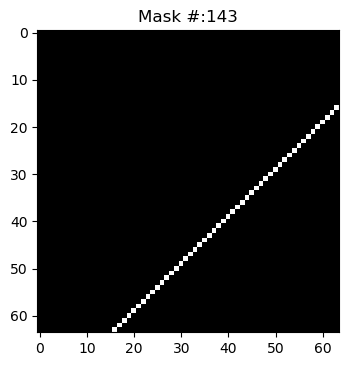

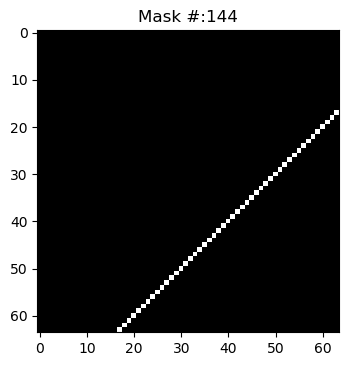

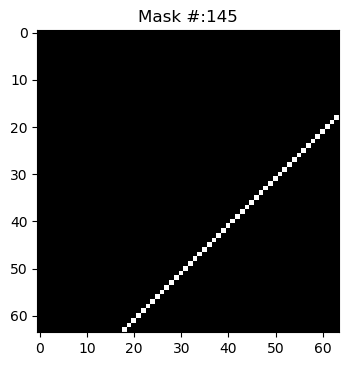

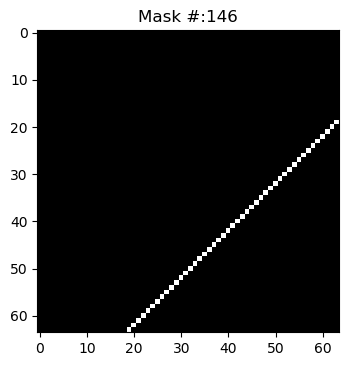

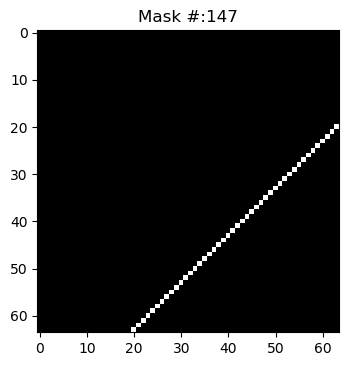

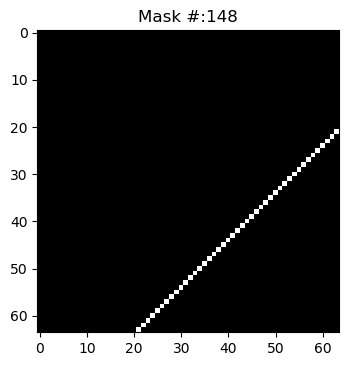

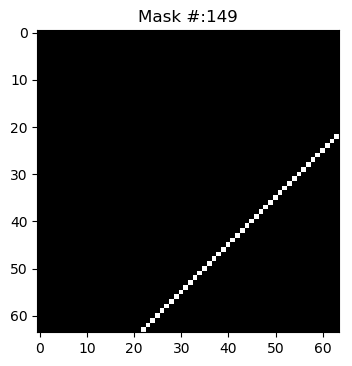

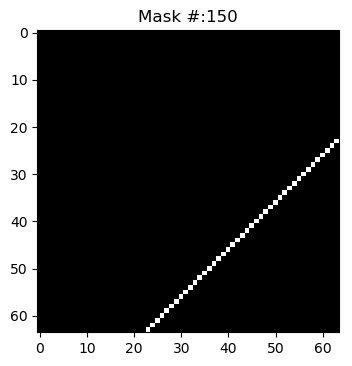

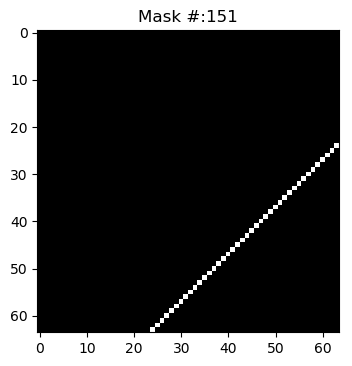

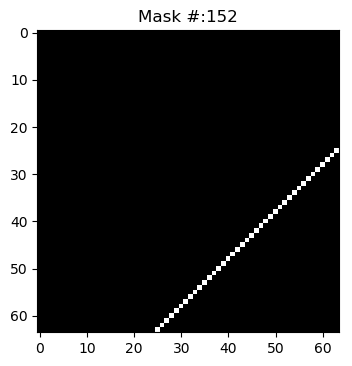

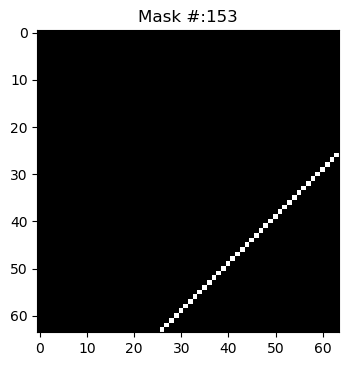

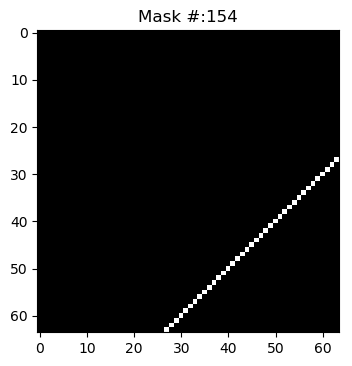

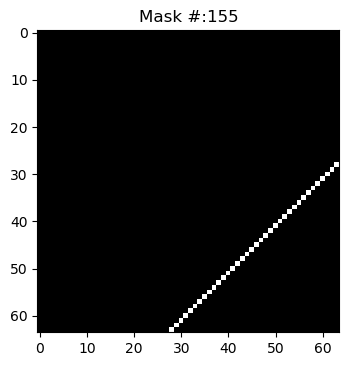

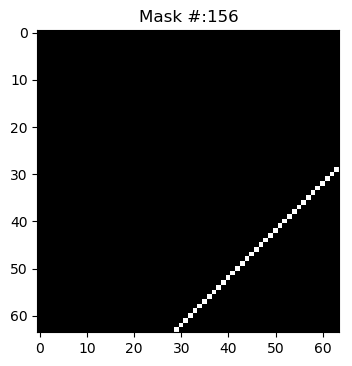

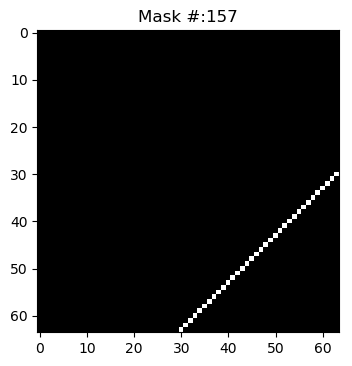

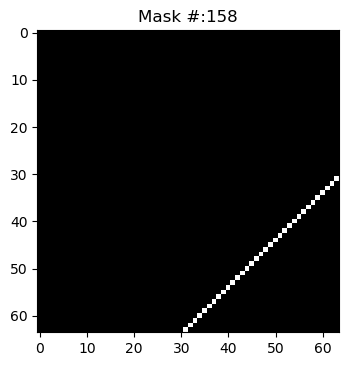

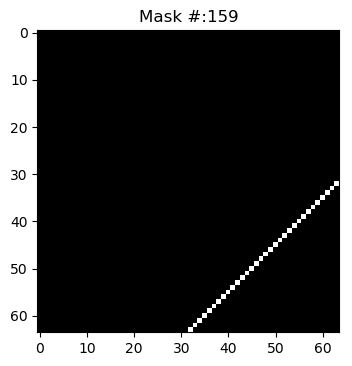

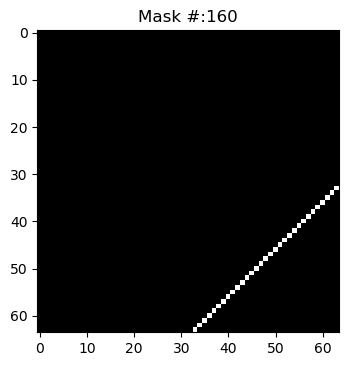

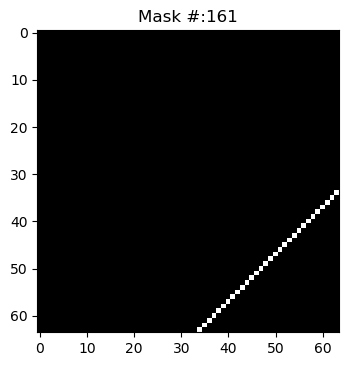

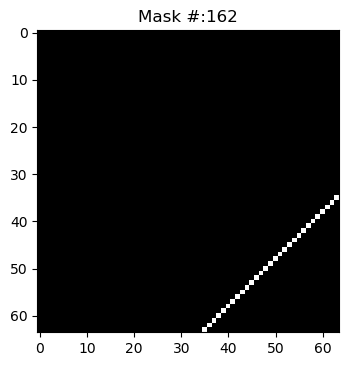

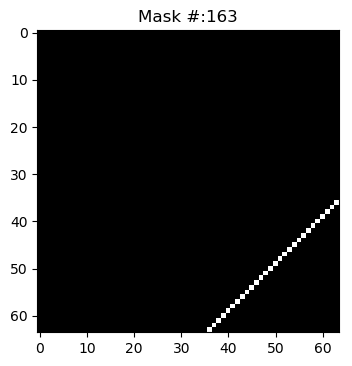

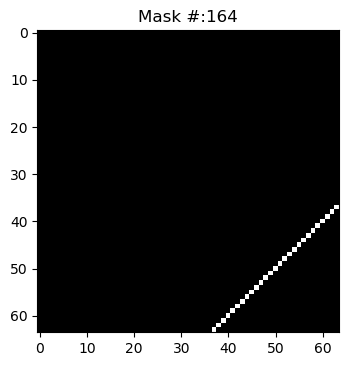

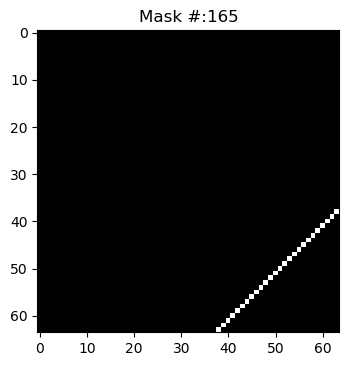

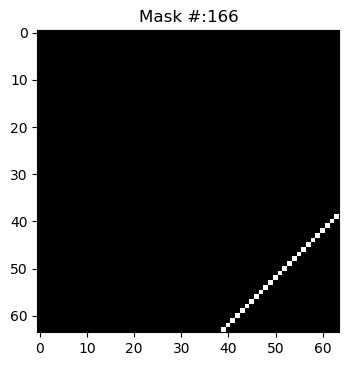

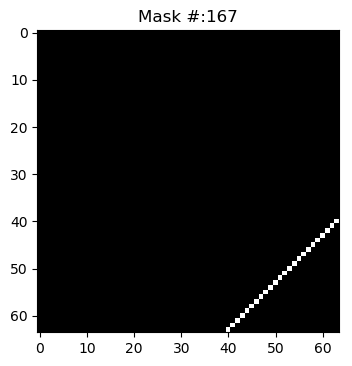

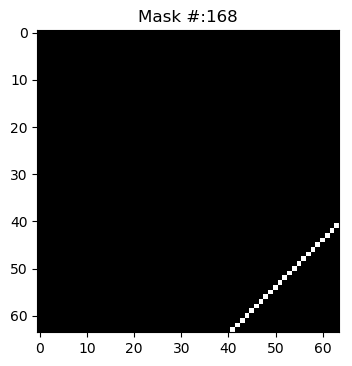

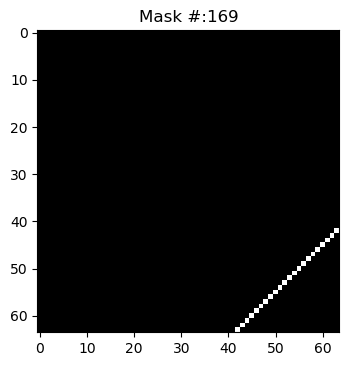

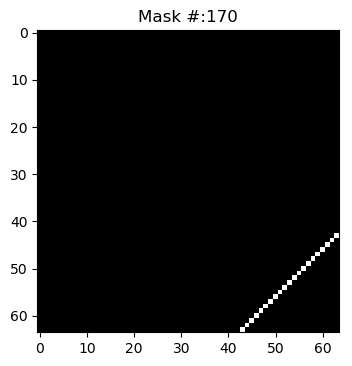

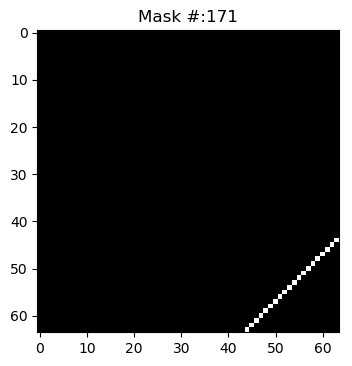

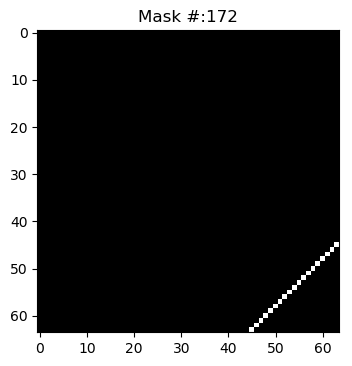

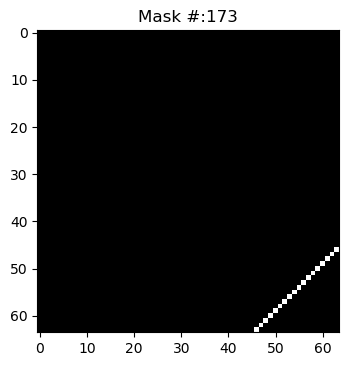

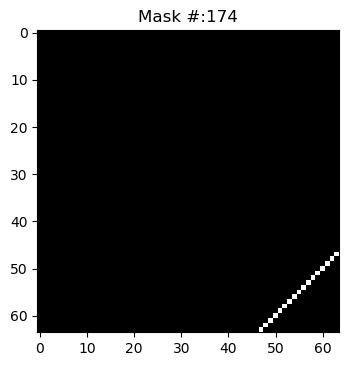

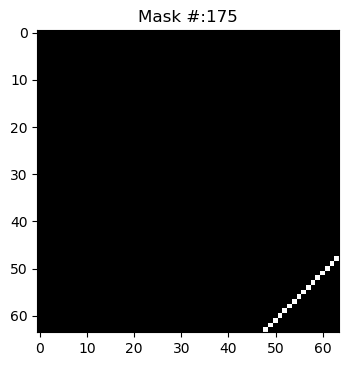

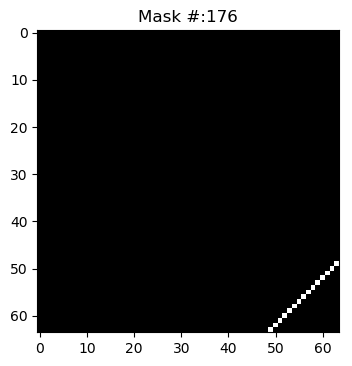

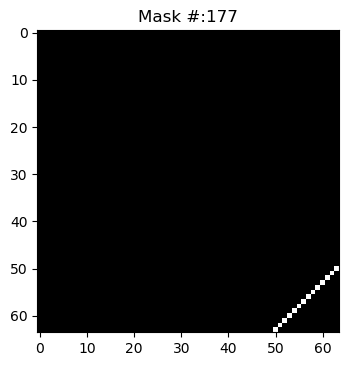

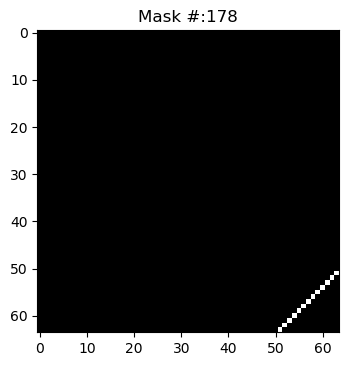

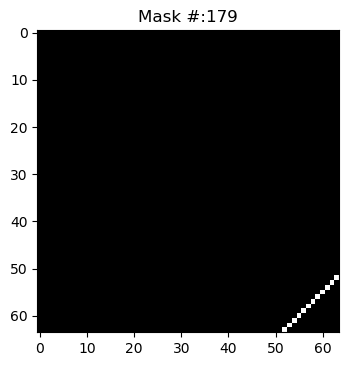

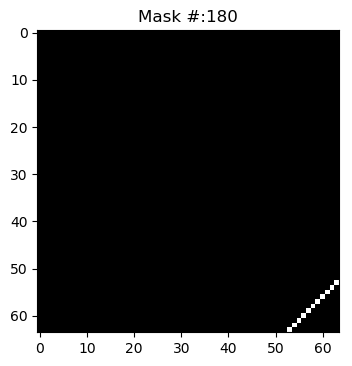

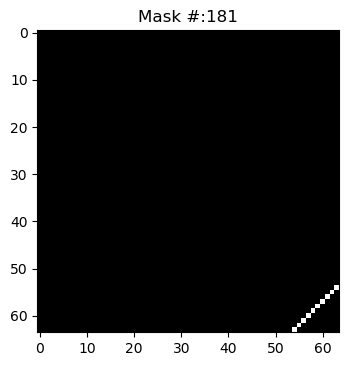

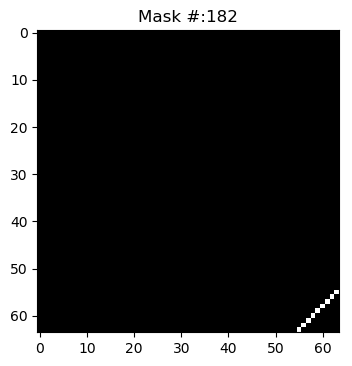

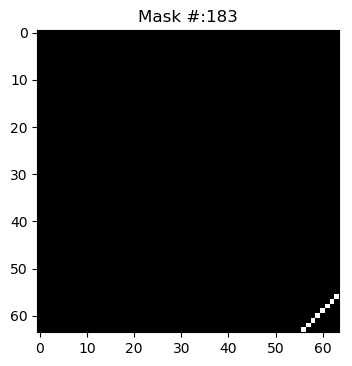

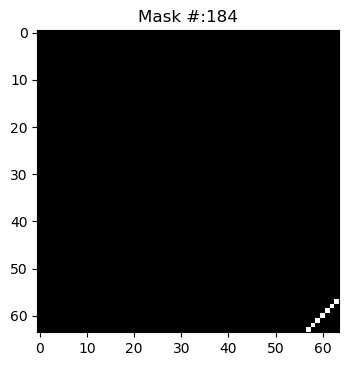

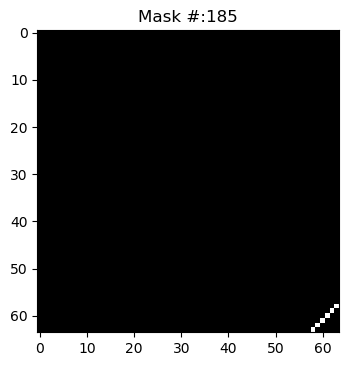

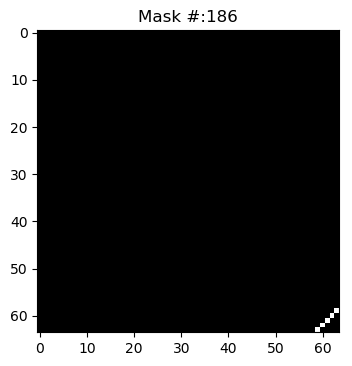

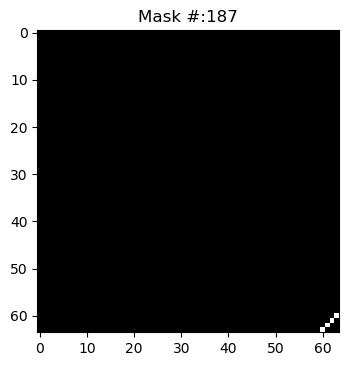

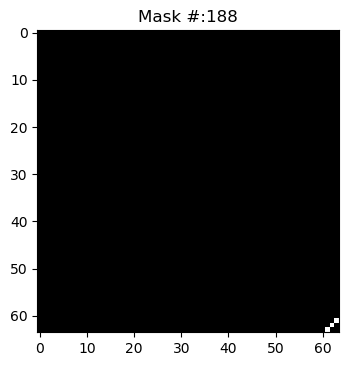

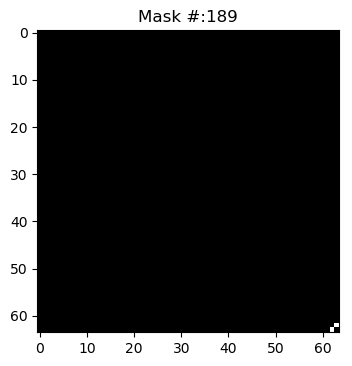

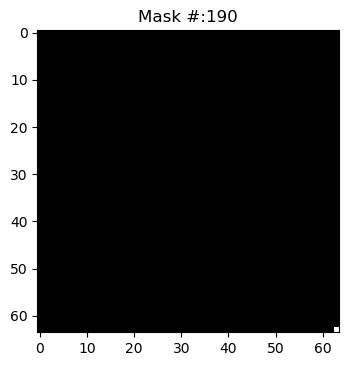

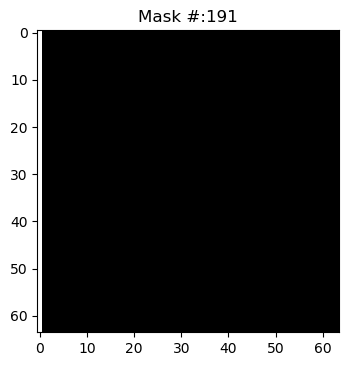

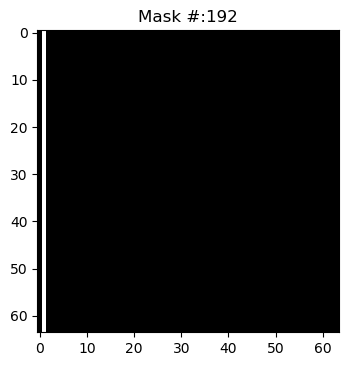

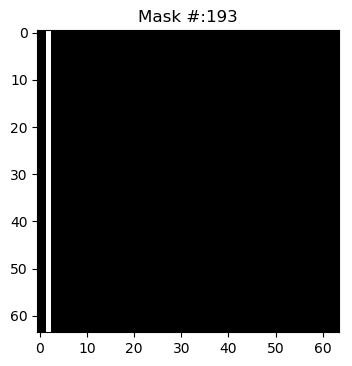

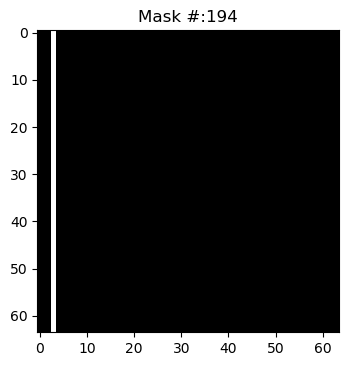

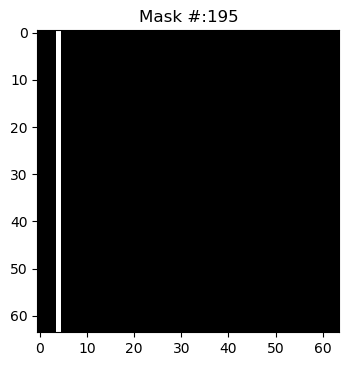

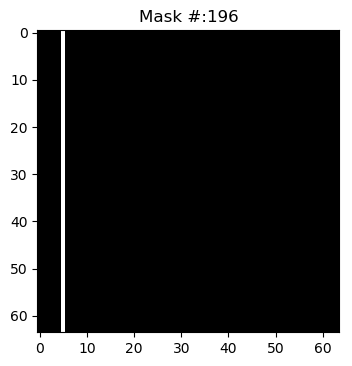

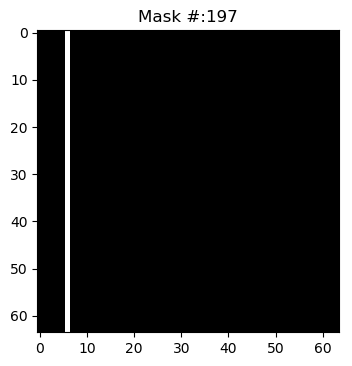

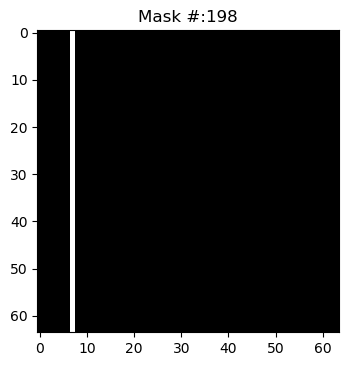

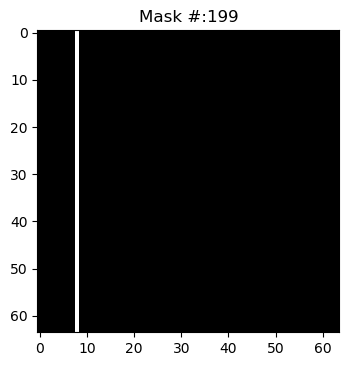

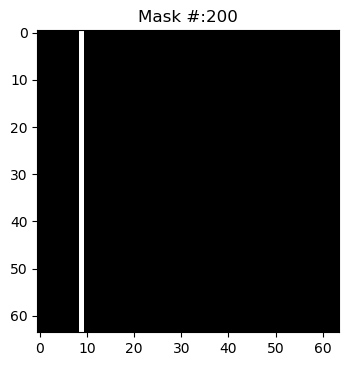

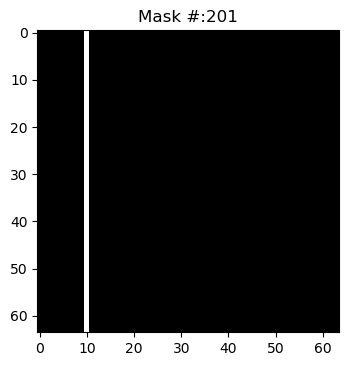

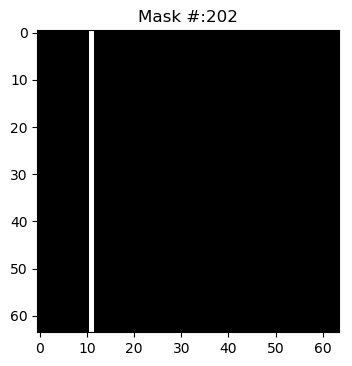

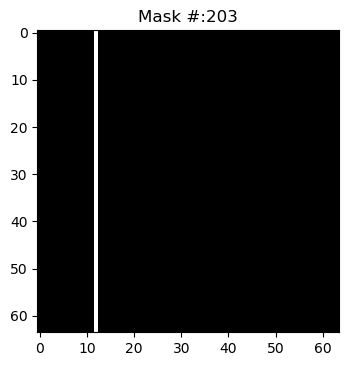

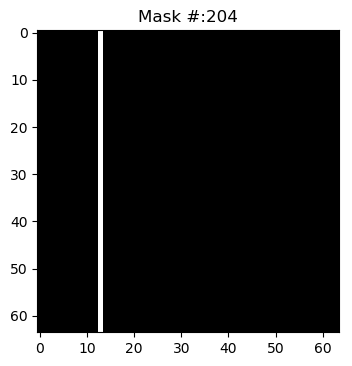

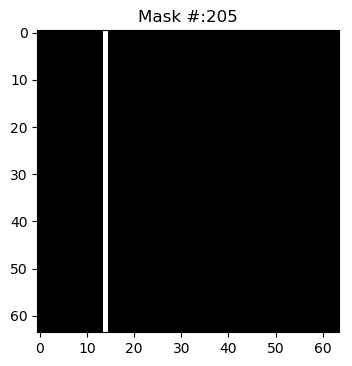

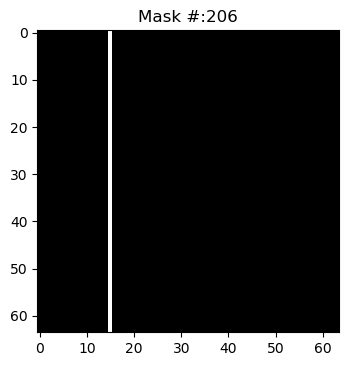

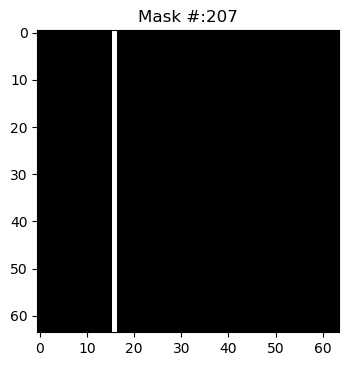

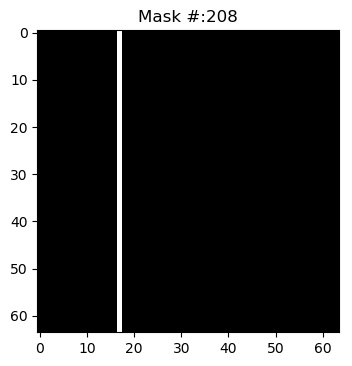

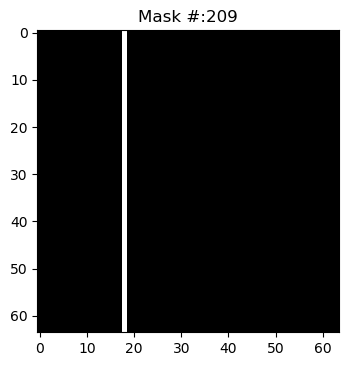

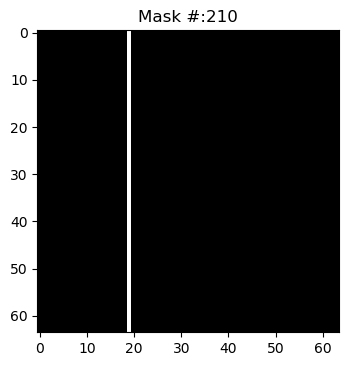

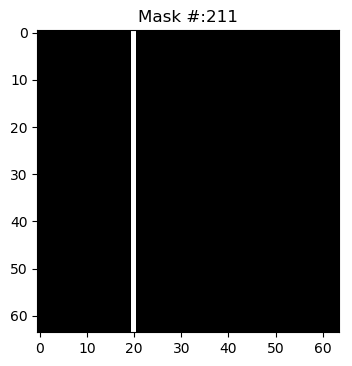

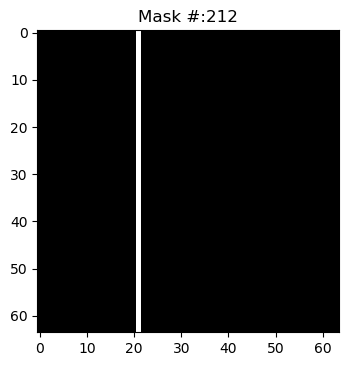

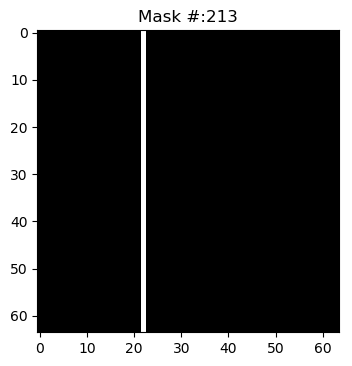

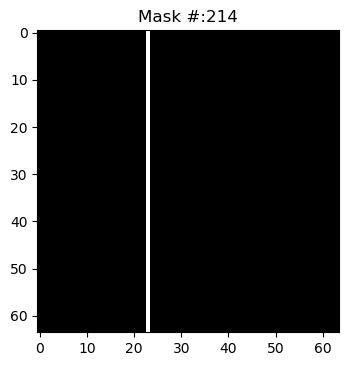

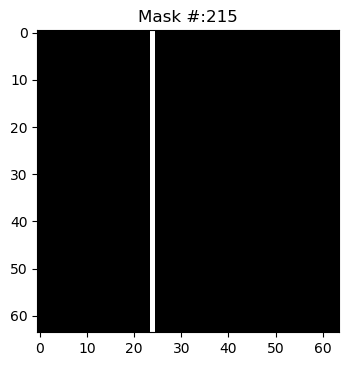

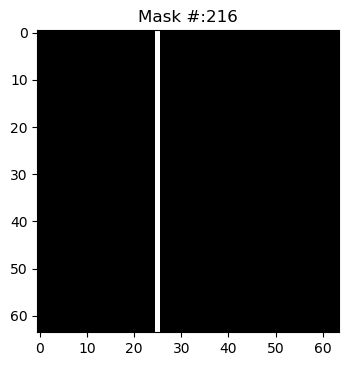

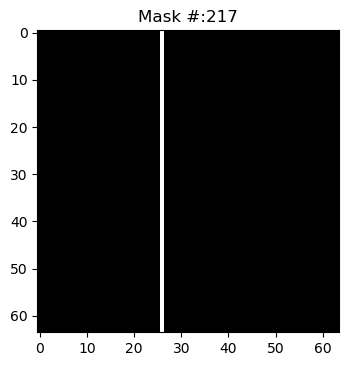

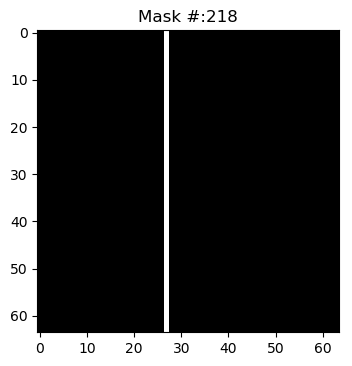

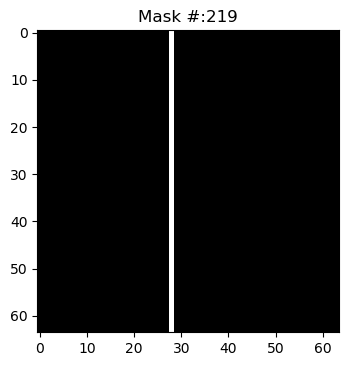

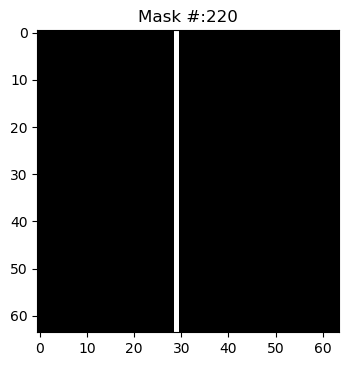

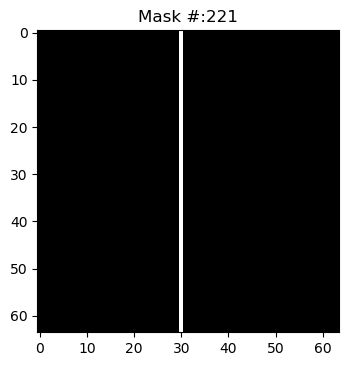

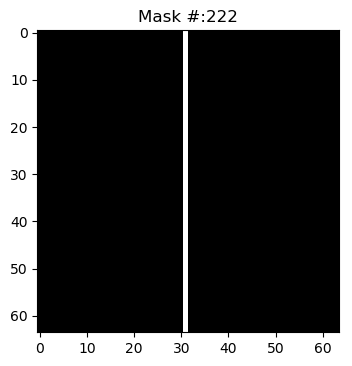

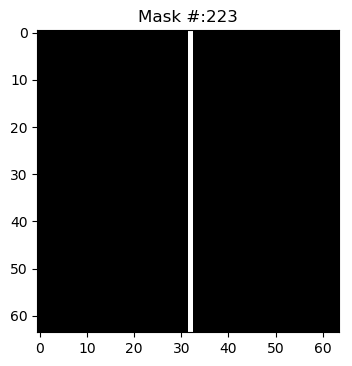

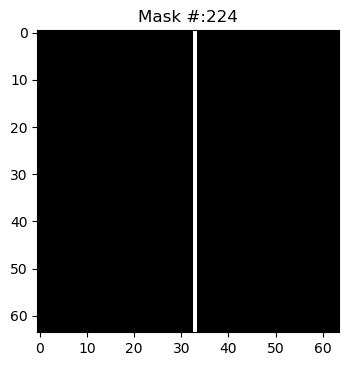

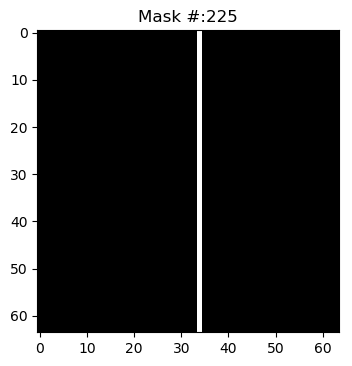

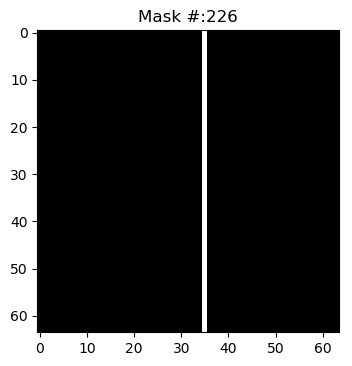

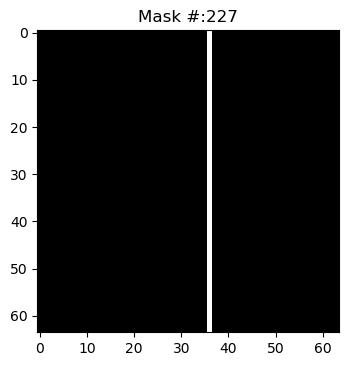

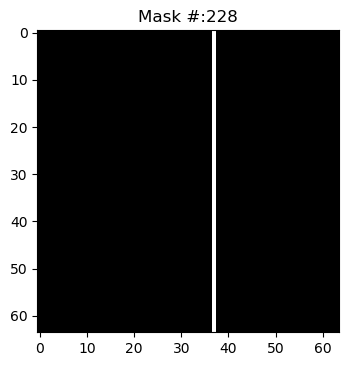

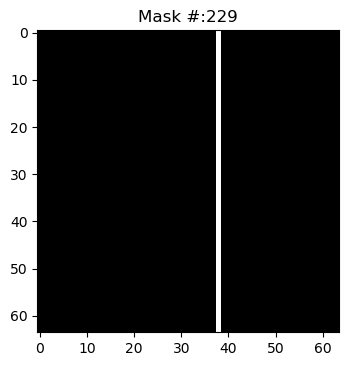

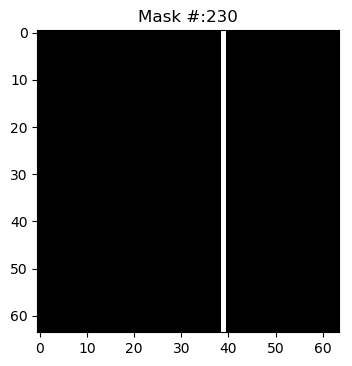

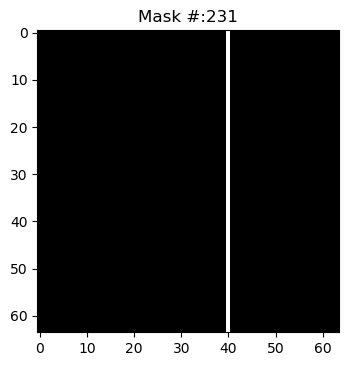

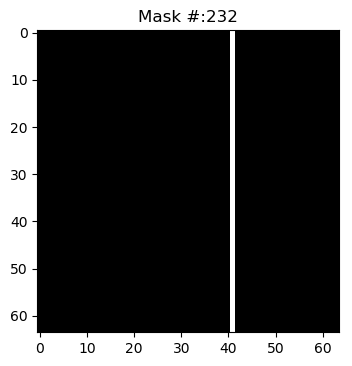

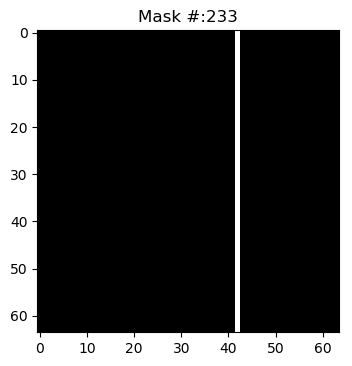

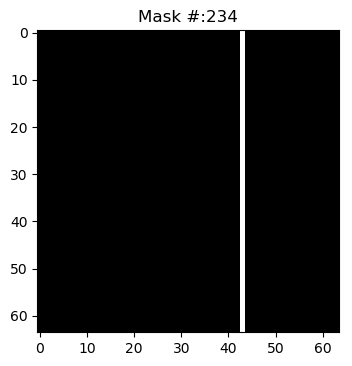

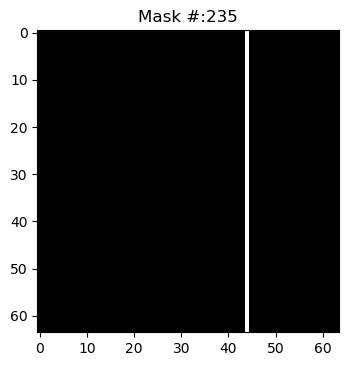

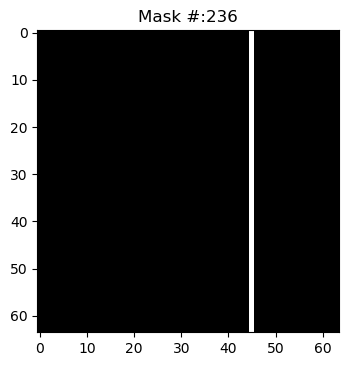

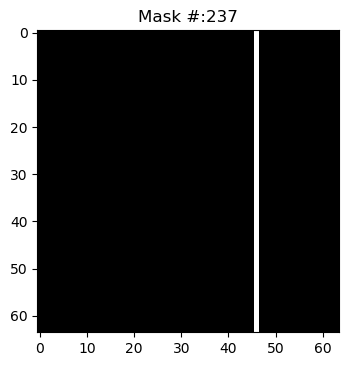

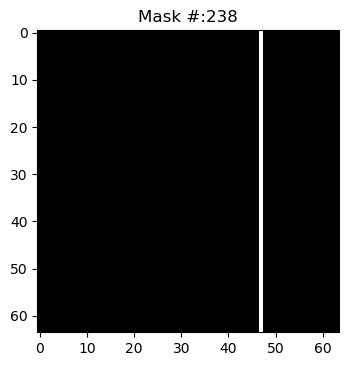

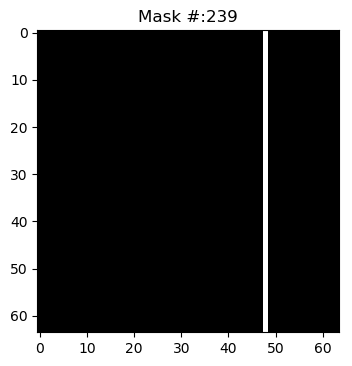

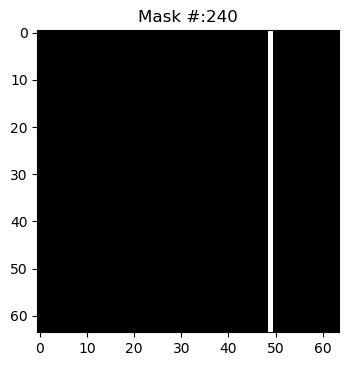

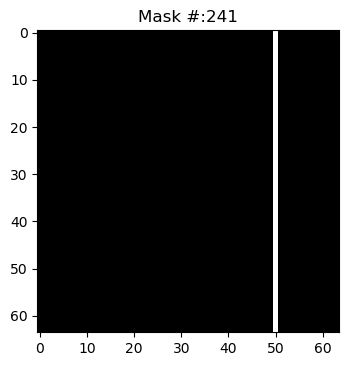

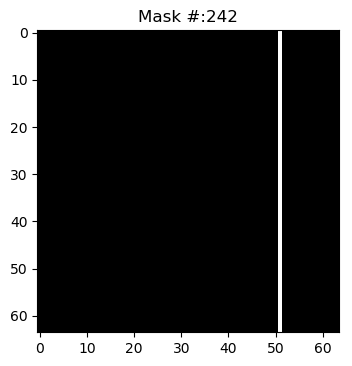

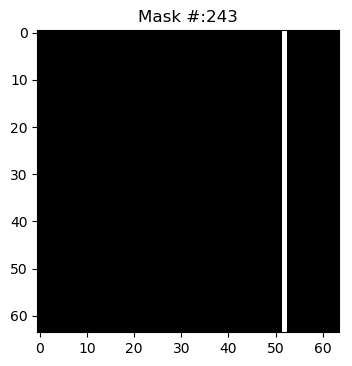

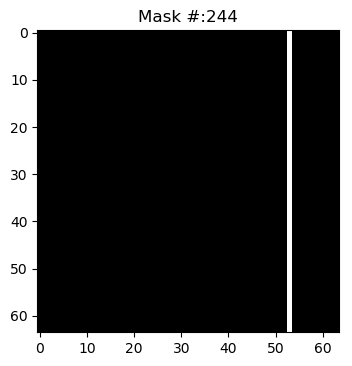

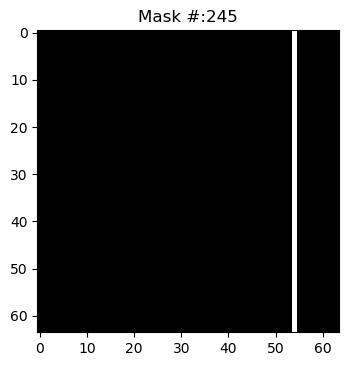

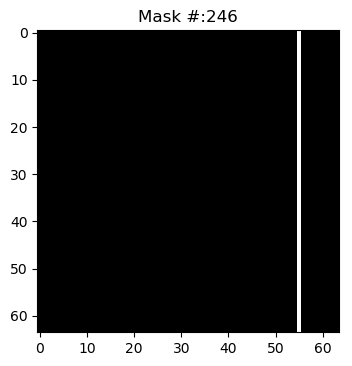

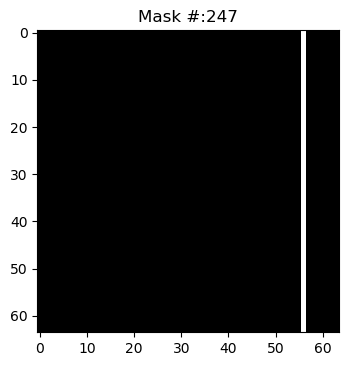

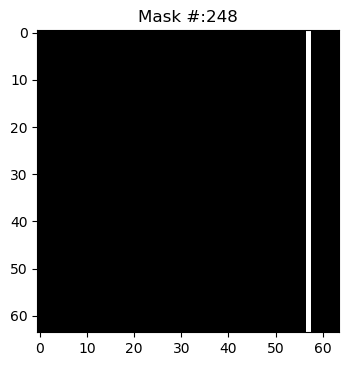

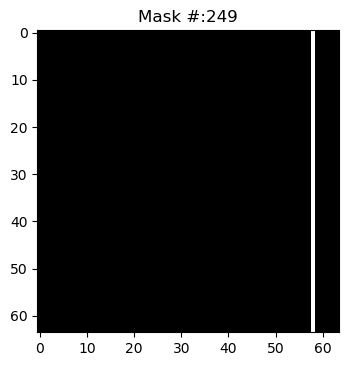

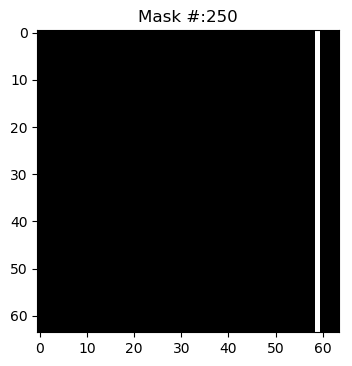

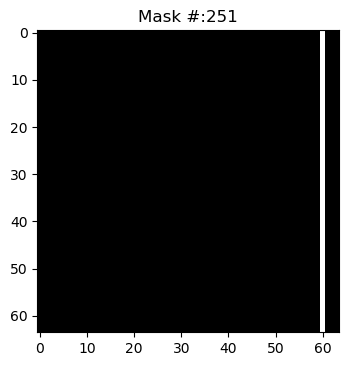

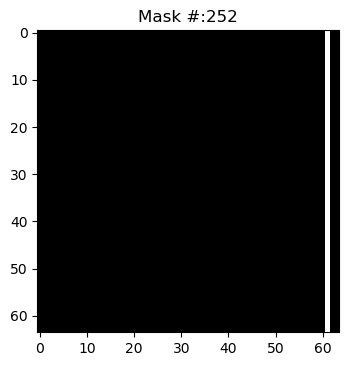

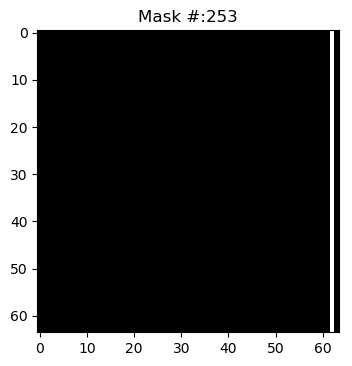

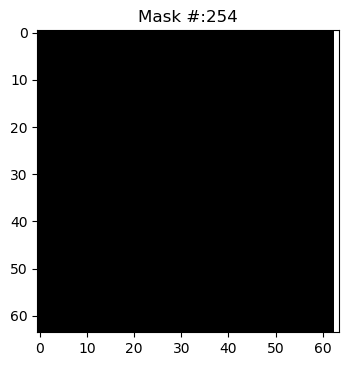

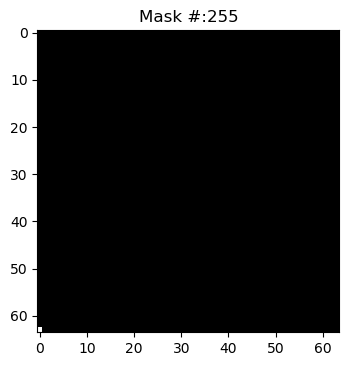

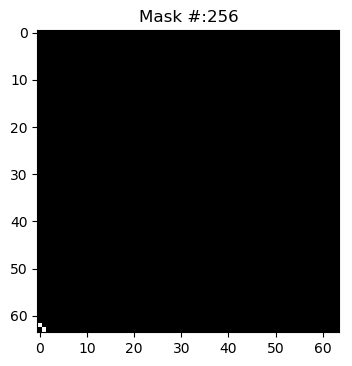

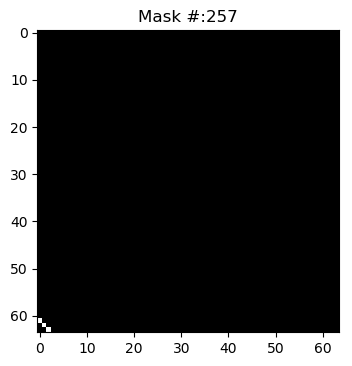

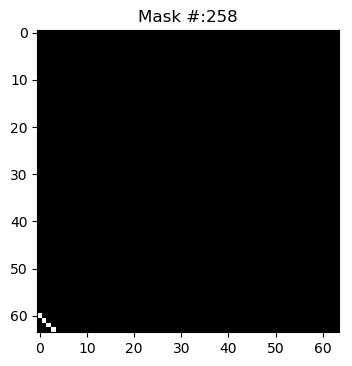

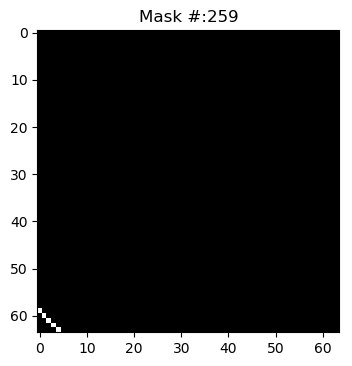

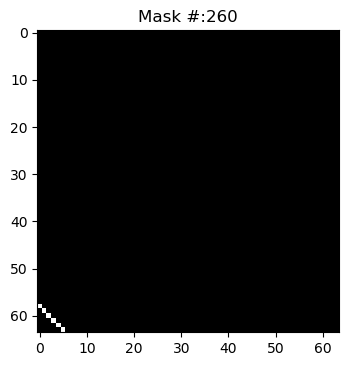

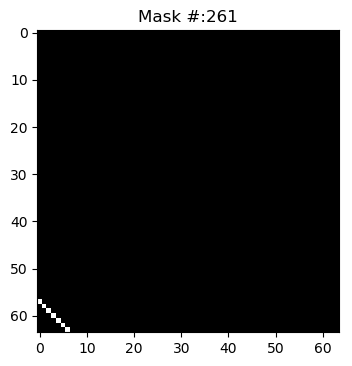

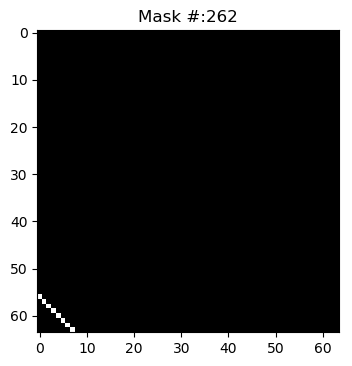

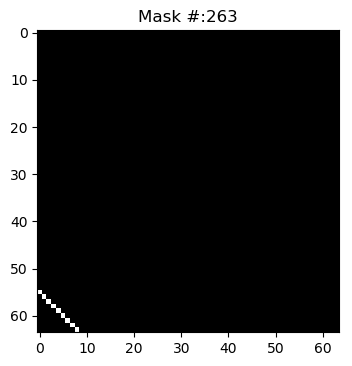

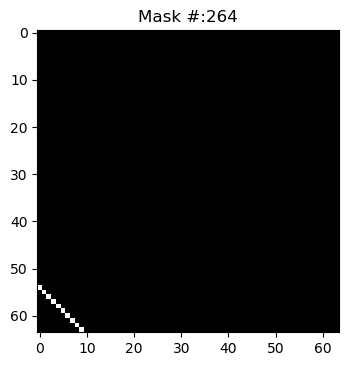

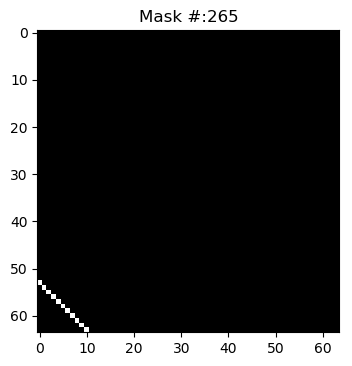

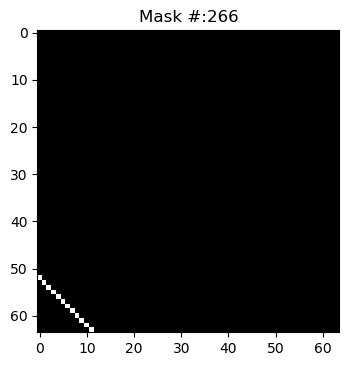

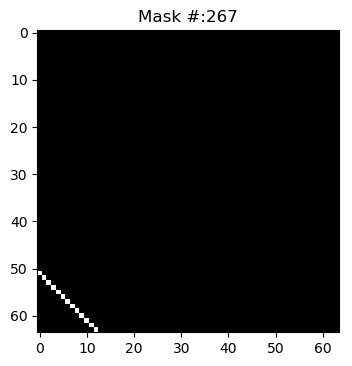

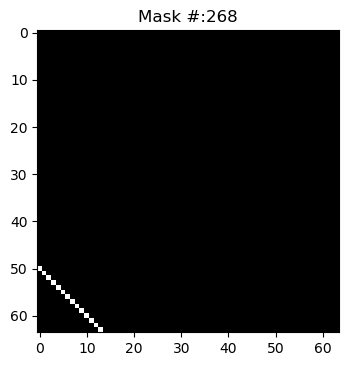

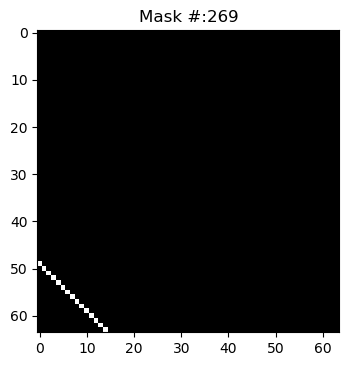

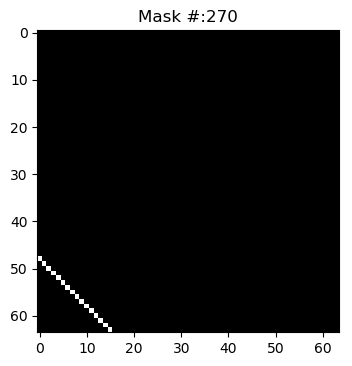

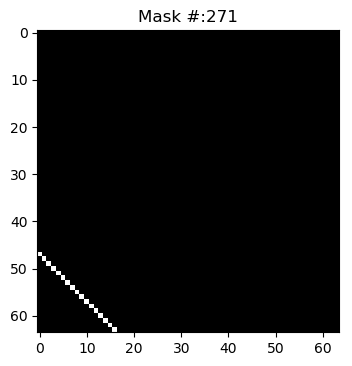

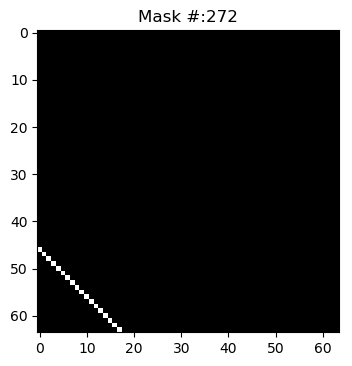

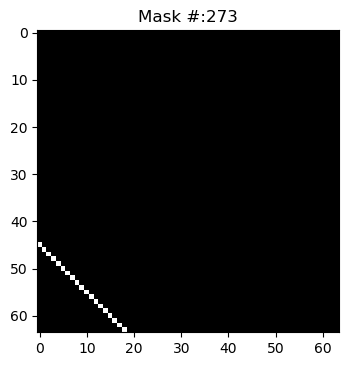

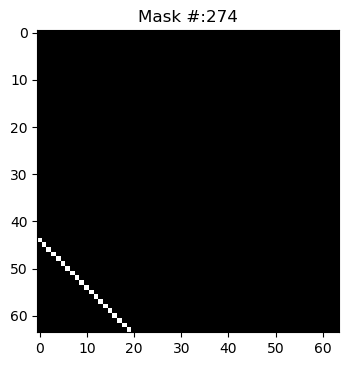

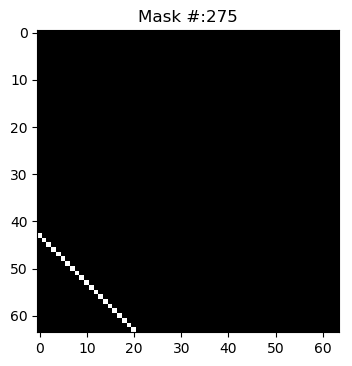

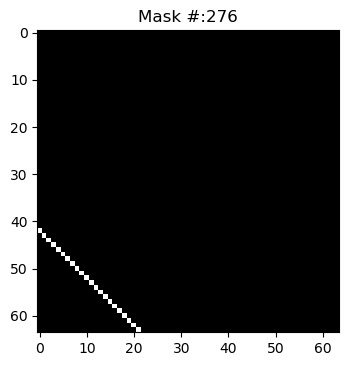

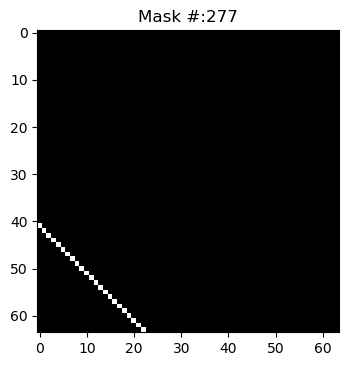

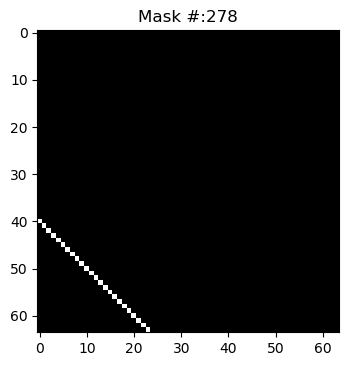

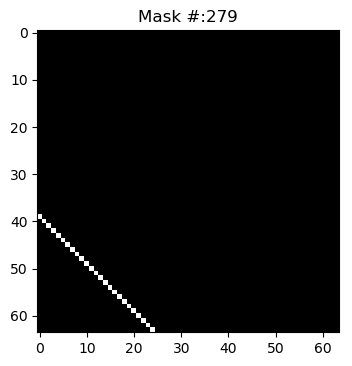

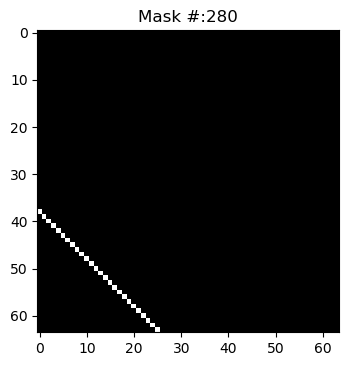

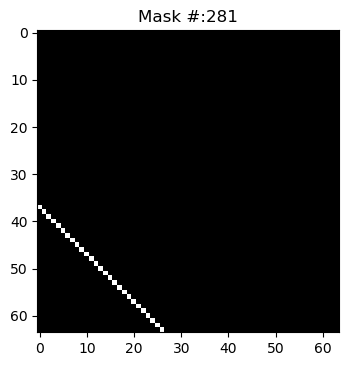

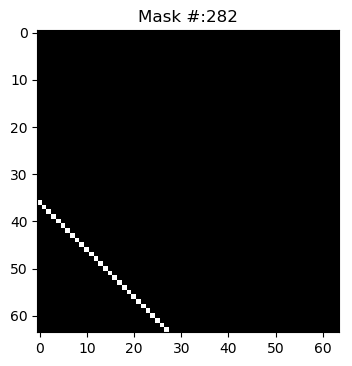

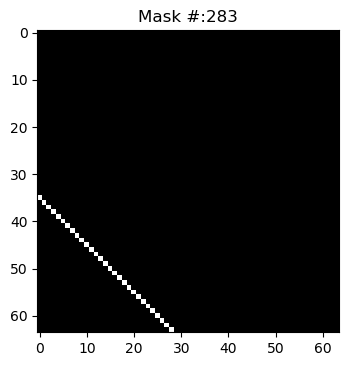

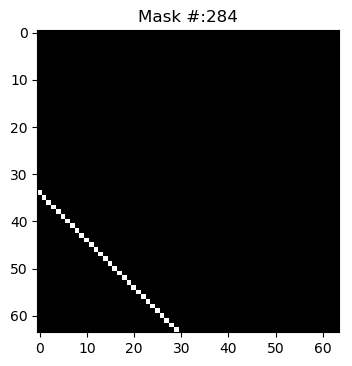

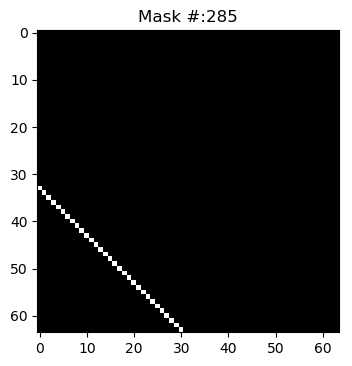

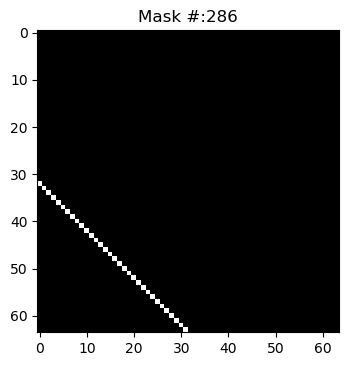

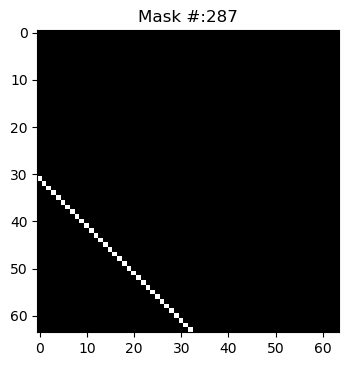

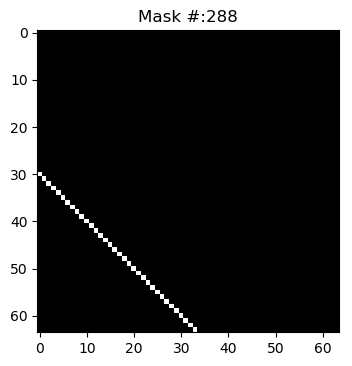

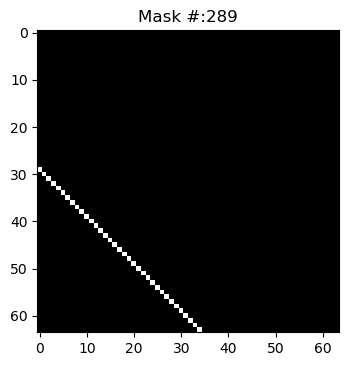

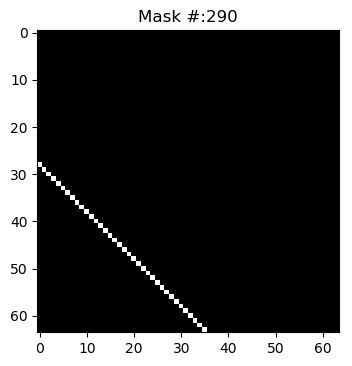

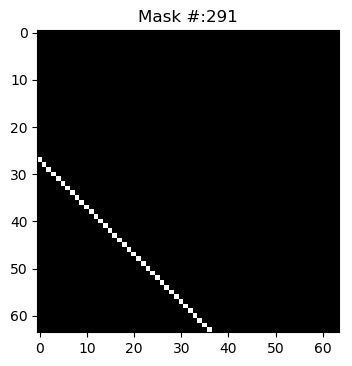

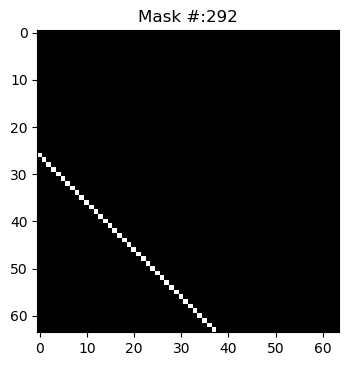

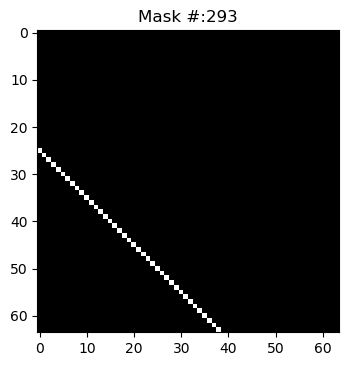

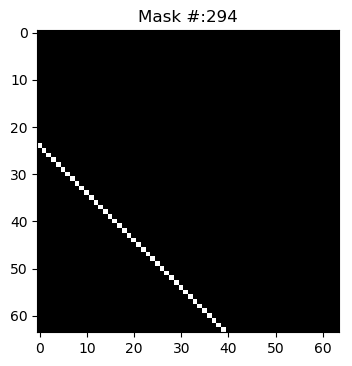

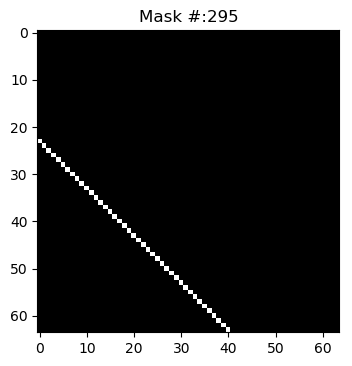

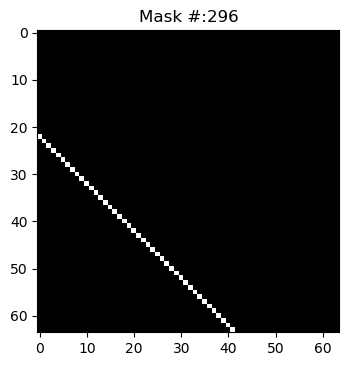

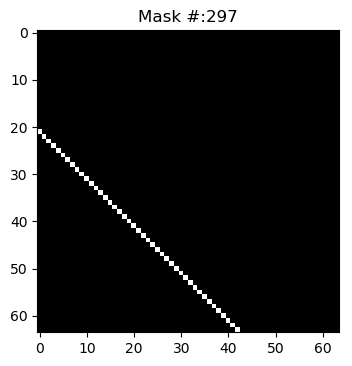

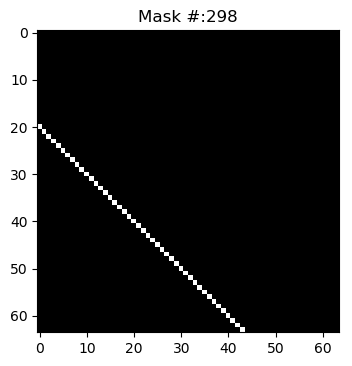

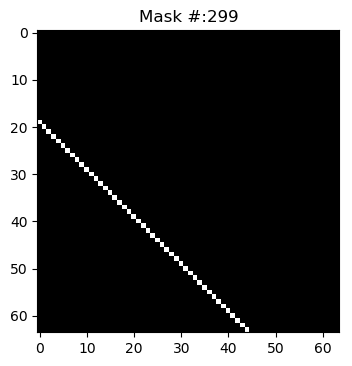

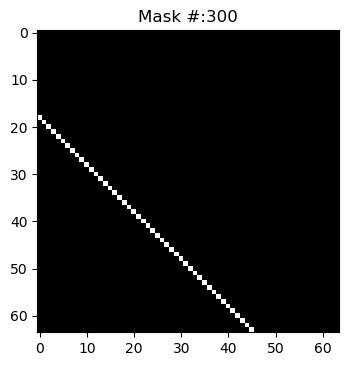

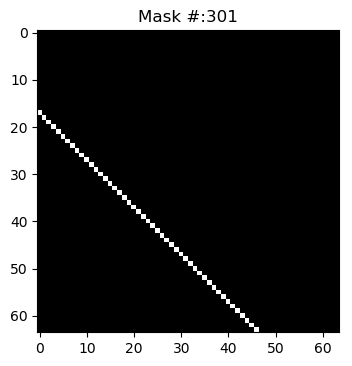

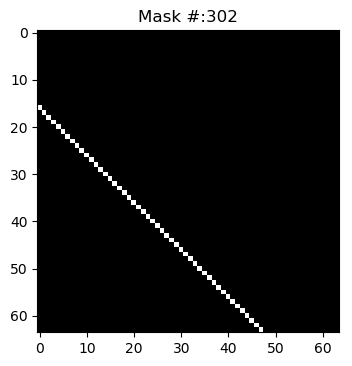

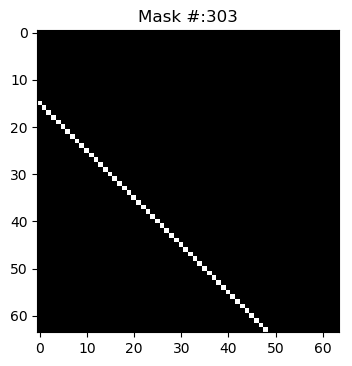

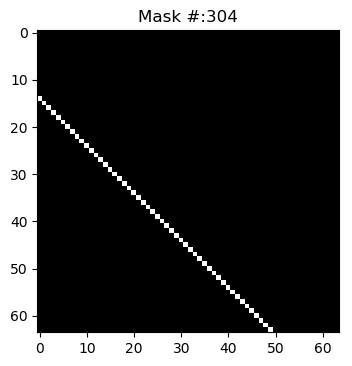

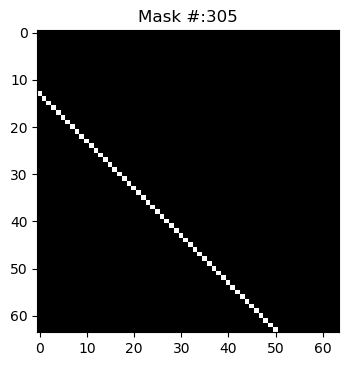

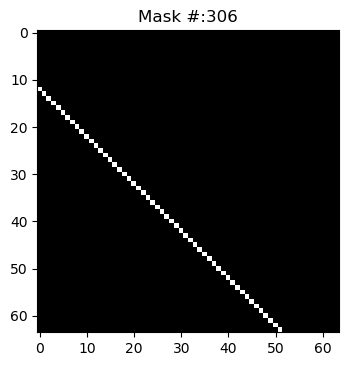

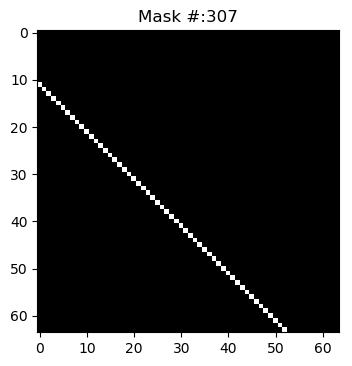

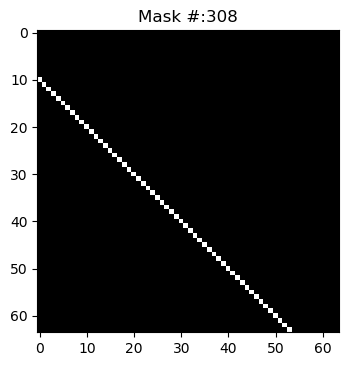

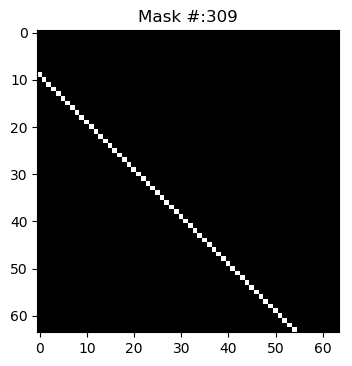

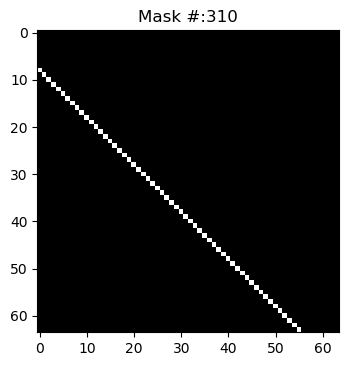

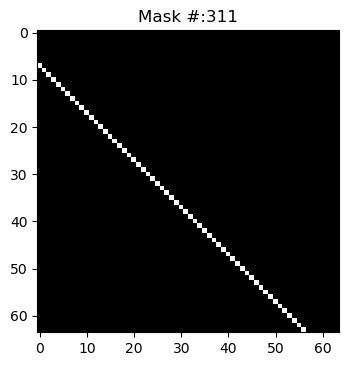

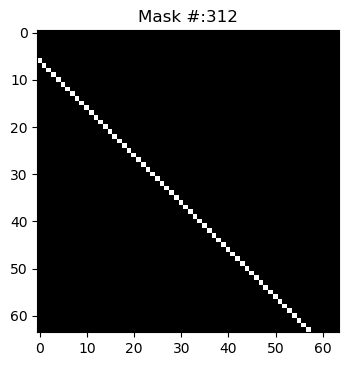

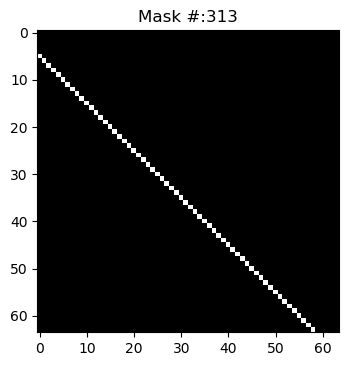

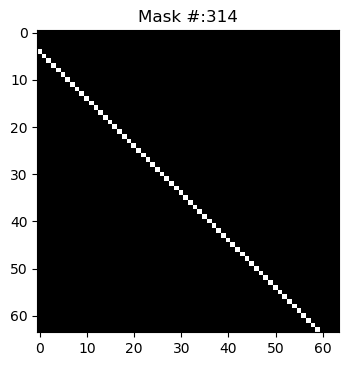

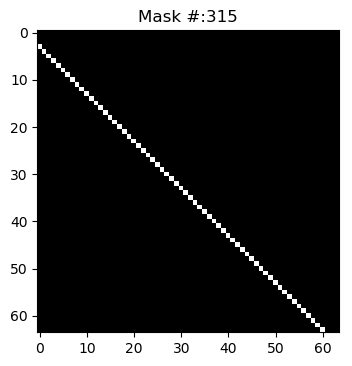

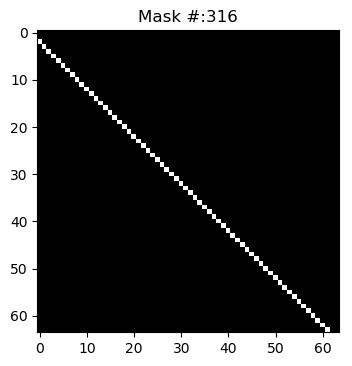

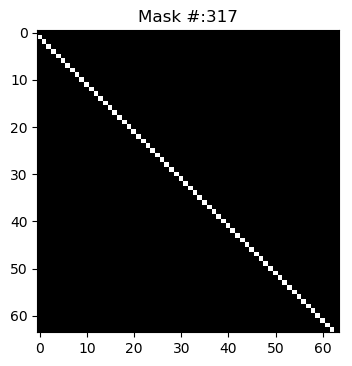

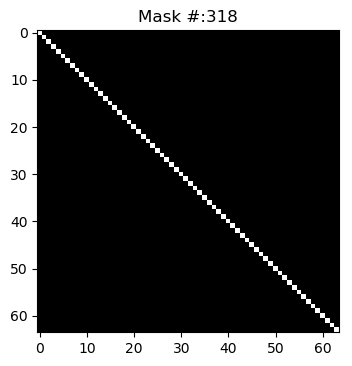

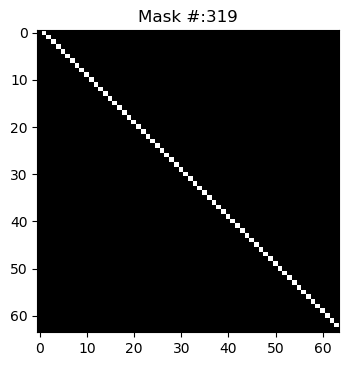

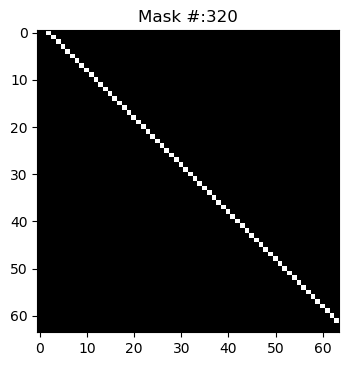

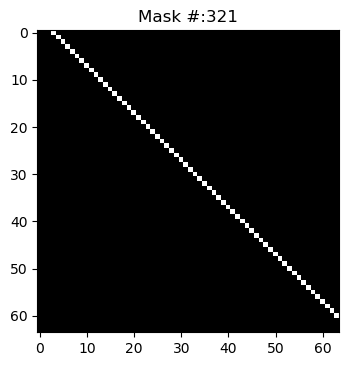

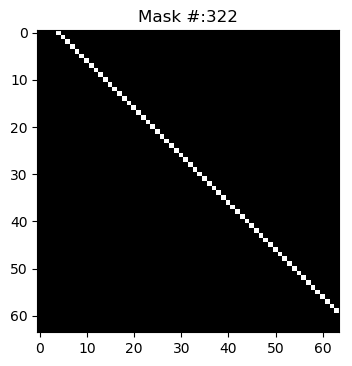

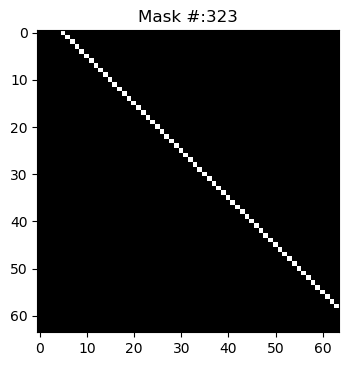

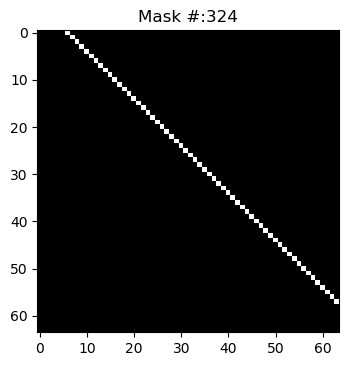

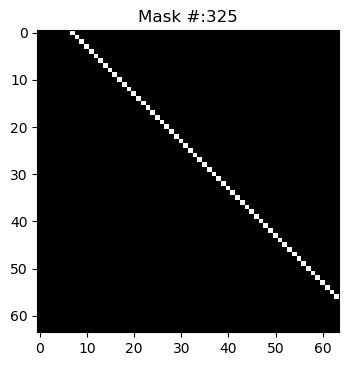

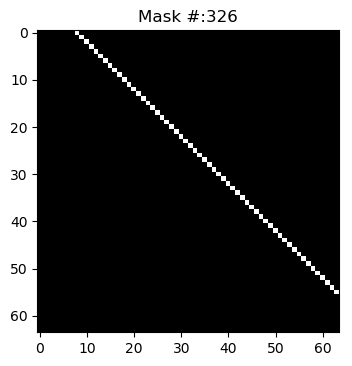

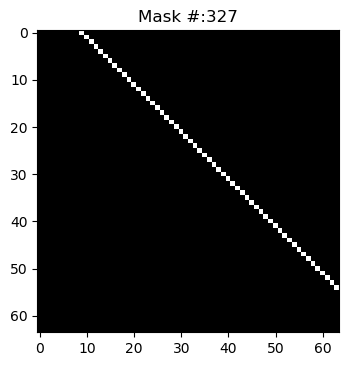

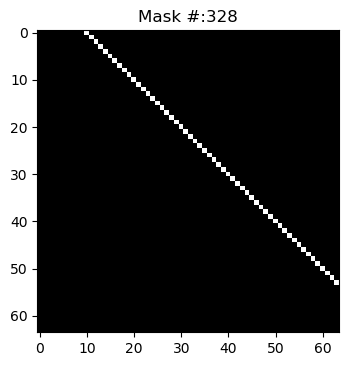

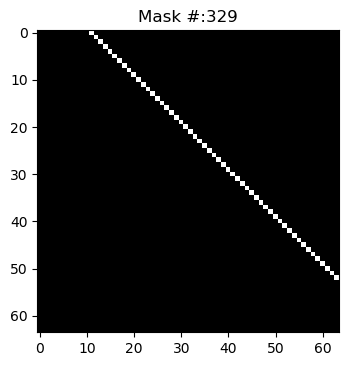

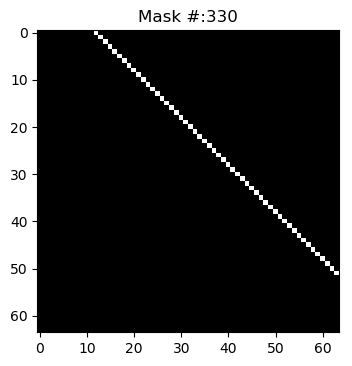

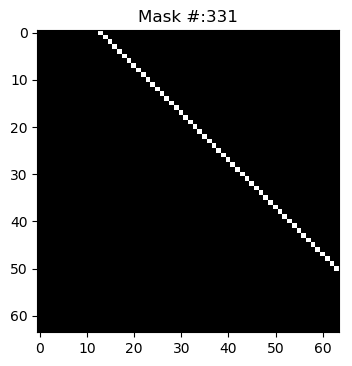

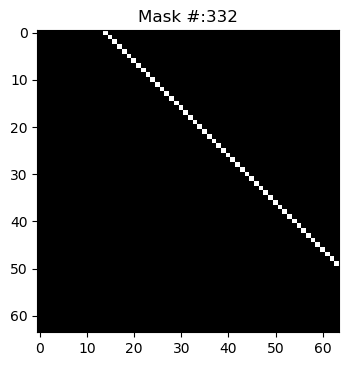

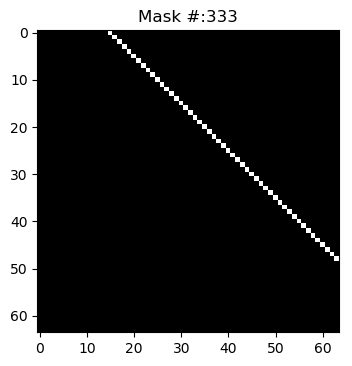

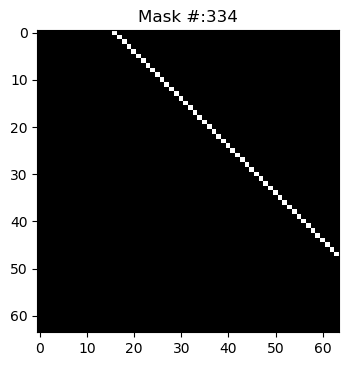

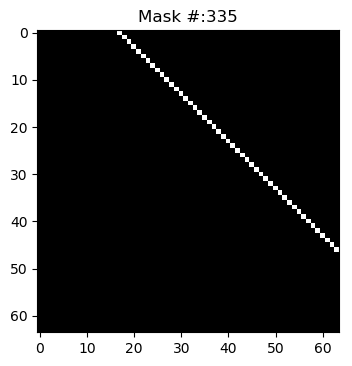

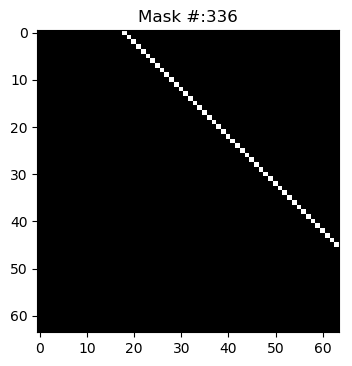

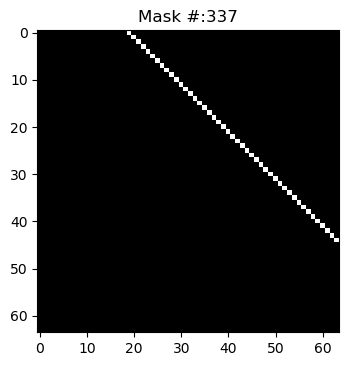

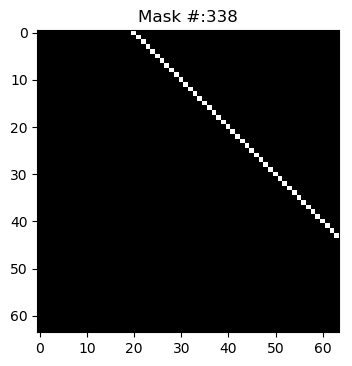

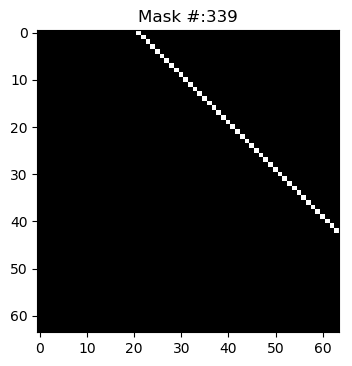

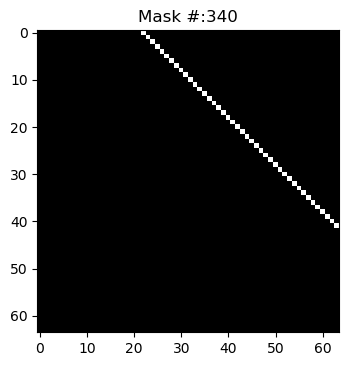

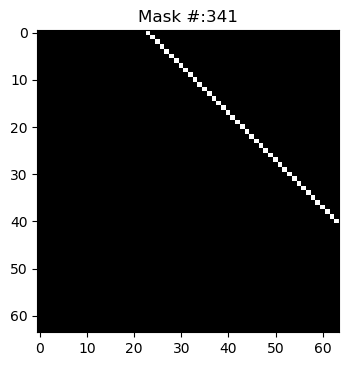

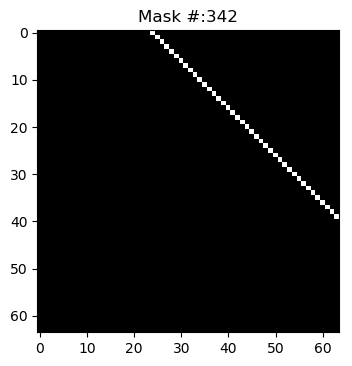

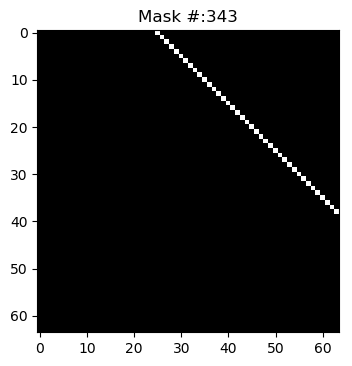

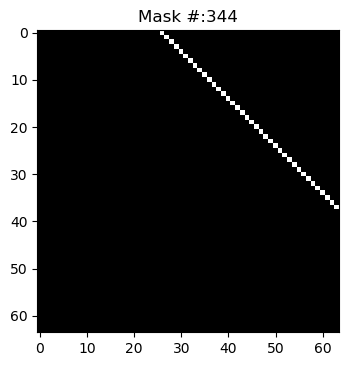

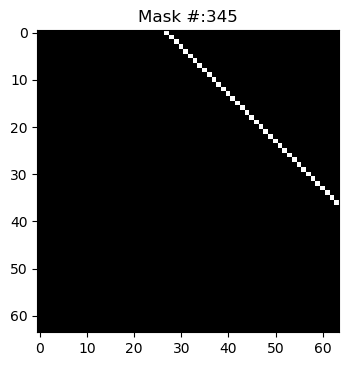

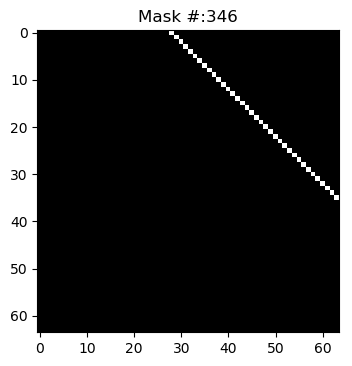

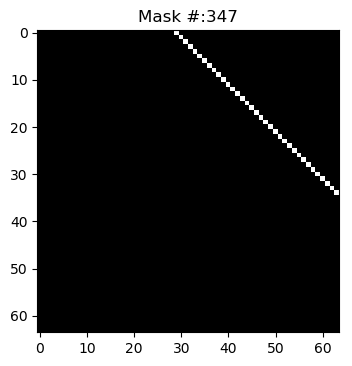

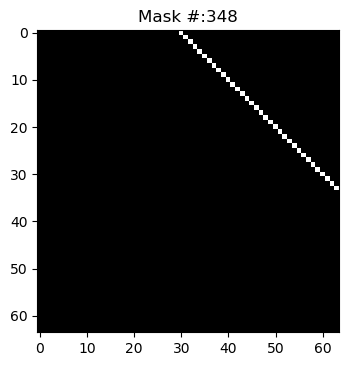

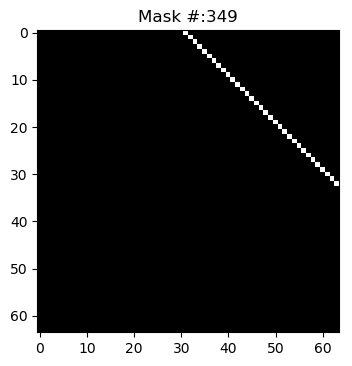

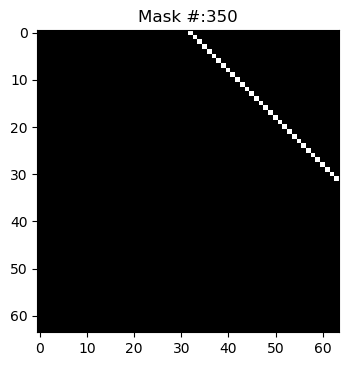

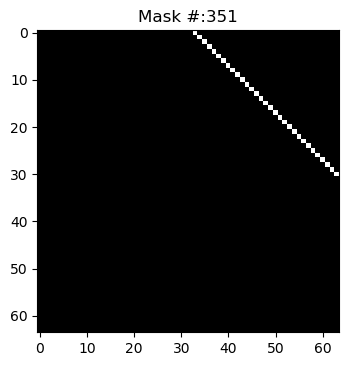

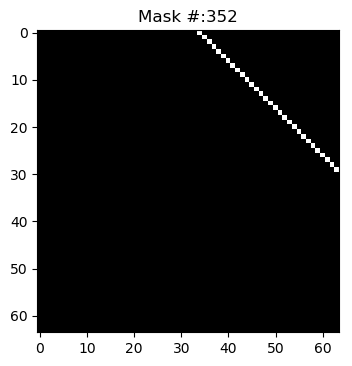

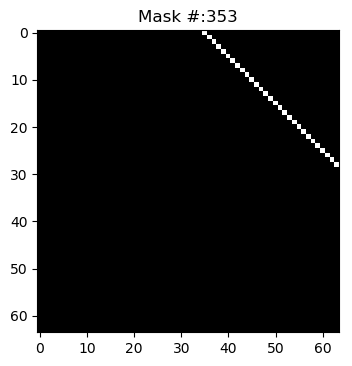

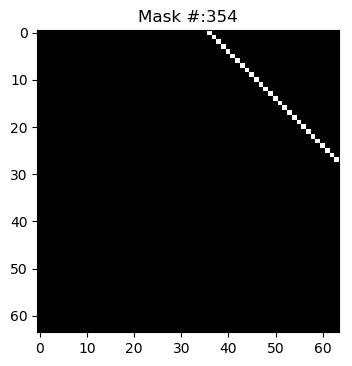

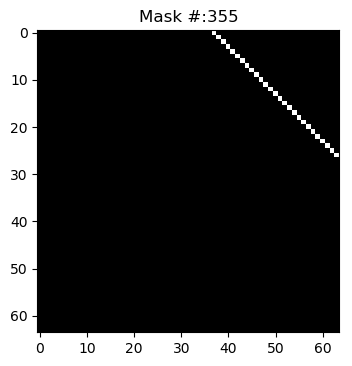

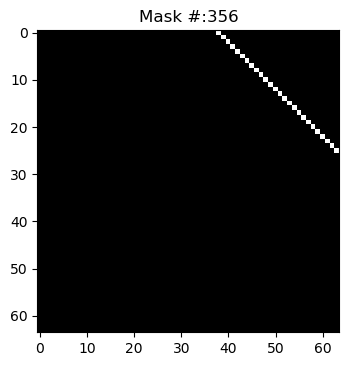

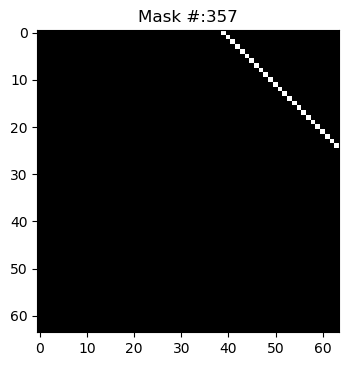

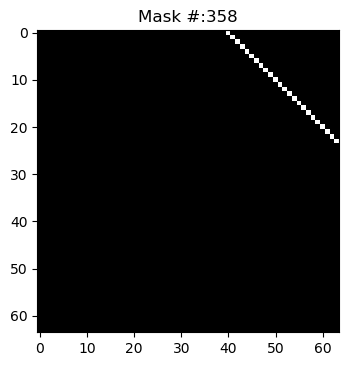

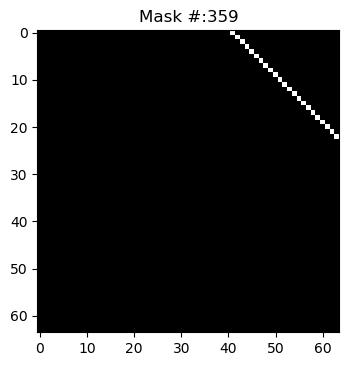

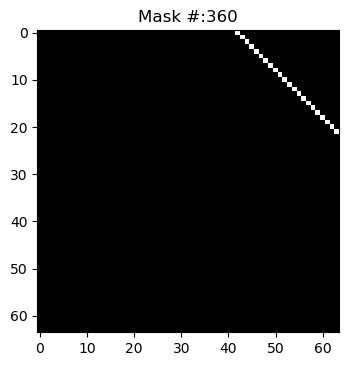

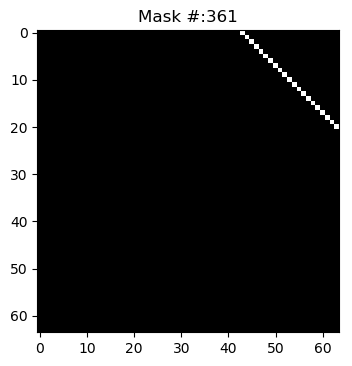

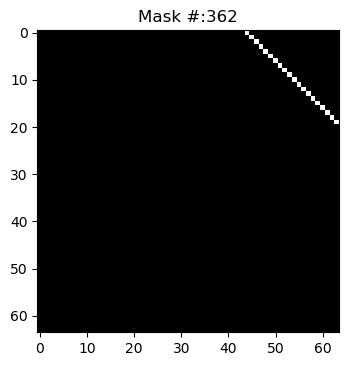

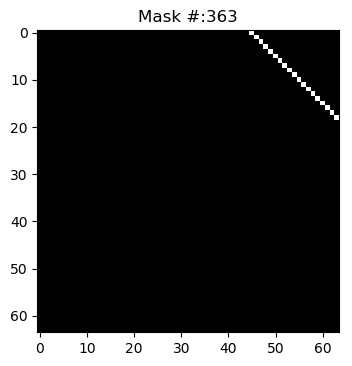

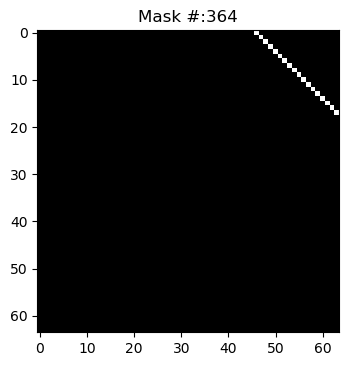

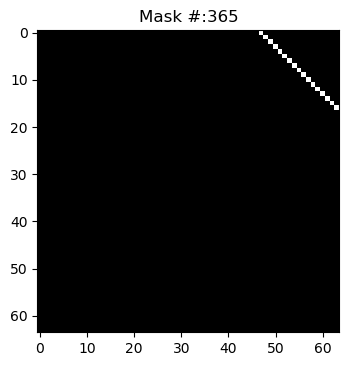

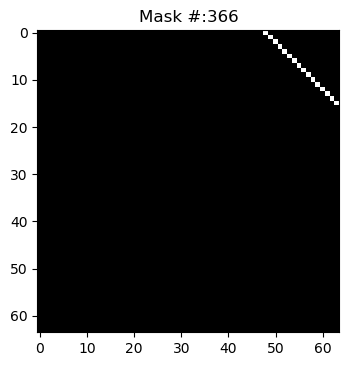

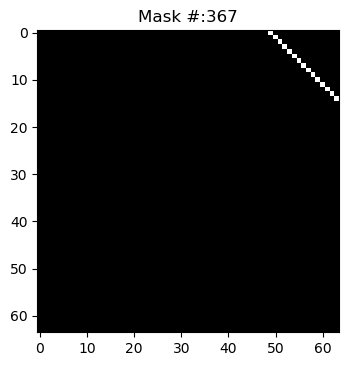

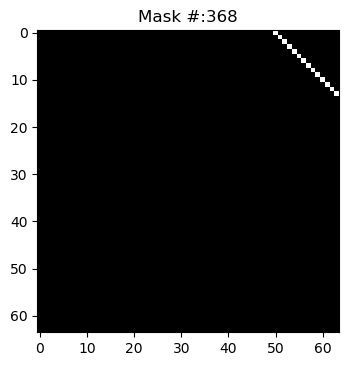

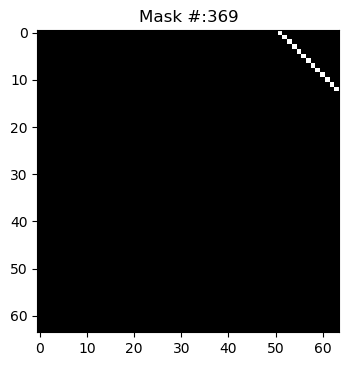

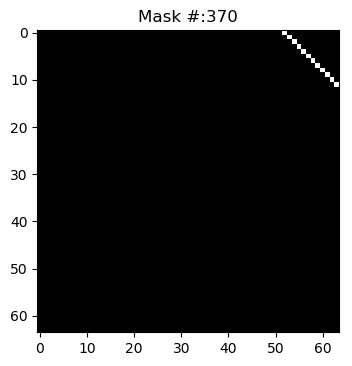

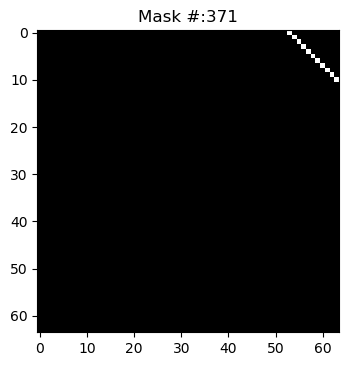

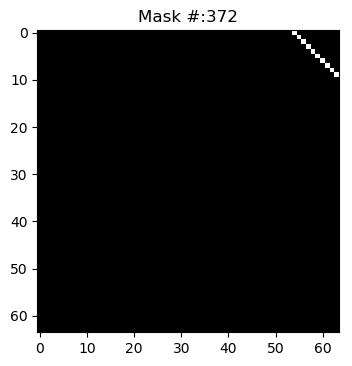

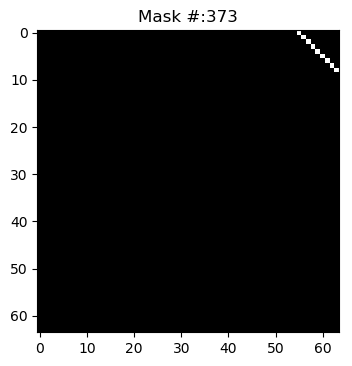

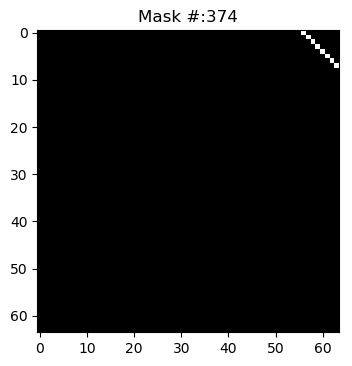

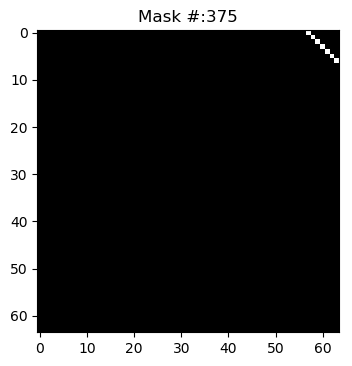

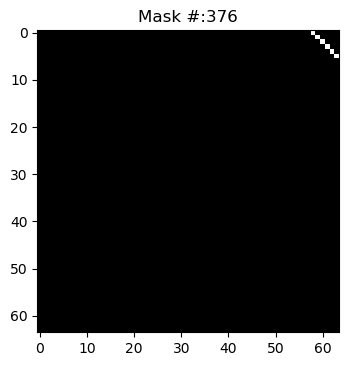

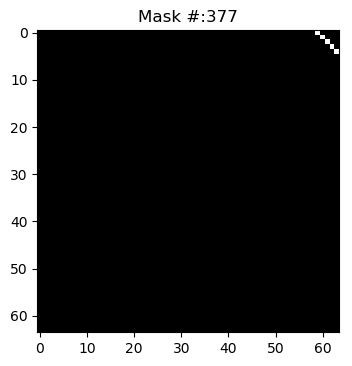

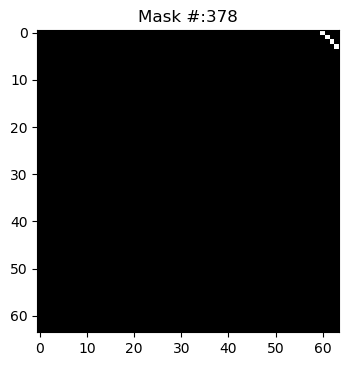

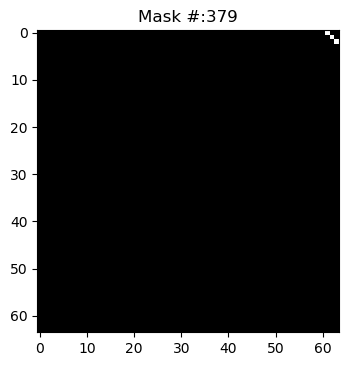

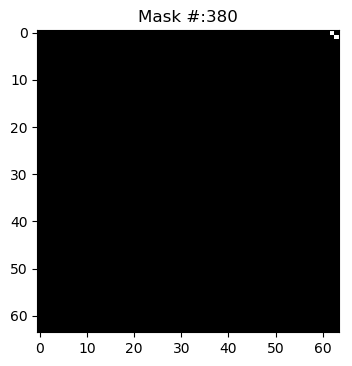

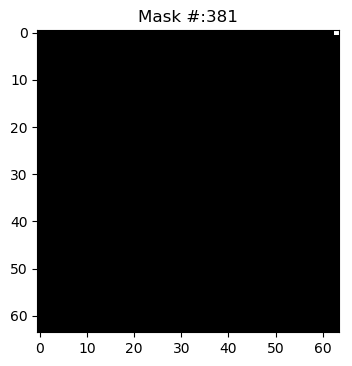

In [78]:
for i in range(0,len(linesToScan)):
    line = np.asarray(linesToScan[i])
    Mask = np.zeros((SizeImage[0],SizeImage[1]))
    for pt in line:
        Mask[tuple(pt)] = 1
    Mask = Mask*255
    f = plt.figure(dpi=100)
    plt.imshow(Image.fromarray(Mask.astype('uint8')))
    
    plt.title('Mask #:' + str(i))
    plt.savefig('./LineMasks/' + str(i) +'.png')


In [124]:
a =[[0,0],[0,2],[1,1],[900,100],[]]
list2 = [x for x in a if x]
list2


[[0, 0], [0, 2], [1, 1], [900, 100]]

In [118]:

remove =[[0,0],[0,2],[1,1],[900,100]]
for i in range(0,len(linesToScan)):
    line = np.asarray(linesToScan[i])
    for rpt in remove:
        line = line[~np.all(line == rpt, axis=1)]
    linesToScan[i] = line.tolist()


AxisError: axis 1 is out of bounds for array of dimension 0

In [128]:
a = np.empty(10)
a[:] = np.nan
a[5] = 5
np.nanmean(a)
        

5.0

Text(0.5, 1.0, 'Mask #:5')

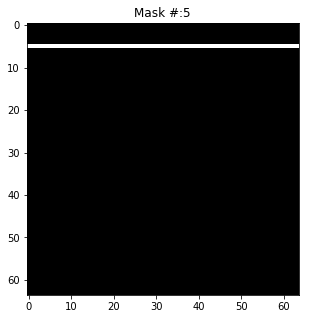

In [29]:
i = 5
line = np.asarray(linesToScan[i])
Mask = np.zeros((SizeImage[0],SizeImage[1]))
for pt in line:
    Mask[tuple(pt)] = 1
Mask = Mask*255
f = plt.figure(figsize=(5,5))
plt.imshow(Image.fromarray(Mask.astype('uint8')))
plt.title('Mask #:' + str(i))

Text(0.5, 1.0, 'Mask #:5')

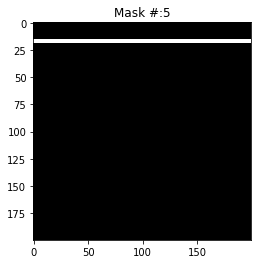

In [16]:
i = 5
line = np.asarray(linesToScan[i])
Mask = np.zeros((SizeImage[0],SizeImage[1]))
for pt in line:
    Mask[tuple(pt)] = 1
Mask = Mask*255
figure()
plt.imshow(Image.fromarray(Mask.astype('uint8')).resize([200,200]))
plt.title('Mask #:' + str(i))

In [ ]:

totalpts = []
for line in linesToScan:
    for pt in line:
        totalpts.append(pt)
totalpts = np.asarray(totalpts)
list = pd.DataFrame(totalpts).duplicated()
for item in list:
    if item == True:
        print('here')


In [ ]:
scanned = [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [0, 13], [0, 14], [0, 15], [0, 16], [0, 17], [0, 18], [0, 19], [0, 20], [0, 21], [0, 22], [0, 23], [0, 24], [0, 25], [0, 26], [0, 27], [0, 28], [0, 29], [0, 30], [0, 31], [0, 32], [0, 33], [0, 34], [0, 35], [0, 36], [0, 37], [0, 38], [0, 39], [0, 40], [0, 41], [0, 42], [0, 43], [0, 44], [0, 45], [0, 46], [0, 47], [0, 48], [0, 49], [0, 50], [0, 51], [0, 52], [0, 53], [0, 54], [0, 55], [0, 56], [0, 57], [0, 58], [0, 59], [0, 60], [0, 61], [0, 62], [0, 63], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [1, 14], [1, 15], [1, 16], [1, 17], [1, 18], [1, 19], [1, 20], [1, 21], [1, 22], [1, 23], [1, 24], [1, 25], [1, 26], [1, 27], [1, 28], [1, 29], [1, 30], [1, 31], [1, 32], [1, 33], [1, 34], [1, 35], [1, 36], [1, 37], [1, 38], [1, 39], [1, 40], [1, 41], [1, 42], [1, 43], [1, 44], [1, 45], [1, 46], [1, 47], [1, 48], [1, 49], [1, 50], [1, 51], [1, 52], [1, 53], [1, 54], [1, 55], [1, 56], [1, 57], [1, 58], [1, 59], [1, 60], [1, 61], [1, 62], [1, 63], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [2, 11], [2, 12], [2, 13], [2, 14], [2, 15], [2, 16], [2, 17], [2, 18], [2, 19], [2, 20], [2, 21], [2, 22], [2, 23], [2, 24], [2, 25], [2, 26], [2, 27], [2, 28], [2, 29], [2, 30], [2, 31], [2, 32], [2, 33], [2, 34], [2, 35], [2, 36], [2, 37], [2, 38], [2, 39], [2, 40], [2, 41], [2, 42], [2, 43], [2, 44], [2, 45], [2, 46], [2, 47], [2, 48], [2, 49], [2, 50], [2, 51], [2, 52], [2, 53], [2, 54], [2, 55], [2, 56], [2, 57], [2, 58], [2, 59], [2, 60], [2, 61], [2, 62], [2, 63], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [3, 10], [3, 11], [3, 12], [3, 13], [3, 14], [3, 15], [3, 16], [3, 17], [3, 18], [3, 19], [3, 20], [3, 21], [3, 22], [3, 23], [3, 24], [3, 25], [3, 26], [3, 27], [3, 28], [3, 29], [3, 30], [3, 31], [3, 32], [3, 33], [3, 34], [3, 35], [3, 36], [3, 37], [3, 38], [3, 39], [3, 40], [3, 41], [3, 42], [3, 43], [3, 44], [3, 45], [3, 46], [3, 47], [3, 48], [3, 49], [3, 50], [3, 51], [3, 52], [3, 53], [3, 54], [3, 55], [3, 56], [3, 57], [3, 58], [3, 59], [3, 60], [3, 61], [3, 62], [3, 63], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [4, 10], [4, 11], [4, 12], [4, 13], [4, 14], [4, 15], [4, 16], [4, 17], [4, 18], [4, 19], [4, 20], [4, 21], [4, 22], [4, 23], [4, 24], [4, 25], [4, 26], [4, 27], [4, 28], [4, 29], [4, 30], [4, 31], [4, 32], [4, 33], [4, 34], [4, 35], [4, 36], [4, 37], [4, 38], [4, 39], [4, 40], [4, 41], [4, 42], [4, 43], [4, 44], [4, 45], [4, 46], [4, 47], [4, 48], [4, 49], [4, 50], [4, 51], [4, 52], [4, 53], [4, 54], [4, 55], [4, 56], [4, 57], [4, 58], [4, 59], [4, 60], [4, 61], [4, 62], [4, 63], [5, 0], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [5, 7], [5, 8], [5, 9], [5, 10], [5, 11], [5, 12], [5, 13], [5, 14], [5, 15], [5, 16], [5, 17], [5, 18], [5, 19], [5, 20], [5, 21], [5, 22], [5, 23], [5, 24], [5, 25], [5, 26], [5, 27], [5, 28], [5, 29], [5, 30], [5, 31], [5, 32], [5, 33], [5, 34], [5, 35], [5, 36], [5, 37], [5, 38], [5, 39], [5, 40], [5, 41], [5, 42], [5, 43], [5, 44], [5, 45], [5, 46], [5, 47], [5, 48], [5, 49], [5, 50], [5, 51], [5, 52], [5, 53], [5, 54], [5, 55], [5, 56], [5, 57], [5, 58], [5, 59], [5, 60], [5, 61], [5, 62], [5, 63], [6, 0], [6, 1], [6, 2], [6, 3], [6, 4], [6, 5], [6, 6], [6, 7], [6, 8], [6, 9], [6, 10], [6, 11], [6, 12], [6, 13], [6, 14], [6, 15], [6, 16], [6, 17], [6, 18], [6, 19], [6, 20], [6, 21], [6, 22], [6, 23], [6, 24], [6, 25], [6, 26], [6, 27], [6, 28], [6, 29], [6, 30], [6, 31], [6, 32], [6, 33], [6, 34], [6, 35], [6, 36], [6, 37], [6, 38], [6, 39], [6, 40], [6, 41], [6, 42], [6, 43], [6, 44], [6, 45], [6, 46], [6, 47], [6, 48], [6, 49], [6, 50], [6, 51], [6, 52], [6, 53], [6, 54], [6, 55], [6, 56], [6, 57], [6, 58], [6, 59], [6, 60], [6, 61], [6, 62], [6, 63], [7, 0], [7, 1], [7, 2], [7, 3], [7, 4], [7, 5], [7, 6], [7, 7], [7, 8], [7, 9], [7, 10], [7, 11], [7, 12], [7, 13], [7, 14], [7, 15], [7, 16], [7, 17], [7, 18], [7, 19], [7, 20], [7, 21], [7, 22], [7, 23], [7, 24], [7, 25], [7, 26], [7, 27], [7, 28], [7, 29], [7, 30], [7, 31], [7, 32], [7, 33], [7, 34], [7, 35], [7, 36], [7, 37], [7, 38], [7, 39], [7, 40], [7, 41], [7, 42], [7, 43], [7, 44], [7, 45], [7, 46], [7, 47], [7, 48], [7, 49], [7, 50], [7, 51], [7, 52], [7, 53], [7, 54], [7, 55], [7, 56], [7, 57], [7, 58], [7, 59], [7, 60], [7, 61], [7, 62], [7, 63], [8, 0], [8, 1], [8, 2], [8, 3], [8, 4], [8, 5], [8, 6], [8, 7], [8, 8], [8, 9], [8, 10], [8, 11], [8, 12], [8, 13], [8, 14], [8, 15], [8, 16], [8, 17], [8, 18], [8, 19], [8, 20], [8, 21], [8, 22], [8, 23], [8, 24], [8, 25], [8, 26], [8, 27], [8, 28], [8, 29], [8, 30], [8, 31], [8, 32], [8, 33], [8, 34], [8, 35], [8, 36], [8, 37], [8, 38], [8, 39], [8, 40], [8, 41], [8, 42], [8, 43], [8, 44], [8, 45], [8, 46], [8, 47], [8, 48], [8, 49], [8, 50], [8, 51], [8, 52], [8, 53], [8, 54], [8, 55], [8, 56], [8, 57], [8, 58], [8, 59], [8, 60], [8, 61], [8, 62], [8, 63], [9, 0], [9, 1], [9, 2], [9, 3], [9, 4], [9, 5], [9, 6], [9, 7], [9, 8], [9, 9], [9, 10], [9, 11], [9, 12], [9, 13], [9, 14], [9, 15], [9, 16], [9, 17], [9, 18], [9, 19], [9, 20], [9, 21], [9, 22], [9, 23], [9, 24], [9, 25], [9, 26], [9, 27], [9, 28], [9, 29], [9, 30], [9, 31], [9, 32], [9, 33], [9, 34], [9, 35], [9, 36], [9, 37], [9, 38], [9, 39], [9, 40], [9, 41], [9, 42], [9, 43], [9, 44], [9, 45], [9, 46], [9, 47], [9, 48], [9, 49], [9, 50], [9, 51], [9, 52], [9, 53], [9, 54], [9, 55], [9, 56], [9, 57], [9, 58], [9, 59], [9, 60], [9, 61], [9, 62], [9, 63], [10, 0], [10, 1], [10, 2], [10, 3], [10, 4], [10, 5], [10, 6], [10, 7], [10, 8], [10, 9], [10, 10], [10, 11], [10, 12], [10, 13], [10, 14], [10, 15], [10, 16], [10, 17], [10, 18], [10, 19], [10, 20], [10, 21], [10, 22], [10, 23], [10, 24], [10, 25], [10, 26], [10, 27], [10, 28], [10, 29], [10, 30], [10, 31], [10, 32], [10, 33], [10, 34], [10, 35], [10, 36], [10, 37], [10, 38], [10, 39], [10, 40], [10, 41], [10, 42], [10, 43], [10, 44], [10, 45], [10, 46], [10, 47], [10, 48], [10, 49], [10, 50], [10, 51], [10, 52], [10, 53], [10, 54], [10, 55], [10, 56], [10, 57], [10, 58], [10, 59], [10, 60], [10, 61], [10, 62], [10, 63], [11, 0], [11, 1], [11, 2], [11, 3], [11, 4], [11, 5], [11, 6], [11, 7], [11, 8], [11, 9], [11, 10], [11, 11], [11, 12], [11, 13], [11, 14], [11, 15], [11, 16], [11, 17], [11, 18], [11, 19], [11, 20], [11, 21], [11, 22], [11, 23], [11, 24], [11, 25], [11, 26], [11, 27], [11, 28], [11, 29], [11, 30], [11, 31], [11, 32], [11, 33], [11, 34], [11, 35], [11, 36], [11, 37], [11, 38], [11, 39], [11, 40], [11, 41], [11, 42], [11, 43], [11, 44], [11, 45], [11, 46], [11, 47], [11, 48], [11, 49], [11, 50], [11, 51], [11, 52], [11, 53], [11, 54], [11, 55], [11, 56], [11, 57], [11, 58], [11, 59], [11, 60], [11, 61], [11, 62], [11, 63], [12, 0], [12, 1], [12, 2], [12, 3], [12, 4], [12, 5], [12, 6], [12, 7], [12, 8], [12, 9], [12, 10], [12, 11], [12, 12], [12, 13], [12, 14], [12, 15], [12, 16], [12, 17], [12, 18], [12, 19], [12, 20], [12, 21], [12, 22], [12, 23], [12, 24], [12, 25], [12, 26], [12, 27], [12, 28], [12, 29], [12, 30], [12, 31], [12, 32], [12, 33], [12, 34], [12, 35], [12, 36], [12, 37], [12, 38], [12, 39], [12, 40], [12, 41], [12, 42], [12, 43], [12, 44], [12, 45], [12, 46], [12, 47], [12, 48], [12, 49], [12, 50], [12, 51], [12, 52], [12, 53], [12, 54], [12, 55], [12, 56], [12, 57], [12, 58], [12, 59], [12, 60], [12, 61], [12, 62], [12, 63], [13, 0], [13, 1], [13, 2], [13, 3], [13, 4], [13, 5], [13, 6], [13, 7], [13, 8], [13, 9], [13, 10], [13, 11], [13, 12], [13, 13], [13, 14], [13, 15], [13, 16], [13, 17], [13, 18], [13, 19], [13, 20], [13, 21], [13, 22], [13, 23], [13, 24], [13, 25], [13, 26], [13, 27], [13, 28], [13, 29], [13, 30], [13, 31], [13, 32], [13, 33], [13, 34], [13, 35], [13, 36], [13, 37], [13, 38], [13, 39], [13, 40], [13, 41], [13, 42], [13, 43], [13, 44], [13, 45], [13, 46], [13, 47], [13, 48], [13, 49], [13, 50], [13, 51], [13, 52], [13, 53], [13, 54], [13, 55], [13, 56], [13, 57], [13, 58], [13, 59], [13, 60], [13, 61], [13, 62], [13, 63], [14, 0], [14, 1], [14, 2], [14, 3], [14, 4], [14, 5], [14, 6], [14, 7], [14, 8], [14, 9], [14, 10], [14, 11], [14, 12], [14, 13], [14, 14], [14, 15], [14, 16], [14, 17], [14, 18], [14, 19], [14, 20], [14, 21], [14, 22], [14, 23], [14, 24], [14, 25], [14, 26], [14, 27], [14, 28], [14, 29], [14, 30], [14, 31], [14, 32], [14, 33], [14, 34], [14, 35], [14, 36], [14, 37], [14, 38], [14, 39], [14, 40], [14, 41], [14, 42], [14, 43], [14, 44], [14, 45], [14, 46], [14, 47], [14, 48], [14, 49], [14, 50], [14, 51], [14, 52], [14, 53], [14, 54], [14, 55], [14, 56], [14, 57], [14, 58], [14, 59], [14, 60], [14, 61], [14, 62], [14, 63], [15, 0], [15, 1], [15, 2], [15, 3], [15, 4], [15, 5], [15, 6], [15, 7], [15, 8], [15, 9], [15, 10], [15, 11], [15, 12], [15, 13], [15, 14], [15, 15], [15, 16], [15, 17], [15, 18], [15, 19], [15, 20], [15, 21], [15, 22], [15, 23], [15, 24], [15, 25], [15, 26], [15, 27], [15, 28], [15, 29], [15, 30], [15, 31], [15, 32], [15, 33], [15, 34], [15, 35], [15, 36], [15, 37], [15, 38], [15, 39], [15, 40], [15, 41], [15, 42], [15, 43], [15, 44], [15, 45], [15, 46], [15, 47], [15, 48], [15, 49], [15, 50], [15, 51], [15, 52], [15, 53], [15, 54], [15, 55], [15, 56], [15, 57], [15, 58], [15, 59], [15, 60], [15, 61], [15, 62], [15, 63], [16, 0], [16, 1], [16, 2], [16, 3], [16, 4], [16, 5], [16, 6], [16, 7], [16, 8], [16, 9], [16, 10], [16, 11], [16, 12], [16, 13], [16, 14], [16, 15], [16, 16], [16, 17], [16, 18], [16, 19], [16, 20], [16, 21], [16, 22], [16, 23], [16, 24], [16, 25], [16, 26], [16, 27], [16, 28], [16, 29], [16, 30], [16, 31], [16, 32], [16, 33], [16, 34], [16, 35], [16, 36], [16, 37], [16, 38], [16, 39], [16, 40], [16, 41], [16, 42], [16, 43], [16, 44], [16, 45], [16, 46], [16, 47], [16, 48], [16, 49], [16, 50], [16, 51], [16, 52], [16, 53], [16, 54], [16, 55], [16, 56], [16, 57], [16, 58], [16, 59], [16, 60], [16, 61], [17, 0], [17, 1], [17, 2], [17, 3], [17, 4], [17, 5], [17, 6], [17, 7], [17, 8], [17, 9], [17, 10], [17, 11], [17, 12], [17, 13], [17, 14], [17, 15], [17, 16], [17, 17], [17, 18], [17, 19], [17, 20], [17, 21], [17, 22], [17, 23], [17, 24], [17, 25], [17, 26], [17, 27], [17, 28], [17, 29], [17, 30], [17, 31], [17, 32], [17, 33], [17, 34], [17, 35], [17, 36], [17, 37], [17, 38], [17, 39], [17, 40], [17, 41], [17, 42], [17, 43], [17, 44], [17, 45], [17, 46], [17, 47], [17, 48], [17, 49], [17, 50], [17, 51], [17, 52], [17, 53], [17, 54], [17, 55], [17, 56], [17, 57], [17, 58], [17, 59], [17, 62], [17, 63], [18, 0], [18, 1], [18, 2], [18, 3], [18, 4], [18, 5], [18, 6], [18, 7], [18, 8], [18, 9], [18, 10], [18, 11], [18, 12], [18, 13], [18, 14], [18, 15], [18, 16], [18, 17], [18, 18], [18, 19], [18, 20], [18, 21], [18, 22], [18, 23], [18, 24], [18, 25], [18, 26], [18, 27], [18, 28], [18, 29], [18, 30], [18, 31], [18, 32], [18, 33], [18, 34], [18, 35], [18, 36], [18, 37], [18, 38], [18, 39], [18, 40], [18, 41], [18, 42], [18, 43], [18, 44], [18, 45], [18, 46], [18, 47], [18, 48], [18, 49], [18, 50], [18, 51], [18, 52], [18, 53], [18, 54], [18, 55], [18, 56], [18, 57], [18, 60], [18, 61], [18, 62], [18, 63], [19, 0], [19, 1], [19, 2], [19, 3], [19, 4], [19, 5], [19, 6], [19, 7], [19, 8], [19, 9], [19, 10], [19, 11], [19, 12], [19, 13], [19, 14], [19, 15], [19, 16], [19, 17], [19, 18], [19, 19], [19, 20], [19, 21], [19, 22], [19, 23], [19, 24], [19, 25], [19, 26], [19, 27], [19, 28], [19, 29], [19, 30], [19, 31], [19, 32], [19, 33], [19, 34], [19, 35], [19, 36], [19, 37], [19, 38], [19, 39], [19, 40], [19, 41], [19, 42], [19, 43], [19, 44], [19, 45], [19, 46], [19, 47], [19, 48], [19, 49], [19, 50], [19, 51], [19, 52], [19, 53], [19, 54], [19, 55], [19, 58], [19, 59], [19, 60], [19, 61], [19, 62], [19, 63], [20, 0], [20, 1], [20, 2], [20, 3], [20, 4], [20, 5], [20, 6], [20, 7], [20, 8], [20, 9], [20, 10], [20, 11], [20, 12], [20, 13], [20, 14], [20, 15], [20, 16], [20, 17], [20, 18], [20, 19], [20, 20], [20, 21], [20, 22], [20, 23], [20, 24], [20, 25], [20, 26], [20, 27], [20, 28], [20, 29], [20, 30], [20, 31], [20, 32], [20, 33], [20, 34], [20, 35], [20, 36], [20, 37], [20, 38], [20, 39], [20, 40], [20, 41], [20, 42], [20, 43], [20, 44], [20, 45], [20, 46], [20, 47], [20, 48], [20, 49], [20, 50], [20, 51], [20, 52], [20, 53], [20, 56], [20, 57], [20, 58], [20, 59], [20, 60], [20, 61], [20, 62], [20, 63], [21, 0], [21, 1], [21, 2], [21, 3], [21, 4], [21, 5], [21, 6], [21, 7], [21, 8], [21, 9], [21, 10], [21, 11], [21, 12], [21, 13], [21, 14], [21, 15], [21, 16], [21, 17], [21, 18], [21, 19], [21, 20], [21, 21], [21, 22], [21, 23], [21, 24], [21, 25], [21, 26], [21, 27], [21, 28], [21, 29], [21, 30], [21, 31], [21, 32], [21, 33], [21, 34], [21, 35], [21, 36], [21, 37], [21, 38], [21, 39], [21, 40], [21, 41], [21, 42], [21, 43], [21, 44], [21, 45], [21, 46], [21, 47], [21, 48], [21, 49], [21, 50], [21, 54], [21, 55], [21, 56], [21, 57], [21, 58], [21, 59], [21, 60], [21, 61], [21, 62], [21, 63], [22, 0], [22, 1], [22, 2], [22, 3], [22, 4], [22, 5], [22, 6], [22, 7], [22, 8], [22, 9], [22, 10], [22, 11], [22, 12], [22, 13], [22, 14], [22, 15], [22, 16], [22, 17], [22, 18], [22, 19], [22, 20], [22, 21], [22, 22], [22, 23], [22, 24], [22, 25], [22, 26], [22, 27], [22, 28], [22, 29], [22, 30], [22, 31], [22, 32], [22, 33], [22, 34], [22, 35], [22, 36], [22, 37], [22, 38], [22, 39], [22, 40], [22, 41], [22, 42], [22, 43], [22, 44], [22, 45], [22, 46], [22, 47], [22, 48], [22, 51], [22, 52], [22, 53], [22, 54], [22, 55], [22, 56], [22, 57], [22, 58], [22, 59], [22, 60], [22, 61], [22, 62], [22, 63], [23, 0], [23, 1], [23, 2], [23, 3], [23, 4], [23, 5], [23, 6], [23, 7], [23, 8], [23, 9], [23, 10], [23, 11], [23, 12], [23, 13], [23, 14], [23, 15], [23, 16], [23, 17], [23, 18], [23, 19], [23, 20], [23, 21], [23, 22], [23, 23], [23, 24], [23, 25], [23, 26], [23, 27], [23, 28], [23, 29], [23, 30], [23, 31], [23, 32], [23, 33], [23, 34], [23, 35], [23, 36], [23, 37], [23, 38], [23, 39], [23, 40], [23, 41], [23, 42], [23, 43], [23, 44], [23, 45], [23, 46], [23, 47], [23, 49], [23, 50], [23, 51], [23, 52], [23, 53], [23, 54], [23, 55], [23, 56], [23, 57], [23, 58], [23, 59], [23, 60], [23, 61], [23, 62], [23, 63], [24, 0], [24, 1], [24, 2], [24, 3], [24, 4], [24, 5], [24, 6], [24, 7], [24, 8], [24, 9], [24, 10], [24, 11], [24, 12], [24, 13], [24, 14], [24, 15], [24, 16], [24, 17], [24, 18], [24, 19], [24, 20], [24, 21], [24, 22], [24, 23], [24, 24], [24, 25], [24, 26], [24, 27], [24, 28], [24, 29], [24, 30], [24, 31], [24, 32], [24, 33], [24, 34], [24, 35], [24, 36], [24, 37], [24, 38], [24, 39], [24, 40], [24, 41], [24, 42], [24, 43], [24, 44], [24, 48], [24, 49], [24, 50], [24, 51], [24, 52], [24, 53], [24, 54], [24, 55], [24, 56], [24, 57], [24, 58], [24, 59], [24, 60], [24, 61], [24, 62], [24, 63], [25, 0], [25, 1], [25, 2], [25, 3], [25, 4], [25, 5], [25, 6], [25, 7], [25, 8], [25, 9], [25, 10], [25, 11], [25, 12], [25, 13], [25, 14], [25, 15], [25, 16], [25, 17], [25, 18], [25, 19], [25, 20], [25, 21], [25, 22], [25, 23], [25, 24], [25, 25], [25, 26], [25, 27], [25, 28], [25, 29], [25, 30], [25, 31], [25, 32], [25, 33], [25, 34], [25, 35], [25, 36], [25, 37], [25, 38], [25, 39], [25, 40], [25, 41], [25, 42], [25, 45], [25, 46], [25, 47], [25, 48], [25, 49], [25, 50], [25, 51], [25, 52], [25, 53], [25, 54], [25, 55], [25, 56], [25, 57], [25, 58], [25, 59], [25, 60], [25, 61], [25, 62], [25, 63], [26, 0], [26, 1], [26, 2], [26, 3], [26, 4], [26, 5], [26, 6], [26, 7], [26, 8], [26, 9], [26, 10], [26, 11], [26, 12], [26, 13], [26, 14], [26, 15], [26, 16], [26, 17], [26, 18], [26, 19], [26, 20], [26, 21], [26, 22], [26, 23], [26, 24], [26, 25], [26, 26], [26, 27], [26, 28], [26, 29], [26, 30], [26, 31], [26, 32], [26, 33], [26, 34], [26, 35], [26, 36], [26, 37], [26, 38], [26, 39], [26, 43], [26, 44], [26, 45], [26, 46], [26, 47], [26, 48], [26, 49], [26, 50], [26, 51], [26, 52], [26, 53], [26, 54], [26, 55], [26, 56], [26, 57], [26, 58], [26, 59], [26, 60], [26, 61], [26, 62], [26, 63], [27, 0], [27, 1], [27, 2], [27, 3], [27, 4], [27, 5], [27, 6], [27, 7], [27, 8], [27, 9], [27, 10], [27, 11], [27, 12], [27, 13], [27, 14], [27, 15], [27, 16], [27, 17], [27, 18], [27, 19], [27, 20], [27, 21], [27, 22], [27, 23], [27, 24], [27, 25], [27, 26], [27, 27], [27, 28], [27, 29], [27, 30], [27, 31], [27, 32], [27, 33], [27, 34], [27, 35], [27, 36], [27, 37], [27, 38], [27, 40], [27, 41], [27, 42], [27, 43], [27, 44], [27, 45], [27, 46], [27, 47], [27, 48], [27, 49], [27, 50], [27, 51], [27, 52], [27, 53], [27, 54], [27, 55], [27, 56], [27, 57], [27, 58], [27, 59], [27, 60], [27, 61], [27, 62], [27, 63], [28, 0], [28, 1], [28, 2], [28, 3], [28, 4], [28, 5], [28, 6], [28, 7], [28, 8], [28, 9], [28, 10], [28, 11], [28, 12], [28, 13], [28, 14], [28, 15], [28, 16], [28, 17], [28, 18], [28, 19], [28, 20], [28, 21], [28, 22], [28, 23], [28, 24], [28, 25], [28, 26], [28, 27], [28, 28], [28, 29], [28, 30], [28, 31], [28, 32], [28, 33], [28, 34], [28, 35], [28, 36], [28, 39], [28, 40], [28, 41], [28, 42], [28, 43], [28, 44], [28, 45], [28, 46], [28, 47], [28, 48], [28, 49], [28, 50], [28, 51], [28, 52], [28, 53], [28, 54], [28, 55], [28, 56], [28, 57], [28, 58], [28, 59], [28, 60], [28, 61], [28, 62], [28, 63], [29, 0], [29, 1], [29, 2], [29, 3], [29, 4], [29, 5], [29, 6], [29, 7], [29, 8], [29, 9], [29, 10], [29, 11], [29, 12], [29, 13], [29, 14], [29, 15], [29, 16], [29, 17], [29, 18], [29, 19], [29, 20], [29, 21], [29, 22], [29, 23], [29, 24], [29, 25], [29, 26], [29, 27], [29, 28], [29, 29], [29, 30], [29, 31], [29, 32], [29, 33], [29, 37], [29, 38], [29, 39], [29, 40], [29, 41], [29, 42], [29, 43], [29, 44], [29, 45], [29, 46], [29, 47], [29, 48], [29, 49], [29, 50], [29, 51], [29, 52], [29, 53], [29, 54], [29, 55], [29, 56], [29, 57], [29, 58], [29, 59], [29, 60], [29, 61], [29, 62], [29, 63], [30, 0], [30, 1], [30, 2], [30, 3], [30, 4], [30, 5], [30, 6], [30, 7], [30, 8], [30, 9], [30, 10], [30, 11], [30, 12], [30, 13], [30, 14], [30, 15], [30, 16], [30, 17], [30, 18], [30, 19], [30, 20], [30, 21], [30, 22], [30, 23], [30, 24], [30, 25], [30, 26], [30, 27], [30, 28], [30, 29], [30, 30], [30, 31], [30, 34], [30, 35], [30, 36], [30, 37], [30, 38], [30, 39], [30, 40], [30, 41], [30, 42], [30, 43], [30, 44], [30, 45], [30, 46], [30, 47], [30, 48], [30, 49], [30, 50], [30, 51], [30, 52], [30, 53], [30, 54], [30, 55], [30, 56], [30, 57], [30, 58], [30, 59], [30, 60], [30, 61], [30, 62], [30, 63], [31, 0], [31, 1], [31, 2], [31, 3], [31, 4], [31, 5], [31, 6], [31, 7], [31, 8], [31, 9], [31, 10], [31, 11], [31, 12], [31, 13], [31, 14], [31, 15], [31, 16], [31, 17], [31, 18], [31, 19], [31, 20], [31, 21], [31, 22], [31, 23], [31, 24], [31, 25], [31, 26], [31, 27], [31, 28], [31, 29], [31, 32], [31, 33], [31, 34], [31, 35], [31, 36], [31, 37], [31, 38], [31, 39], [31, 40], [31, 41], [31, 42], [31, 43], [31, 44], [31, 45], [31, 46], [31, 47], [31, 48], [31, 49], [31, 50], [31, 51], [31, 52], [31, 53], [31, 54], [31, 55], [31, 56], [31, 57], [31, 58], [31, 59], [31, 60], [31, 61], [31, 62], [31, 63], [32, 0], [32, 1], [32, 2], [32, 3], [32, 4], [32, 5], [32, 6], [32, 7], [32, 8], [32, 9], [32, 10], [32, 11], [32, 12], [32, 13], [32, 14], [32, 15], [32, 16], [32, 17], [32, 18], [32, 19], [32, 20], [32, 21], [32, 22], [32, 23], [32, 24], [32, 25], [32, 26], [32, 27], [32, 30], [32, 31], [32, 32], [32, 33], [32, 34], [32, 35], [32, 36], [32, 37], [32, 38], [32, 39], [32, 40], [32, 41], [32, 42], [32, 43], [32, 44], [32, 45], [32, 46], [32, 47], [32, 48], [32, 49], [32, 50], [32, 51], [32, 52], [32, 53], [32, 54], [32, 55], [32, 56], [32, 57], [32, 58], [32, 59], [32, 60], [32, 61], [32, 62], [32, 63], [33, 0], [33, 1], [33, 2], [33, 3], [33, 4], [33, 5], [33, 6], [33, 7], [33, 8], [33, 9], [33, 10], [33, 11], [33, 12], [33, 13], [33, 14], [33, 15], [33, 16], [33, 17], [33, 18], [33, 19], [33, 20], [33, 21], [33, 22], [33, 23], [33, 24], [33, 25], [33, 28], [33, 29], [33, 30], [33, 31], [33, 32], [33, 33], [33, 34], [33, 35], [33, 36], [33, 37], [33, 38], [33, 39], [33, 40], [33, 41], [33, 42], [33, 43], [33, 44], [33, 45], [33, 46], [33, 47], [33, 48], [33, 49], [33, 50], [33, 51], [33, 52], [33, 53], [33, 54], [33, 55], [33, 56], [33, 57], [33, 58], [33, 59], [33, 60], [33, 61], [33, 62], [33, 63], [34, 0], [34, 1], [34, 2], [34, 3], [34, 4], [34, 5], [34, 6], [34, 7], [34, 8], [34, 9], [34, 10], [34, 11], [34, 12], [34, 13], [34, 14], [34, 15], [34, 16], [34, 17], [34, 18], [34, 19], [34, 20], [34, 21], [34, 22], [34, 23], [34, 26], [34, 27], [34, 28], [34, 29], [34, 30], [34, 31], [34, 32], [34, 33], [34, 34], [34, 35], [34, 36], [34, 37], [34, 38], [34, 39], [34, 40], [34, 41], [34, 42], [34, 43], [34, 44], [34, 45], [34, 46], [34, 47], [34, 48], [34, 49], [34, 50], [34, 51], [34, 52], [34, 53], [34, 54], [34, 55], [34, 56], [34, 57], [34, 58], [34, 59], [34, 60], [34, 61], [34, 62], [34, 63], [35, 0], [35, 1], [35, 2], [35, 3], [35, 4], [35, 5], [35, 6], [35, 7], [35, 8], [35, 9], [35, 10], [35, 11], [35, 12], [35, 13], [35, 14], [35, 15], [35, 16], [35, 17], [35, 18], [35, 19], [35, 20], [35, 24], [35, 25], [35, 26], [35, 27], [35, 28], [35, 29], [35, 30], [35, 31], [35, 32], [35, 33], [35, 34], [35, 35], [35, 36], [35, 37], [35, 38], [35, 39], [35, 40], [35, 41], [35, 42], [35, 43], [35, 44], [35, 45], [35, 46], [35, 47], [35, 48], [35, 49], [35, 50], [35, 51], [35, 52], [35, 53], [35, 54], [35, 55], [35, 56], [35, 57], [35, 58], [35, 59], [35, 60], [35, 61], [35, 62], [35, 63], [36, 0], [36, 1], [36, 2], [36, 3], [36, 4], [36, 5], [36, 6], [36, 7], [36, 8], [36, 9], [36, 10], [36, 11], [36, 12], [36, 13], [36, 14], [36, 15], [36, 16], [36, 17], [36, 18], [36, 19], [36, 21], [36, 22], [36, 23], [36, 24], [36, 25], [36, 26], [36, 27], [36, 28], [36, 29], [36, 30], [36, 31], [36, 32], [36, 33], [36, 34], [36, 35], [36, 36], [36, 37], [36, 38], [36, 39], [36, 40], [36, 41], [36, 42], [36, 43], [36, 44], [36, 45], [36, 46], [36, 47], [36, 48], [36, 49], [36, 50], [36, 51], [36, 52], [36, 53], [36, 54], [36, 55], [36, 56], [36, 57], [36, 58], [36, 59], [36, 60], [36, 61], [36, 62], [36, 63], [37, 0], [37, 1], [37, 2], [37, 3], [37, 4], [37, 5], [37, 6], [37, 7], [37, 8], [37, 9], [37, 10], [37, 11], [37, 12], [37, 13], [37, 14], [37, 15], [37, 16], [37, 20], [37, 21], [37, 22], [37, 23], [37, 24], [37, 25], [37, 26], [37, 27], [37, 28], [37, 29], [37, 30], [37, 31], [37, 32], [37, 33], [37, 34], [37, 35], [37, 36], [37, 37], [37, 38], [37, 39], [37, 40], [37, 41], [37, 42], [37, 43], [37, 44], [37, 45], [37, 46], [37, 47], [37, 48], [37, 49], [37, 50], [37, 51], [37, 52], [37, 53], [37, 54], [37, 55], [37, 56], [37, 57], [37, 58], [37, 59], [37, 60], [37, 61], [37, 62], [37, 63], [38, 0], [38, 1], [38, 2], [38, 3], [38, 4], [38, 5], [38, 6], [38, 7], [38, 8], [38, 9], [38, 10], [38, 11], [38, 12], [38, 13], [38, 14], [38, 17], [38, 18], [38, 19], [38, 20], [38, 21], [38, 22], [38, 23], [38, 24], [38, 25], [38, 26], [38, 27], [38, 28], [38, 29], [38, 30], [38, 31], [38, 32], [38, 33], [38, 34], [38, 35], [38, 36], [38, 37], [38, 38], [38, 39], [38, 40], [38, 41], [38, 42], [38, 43], [38, 44], [38, 45], [38, 46], [38, 47], [38, 48], [38, 49], [38, 50], [38, 51], [38, 52], [38, 53], [38, 54], [38, 55], [38, 56], [38, 57], [38, 58], [38, 59], [38, 60], [38, 61], [38, 62], [38, 63], [39, 0], [39, 1], [39, 2], [39, 3], [39, 4], [39, 5], [39, 6], [39, 7], [39, 8], [39, 9], [39, 10], [39, 11], [39, 12], [39, 15], [39, 16], [39, 17], [39, 18], [39, 19], [39, 20], [39, 21], [39, 22], [39, 23], [39, 24], [39, 25], [39, 26], [39, 27], [39, 28], [39, 29], [39, 30], [39, 31], [39, 32], [39, 33], [39, 34], [39, 35], [39, 36], [39, 37], [39, 38], [39, 39], [39, 40], [39, 41], [39, 42], [39, 43], [39, 44], [39, 45], [39, 46], [39, 47], [39, 48], [39, 49], [39, 50], [39, 51], [39, 52], [39, 53], [39, 54], [39, 55], [39, 56], [39, 57], [39, 58], [39, 59], [39, 60], [39, 61], [39, 62], [39, 63], [40, 0], [40, 1], [40, 2], [40, 3], [40, 4], [40, 5], [40, 6], [40, 7], [40, 8], [40, 9], [40, 13], [40, 14], [40, 15], [40, 16], [40, 17], [40, 18], [40, 19], [40, 20], [40, 21], [40, 22], [40, 23], [40, 24], [40, 25], [40, 26], [40, 27], [40, 28], [40, 29], [40, 30], [40, 31], [40, 32], [40, 33], [40, 34], [40, 35], [40, 36], [40, 37], [40, 38], [40, 39], [40, 40], [40, 41], [40, 42], [40, 43], [40, 44], [40, 45], [40, 46], [40, 47], [40, 48], [40, 49], [40, 50], [40, 51], [40, 52], [40, 53], [40, 54], [40, 55], [40, 56], [40, 57], [40, 58], [40, 59], [40, 60], [40, 61], [40, 62], [40, 63], [41, 0], [41, 1], [41, 2], [41, 3], [41, 4], [41, 5], [41, 6], [41, 7], [41, 8], [41, 10], [41, 11], [41, 12], [41, 13], [41, 14], [41, 15], [41, 16], [41, 17], [41, 18], [41, 19], [41, 20], [41, 21], [41, 22], [41, 23], [41, 24], [41, 25], [41, 26], [41, 27], [41, 28], [41, 29], [41, 30], [41, 31], [41, 32], [41, 33], [41, 34], [41, 35], [41, 36], [41, 37], [41, 38], [41, 39], [41, 40], [41, 41], [41, 42], [41, 43], [41, 44], [41, 45], [41, 46], [41, 47], [41, 48], [41, 49], [41, 50], [41, 51], [41, 52], [41, 53], [41, 54], [41, 55], [41, 56], [41, 57], [41, 58], [41, 59], [41, 60], [41, 61], [41, 62], [41, 63], [42, 0], [42, 1], [42, 2], [42, 3], [42, 4], [42, 5], [42, 6], [42, 9], [42, 10], [42, 11], [42, 12], [42, 13], [42, 14], [42, 15], [42, 16], [42, 17], [42, 18], [42, 19], [42, 20], [42, 21], [42, 22], [42, 23], [42, 24], [42, 25], [42, 26], [42, 27], [42, 28], [42, 29], [42, 30], [42, 31], [42, 32], [42, 33], [42, 34], [42, 35], [42, 36], [42, 37], [42, 38], [42, 39], [42, 40], [42, 41], [42, 42], [42, 43], [42, 44], [42, 45], [42, 46], [42, 47], [42, 48], [42, 49], [42, 50], [42, 51], [42, 52], [42, 53], [42, 54], [42, 55], [42, 56], [42, 57], [42, 58], [42, 59], [42, 60], [42, 61], [42, 62], [42, 63], [43, 0], [43, 1], [43, 2], [43, 3], [43, 7], [43, 8], [43, 9], [43, 10], [43, 11], [43, 12], [43, 13], [43, 14], [43, 15], [43, 16], [43, 17], [43, 18], [43, 19], [43, 20], [43, 21], [43, 22], [43, 23], [43, 24], [43, 25], [43, 26], [43, 27], [43, 28], [43, 29], [43, 30], [43, 31], [43, 32], [43, 33], [43, 34], [43, 35], [43, 36], [43, 37], [43, 38], [43, 39], [43, 40], [43, 41], [43, 42], [43, 43], [43, 44], [43, 45], [43, 46], [43, 47], [43, 48], [43, 49], [43, 50], [43, 51], [43, 52], [43, 53], [43, 54], [43, 55], [43, 56], [43, 57], [43, 58], [43, 59], [43, 60], [43, 61], [43, 62], [43, 63], [44, 0], [44, 1], [44, 4], [44, 5], [44, 6], [44, 7], [44, 8], [44, 9], [44, 10], [44, 11], [44, 12], [44, 13], [44, 14], [44, 15], [44, 16], [44, 17], [44, 18], [44, 19], [44, 20], [44, 21], [44, 22], [44, 23], [44, 24], [44, 25], [44, 26], [44, 27], [44, 28], [44, 29], [44, 30], [44, 31], [44, 32], [44, 33], [44, 34], [44, 35], [44, 36], [44, 37], [44, 38], [44, 39], [44, 40], [44, 41], [44, 42], [44, 43], [44, 44], [44, 45], [44, 46], [44, 47], [44, 48], [44, 49], [44, 50], [44, 51], [44, 52], [44, 53], [44, 54], [44, 55], [44, 56], [44, 57], [44, 58], [44, 59], [44, 60], [44, 61], [44, 62], [44, 63], [45, 2], [45, 3], [45, 4], [45, 5], [45, 6], [45, 7], [45, 8], [45, 9], [45, 10], [45, 11], [45, 12], [45, 13], [45, 14], [45, 15], [45, 16], [45, 17], [45, 18], [45, 19], [45, 20], [45, 21], [45, 22], [45, 23], [45, 24], [45, 25], [45, 26], [45, 27], [45, 28], [45, 29], [45, 30], [45, 31], [45, 32], [45, 33], [45, 34], [45, 35], [45, 36], [45, 37], [45, 38], [45, 39], [45, 40], [45, 41], [45, 42], [45, 43], [45, 44], [45, 45], [45, 46], [45, 47], [45, 48], [45, 49], [45, 50], [45, 51], [45, 52], [45, 53], [45, 54], [45, 55], [45, 56], [45, 57], [45, 58], [45, 59], [45, 60], [45, 61], [45, 62], [45, 63], [46, 0], [46, 1], [46, 2], [46, 3], [46, 4], [46, 5], [46, 6], [46, 7], [46, 8], [46, 9], [46, 10], [46, 11], [46, 12], [46, 13], [46, 14], [46, 15], [46, 16], [46, 17], [46, 18], [46, 19], [46, 20], [46, 21], [46, 22], [46, 23], [46, 24], [46, 25], [46, 26], [46, 27], [46, 28], [46, 29], [46, 30], [46, 31], [46, 32], [46, 33], [46, 34], [46, 35], [46, 36], [46, 37], [46, 38], [46, 39], [46, 40], [46, 41], [46, 42], [46, 43], [46, 44], [46, 45], [46, 46], [46, 47], [46, 48], [46, 49], [46, 50], [46, 51], [46, 52], [46, 53], [46, 54], [46, 55], [46, 56], [46, 57], [46, 58], [46, 59], [46, 60], [46, 61], [46, 62], [46, 63], [47, 0], [47, 1], [47, 2], [47, 3], [47, 4], [47, 5], [47, 6], [47, 7], [47, 8], [47, 9], [47, 10], [47, 11], [47, 12], [47, 13], [47, 14], [47, 15], [47, 16], [47, 17], [47, 18], [47, 19], [47, 20], [47, 21], [47, 22], [47, 23], [47, 24], [47, 25], [47, 26], [47, 27], [47, 28], [47, 29], [47, 30], [47, 31], [47, 32], [47, 33], [47, 34], [47, 35], [47, 36], [47, 37], [47, 38], [47, 39], [47, 40], [47, 41], [47, 42], [47, 43], [47, 44], [47, 45], [47, 46], [47, 47], [47, 48], [47, 49], [47, 50], [47, 51], [47, 52], [47, 53], [47, 54], [47, 55], [47, 56], [47, 57], [47, 58], [47, 59], [47, 60], [47, 61], [47, 62], [47, 63], [48, 0], [48, 1], [48, 2], [48, 3], [48, 4], [48, 5], [48, 6], [48, 7], [48, 8], [48, 9], [48, 10], [48, 11], [48, 12], [48, 13], [48, 14], [48, 15], [48, 16], [48, 17], [48, 18], [48, 19], [48, 20], [48, 21], [48, 22], [48, 23], [48, 24], [48, 25], [48, 26], [48, 27], [48, 28], [48, 29], [48, 30], [48, 31], [48, 32], [48, 33], [48, 34], [48, 35], [48, 36], [48, 37], [48, 38], [48, 39], [48, 40], [48, 41], [48, 42], [48, 43], [48, 44], [48, 45], [48, 46], [48, 47], [48, 48], [48, 49], [48, 50], [48, 51], [48, 52], [48, 53], [48, 54], [48, 55], [48, 56], [48, 57], [48, 58], [48, 59], [48, 60], [48, 61], [48, 62], [48, 63], [49, 0], [49, 1], [49, 2], [49, 3], [49, 4], [49, 5], [49, 6], [49, 7], [49, 8], [49, 9], [49, 10], [49, 11], [49, 12], [49, 13], [49, 14], [49, 15], [49, 16], [49, 17], [49, 18], [49, 19], [49, 20], [49, 21], [49, 22], [49, 23], [49, 24], [49, 25], [49, 26], [49, 27], [49, 28], [49, 29], [49, 30], [49, 31], [49, 32], [49, 33], [49, 34], [49, 35], [49, 36], [49, 37], [49, 38], [49, 39], [49, 40], [49, 41], [49, 42], [49, 43], [49, 44], [49, 45], [49, 46], [49, 47], [49, 48], [49, 49], [49, 50], [49, 51], [49, 52], [49, 53], [49, 54], [49, 55], [49, 56], [49, 57], [49, 58], [49, 59], [49, 60], [49, 61], [49, 62], [49, 63], [50, 0], [50, 1], [50, 2], [50, 3], [50, 4], [50, 5], [50, 6], [50, 7], [50, 8], [50, 9], [50, 10], [50, 11], [50, 12], [50, 13], [50, 14], [50, 15], [50, 16], [50, 17], [50, 18], [50, 19], [50, 20], [50, 21], [50, 22], [50, 23], [50, 24], [50, 25], [50, 26], [50, 27], [50, 28], [50, 29], [50, 30], [50, 31], [50, 32], [50, 33], [50, 34], [50, 35], [50, 36], [50, 37], [50, 38], [50, 39], [50, 40], [50, 41], [50, 42], [50, 43], [50, 44], [50, 45], [50, 46], [50, 47], [50, 48], [50, 49], [50, 50], [50, 51], [50, 52], [50, 53], [50, 54], [50, 55], [50, 56], [50, 57], [50, 58], [50, 59], [50, 60], [50, 61], [50, 62], [50, 63], [51, 0], [51, 1], [51, 2], [51, 3], [51, 4], [51, 5], [51, 6], [51, 7], [51, 8], [51, 9], [51, 10], [51, 11], [51, 12], [51, 13], [51, 14], [51, 15], [51, 16], [51, 17], [51, 18], [51, 19], [51, 20], [51, 21], [51, 22], [51, 23], [51, 24], [51, 25], [51, 26], [51, 27], [51, 28], [51, 29], [51, 30], [51, 31], [51, 32], [51, 33], [51, 34], [51, 35], [51, 36], [51, 37], [51, 38], [51, 39], [51, 40], [51, 41], [51, 42], [51, 43], [51, 44], [51, 45], [51, 46], [51, 47], [51, 48], [51, 49], [51, 50], [51, 51], [51, 52], [51, 53], [51, 54], [51, 55], [51, 56], [51, 57], [51, 58], [51, 59], [51, 60], [51, 61], [51, 62], [51, 63], [52, 0], [52, 1], [52, 2], [52, 3], [52, 4], [52, 5], [52, 6], [52, 7], [52, 8], [52, 9], [52, 10], [52, 11], [52, 12], [52, 13], [52, 14], [52, 15], [52, 16], [52, 17], [52, 18], [52, 19], [52, 20], [52, 21], [52, 22], [52, 23], [52, 24], [52, 25], [52, 26], [52, 27], [52, 28], [52, 29], [52, 30], [52, 31], [52, 32], [52, 33], [52, 34], [52, 35], [52, 36], [52, 37], [52, 38], [52, 39], [52, 40], [52, 41], [52, 42], [52, 43], [52, 44], [52, 45], [52, 46], [52, 47], [52, 48], [52, 49], [52, 50], [52, 51], [52, 52], [52, 53], [52, 54], [52, 55], [52, 56], [52, 57], [52, 58], [52, 59], [52, 60], [52, 61], [52, 62], [52, 63], [53, 0], [53, 1], [53, 2], [53, 3], [53, 4], [53, 5], [53, 6], [53, 7], [53, 8], [53, 9], [53, 10], [53, 11], [53, 12], [53, 13], [53, 14], [53, 15], [53, 16], [53, 17], [53, 18], [53, 19], [53, 20], [53, 21], [53, 22], [53, 23], [53, 24], [53, 25], [53, 26], [53, 27], [53, 28], [53, 29], [53, 30], [53, 31], [53, 32], [53, 33], [53, 34], [53, 35], [53, 36], [53, 37], [53, 38], [53, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [53, 48], [53, 49], [53, 50], [53, 51], [53, 52], [53, 53], [53, 54], [53, 55], [53, 56], [53, 57], [53, 58], [53, 59], [53, 60], [53, 61], [53, 62], [53, 63], [54, 0], [54, 1], [54, 2], [54, 3], [54, 4], [54, 5], [54, 6], [54, 7], [54, 8], [54, 9], [54, 10], [54, 11], [54, 12], [54, 13], [54, 14], [54, 15], [54, 16], [54, 17], [54, 18], [54, 19], [54, 20], [54, 21], [54, 22], [54, 23], [54, 24], [54, 25], [54, 26], [54, 27], [54, 28], [54, 29], [54, 30], [54, 31], [54, 32], [54, 33], [54, 34], [54, 35], [54, 36], [54, 37], [54, 38], [54, 39], [54, 40], [54, 41], [54, 42], [54, 43], [54, 44], [54, 45], [54, 46], [54, 47], [54, 48], [54, 49], [54, 50], [54, 51], [54, 52], [54, 53], [54, 54], [54, 55], [54, 56], [54, 57], [54, 58], [54, 59], [54, 60], [54, 61], [54, 62], [54, 63], [55, 0], [55, 1], [55, 2], [55, 3], [55, 4], [55, 5], [55, 6], [55, 7], [55, 8], [55, 9], [55, 10], [55, 11], [55, 12], [55, 13], [55, 14], [55, 15], [55, 16], [55, 17], [55, 18], [55, 19], [55, 20], [55, 21], [55, 22], [55, 23], [55, 24], [55, 25], [55, 26], [55, 27], [55, 28], [55, 29], [55, 30], [55, 31], [55, 32], [55, 33], [55, 34], [55, 35], [55, 36], [55, 37], [55, 38], [55, 39], [55, 40], [55, 41], [55, 42], [55, 43], [55, 44], [55, 45], [55, 46], [55, 47], [55, 48], [55, 49], [55, 50], [55, 51], [55, 52], [55, 53], [55, 54], [55, 55], [55, 56], [55, 57], [55, 58], [55, 59], [55, 60], [55, 61], [55, 62], [55, 63], [56, 0], [56, 1], [56, 2], [56, 3], [56, 4], [56, 5], [56, 6], [56, 7], [56, 8], [56, 9], [56, 10], [56, 11], [56, 12], [56, 13], [56, 14], [56, 15], [56, 16], [56, 17], [56, 18], [56, 19], [56, 20], [56, 21], [56, 22], [56, 23], [56, 24], [56, 25], [56, 26], [56, 27], [56, 28], [56, 29], [56, 30], [56, 31], [56, 32], [56, 33], [56, 34], [56, 35], [56, 36], [56, 37], [56, 38], [56, 39], [56, 40], [56, 41], [56, 42], [56, 43], [56, 44], [56, 45], [56, 46], [56, 47], [56, 48], [56, 49], [56, 50], [56, 51], [56, 52], [56, 53], [56, 54], [56, 55], [56, 56], [56, 57], [56, 58], [56, 59], [56, 60], [56, 61], [56, 62], [56, 63], [57, 0], [57, 1], [57, 2], [57, 3], [57, 4], [57, 5], [57, 6], [57, 7], [57, 8], [57, 9], [57, 10], [57, 11], [57, 12], [57, 13], [57, 14], [57, 15], [57, 16], [57, 17], [57, 18], [57, 19], [57, 20], [57, 21], [57, 22], [57, 23], [57, 24], [57, 25], [57, 26], [57, 27], [57, 28], [57, 29], [57, 30], [57, 31], [57, 32], [57, 33], [57, 34], [57, 35], [57, 36], [57, 37], [57, 38], [57, 39], [57, 40], [57, 41], [57, 42], [57, 43], [57, 44], [57, 45], [57, 46], [57, 47], [57, 48], [57, 49], [57, 50], [57, 51], [57, 52], [57, 53], [57, 54], [57, 55], [57, 56], [57, 57], [57, 58], [57, 59], [57, 60], [57, 61], [57, 62], [57, 63], [58, 0], [58, 1], [58, 2], [58, 3], [58, 4], [58, 5], [58, 6], [58, 7], [58, 8], [58, 9], [58, 10], [58, 11], [58, 12], [58, 13], [58, 14], [58, 15], [58, 16], [58, 17], [58, 18], [58, 19], [58, 20], [58, 21], [58, 22], [58, 23], [58, 24], [58, 25], [58, 26], [58, 27], [58, 28], [58, 29], [58, 30], [58, 31], [58, 32], [58, 33], [58, 34], [58, 35], [58, 36], [58, 37], [58, 38], [58, 39], [58, 40], [58, 41], [58, 42], [58, 43], [58, 44], [58, 45], [58, 46], [58, 47], [58, 48], [58, 49], [58, 50], [58, 51], [58, 52], [58, 53], [58, 54], [58, 55], [58, 56], [58, 57], [58, 58], [58, 59], [58, 60], [58, 61], [58, 62], [58, 63], [59, 0], [59, 1], [59, 2], [59, 3], [59, 4], [59, 5], [59, 6], [59, 7], [59, 8], [59, 9], [59, 10], [59, 11], [59, 12], [59, 13], [59, 14], [59, 15], [59, 16], [59, 17], [59, 18], [59, 19], [59, 20], [59, 21], [59, 22], [59, 23], [59, 24], [59, 25], [59, 26], [59, 27], [59, 28], [59, 29], [59, 30], [59, 31], [59, 32], [59, 33], [59, 34], [59, 35], [59, 36], [59, 37], [59, 38], [59, 39], [59, 40], [59, 41], [59, 42], [59, 43], [59, 44], [59, 45], [59, 46], [59, 47], [59, 48], [59, 49], [59, 50], [59, 51], [59, 52], [59, 53], [59, 54], [59, 55], [59, 56], [59, 57], [59, 58], [59, 59], [59, 60], [59, 61], [59, 62], [59, 63], [60, 0], [60, 1], [60, 2], [60, 3], [60, 4], [60, 5], [60, 6], [60, 7], [60, 8], [60, 9], [60, 10], [60, 11], [60, 12], [60, 13], [60, 14], [60, 15], [60, 16], [60, 17], [60, 18], [60, 19], [60, 20], [60, 21], [60, 22], [60, 23], [60, 24], [60, 25], [60, 26], [60, 27], [60, 28], [60, 29], [60, 30], [60, 31], [60, 32], [60, 33], [60, 34], [60, 35], [60, 36], [60, 37], [60, 38], [60, 39], [60, 40], [60, 41], [60, 42], [60, 43], [60, 44], [60, 45], [60, 46], [60, 47], [60, 48], [60, 49], [60, 50], [60, 51], [60, 52], [60, 53], [60, 54], [60, 55], [60, 56], [60, 57], [60, 58], [60, 59], [60, 60], [60, 61], [60, 62], [60, 63], [61, 0], [61, 1], [61, 2], [61, 3], [61, 4], [61, 5], [61, 6], [61, 7], [61, 8], [61, 9], [61, 10], [61, 11], [61, 12], [61, 13], [61, 14], [61, 15], [61, 16], [61, 17], [61, 18], [61, 19], [61, 20], [61, 21], [61, 22], [61, 23], [61, 24], [61, 25], [61, 26], [61, 27], [61, 28], [61, 29], [61, 30], [61, 31], [61, 32], [61, 33], [61, 34], [61, 35], [61, 36], [61, 37], [61, 38], [61, 39], [61, 40], [61, 41], [61, 42], [61, 43], [61, 44], [61, 45], [61, 46], [61, 47], [61, 48], [61, 49], [61, 50], [61, 51], [61, 52], [61, 53], [61, 54], [61, 55], [61, 56], [61, 57], [61, 58], [61, 59], [61, 60], [61, 61], [61, 62], [61, 63], [62, 0], [62, 1], [62, 2], [62, 3], [62, 4], [62, 5], [62, 6], [62, 7], [62, 8], [62, 9], [62, 10], [62, 11], [62, 12], [62, 13], [62, 14], [62, 15], [62, 16], [62, 17], [62, 18], [62, 19], [62, 20], [62, 21], [62, 22], [62, 23], [62, 24], [62, 25], [62, 26], [62, 27], [62, 28], [62, 29], [62, 30], [62, 31], [62, 32], [62, 33], [62, 34], [62, 35], [62, 36], [62, 37], [62, 38], [62, 39], [62, 40], [62, 41], [62, 42], [62, 43], [62, 44], [62, 45], [62, 46], [62, 47], [62, 48], [62, 49], [62, 50], [62, 51], [62, 52], [62, 53], [62, 54], [62, 55], [62, 56], [62, 57], [62, 58], [62, 59], [62, 60], [62, 61], [62, 62], [62, 63], [63, 0], [63, 1], [63, 2], [63, 3], [63, 4], [63, 5], [63, 6], [63, 7], [63, 8], [63, 9], [63, 10], [63, 11], [63, 12], [63, 13], [63, 14], [63, 15], [63, 16], [63, 17], [63, 18], [63, 19], [63, 20], [63, 21], [63, 22], [63, 23], [63, 24], [63, 25], [63, 26], [63, 27], [63, 28], [63, 29], [63, 30], [63, 31], [63, 32], [63, 33], [63, 34], [63, 35], [63, 36], [63, 37], [63, 38], [63, 39], [63, 40], [63, 41], [63, 42], [63, 43], [63, 44], [63, 45], [63, 46], [63, 47], [63, 48], [63, 49], [63, 50], [63, 51], [63, 52], [63, 53], [63, 54], [63, 55], [63, 56], [63, 57], [63, 58], [63, 59], [63, 60], [63, 61], [63, 62], [63, 63]]
scanned = np.asarray(scanned)

new = []
xValues = np.flip(scanned[:,0]).tolist()
yValues = scanned[:,1].tolist()
for i in range(0, len(xValues)):
    new.append([xValues[i],yValues[i]])



In [ ]:
np.linspace(0,360, int((360/45)+1))

In [11]:
manualAngleDiff = 20
manualStartAngle = 0
manualStopAngle = 180-manualAngleDiff

manualAngles = np.linspace(manualStartAngle,manualStopAngle, int(((manualStopAngle-manualStartAngle)/manualAngleDiff)+1)).astype(int)
manualAngles

array([  0,  20,  40,  60,  80, 100, 120, 140, 160])

In [12]:
a = [[0,1],[0,2],[0,3],[0,4],[0,5],[0,6],[0,7]]
b = [[0,1],[0,2],[0,3],[0,4],[0,5]]
np.nansum(a)



28

In [2]:
np.linspace(manualStartAngle,manualStopAngle, int(((manualStopAngle-manualStartAngle)/manualAngleDiff)+1)).astype(int)

NameError: name 'np' is not defined

In [8]:
180/6

30.0

In [2]:
manualStartAngle = 0
manualStopAngle = 0
manualAngleDiff = 20



In [3]:
np.linspace(manualStartAngle,manualStopAngle, int(((manualStopAngle-manualStartAngle)/manualAngleDiff)+1)).astype(int)


array([0])

In [36]:
a.pop()

AttributeError: 'numpy.ndarray' object has no attribute 'pop'

In [103]:


line = [[9, 0], [9, 1], [9, 2], [9, 3], [9, 4], [9, 5], [9, 6], [9, 7], [9, 8], [9, 9], [9, 10], [9, 11], [9, 12], [9, 13], [9, 14], [9, 15], [9, 16], [9, 17], [9, 18], [9, 19], [9, 20], [9, 21], [9, 22], [9, 23], [9, 24], [9, 25], [9, 26], [9, 27], [9, 28], [9, 29], [9, 30], [9, 31], [9, 32], [9, 33], [9, 34], [9, 35], [9, 36], [9, 37], [9, 38], [9, 39], [9, 40], [9, 41], [9, 42], [9, 43], [9, 44], [9, 45], [9, 46], [9, 47], [9, 48], [9, 49], [9, 50], [9, 51], [9, 52], [9, 53], [9, 54], [9, 55], [9, 56], [9, 57], [9, 58], [9, 59], [9, 60], [9, 61], [9, 62], [9, 63]]


[[[1, 1], [1, 2], [1, 1]], [[1, 1], [1, 2], [1, 1]]]

[[1, 1], [1, 2], [1, 1]]

In [ ]:


#GENERATE SPIRAL
initialPts = []
theta = np.radians(np.linspace(0,360*5,100000))
r = theta**2
xValues = np.asarray(r*np.cos(theta)).astype('int').tolist()
yValues = np.asarray(r*np.sin(theta)).astype('int').tolist()
for i in range(0,len(xValues)):
    initialPts.append([xValues[i],yValues[i]])
initialPts = np.asarray(pd.DataFrame(initialPts).drop_duplicates())

In [ ]:
plt.plot(np.asarray(initialPts)[:,0],np.asarray(initialPts)[:,1],'.')


In [50]:
ReconImage

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [15]:
filterArray

(7.0, array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

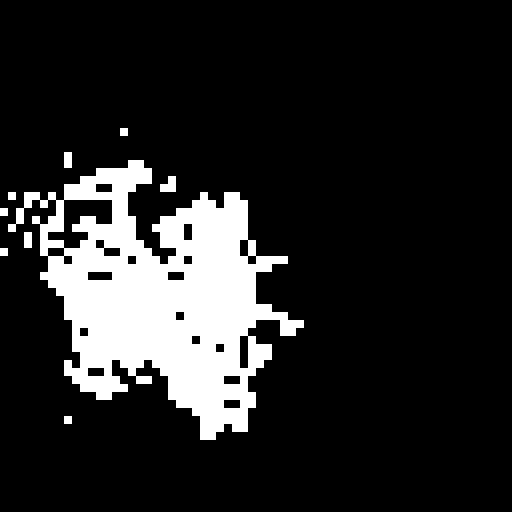

In [21]:
import cv2
img = Image.open('test.jpg').convert('L') #Read in an image as grayscale
img = np.asarray(img).copy()

times = []
symDim = 64
thresholdValue = np.std(img)/2


ReconImage = np.asarray(Image.open('test.jpg').convert('L').resize([symDim,symDim])).copy()
ERDValuesNP = np.ones([ReconImage.shape[0],ReconImage.shape[1]]) 
retValue, filterArray = cv2.threshold(img,thresholdValue,255,cv2.THRESH_BINARY)
#filterArray = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,65,0)

Image.fromarray(filterArray).resize([512,512])




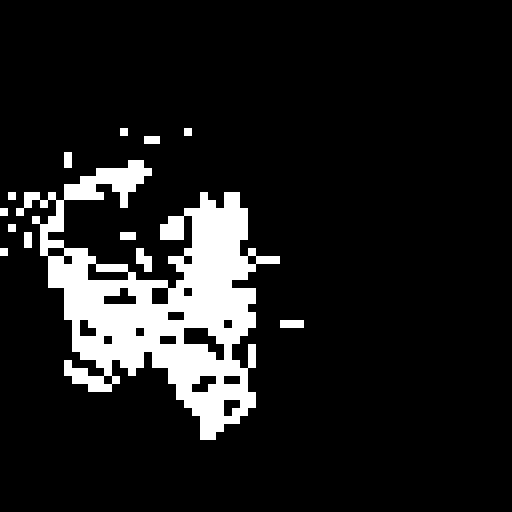

In [49]:
#filterArray = cv2.threshold(img,0,255,cv2.THRESH_OTSU)[1]
filterArray = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,65,0)
Image.fromarray(filterArray).resize([512,512])

(array([1.146e+04, 5.730e+02, 1.650e+02, 4.800e+01, 1.500e+01, 1.800e+01,
        6.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00]),
 array([  0.,  17.,  34.,  51.,  68.,  85., 102., 119., 136., 153., 170.,
        187., 204., 221., 238., 255.]),
 <a list of 15 Patch objects>)

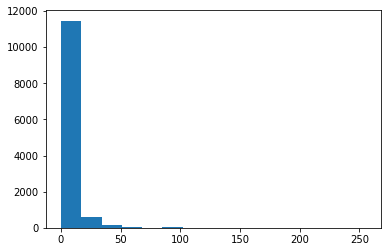

In [340]:
plt.hist(img.flatten(), bins='auto')

In [389]:
import cv2
img = Image.open('test.jpg').convert('L') #Read in an image as grayscale
img = np.asarray(img).copy()

times = []
for symDim in range(1000,50000+1,1000):
    print(symDim)
    ReconImage = np.asarray(Image.open('test.jpg').convert('L').resize([symDim,symDim])).copy()
    ERDValuesNP = np.ones([ReconImage.shape[0],ReconImage.shape[1]]) 
    filterArray = np.empty([ReconImage.shape[0],ReconImage.shape[1]])
    filterArray[:] = np.nan
    
    t0 = time.time()
    filterArray = cv2.threshold(img,0,255,cv2.THRESH_OTSU)[1]
    #filterArray = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,symDim+1,0) > 1
    t1 = time.time()
    times.append(t1-t0)
    
    if (t1-t0) > 1:
        break
    del t0, t1, filterArray, ERDValuesNP, ReconImage

np.savetxt("contour_times6.csv", times, delimiter=",")


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000


In [350]:
cv2.ADAPTIVE_THRESH_GAUSSIAN_C

1

In [338]:
np.histogram(img.flatten())

(array([11790,   408,    57,    24,     6,     0,     0,     0,     0,
            3]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]))

7.586385978854082


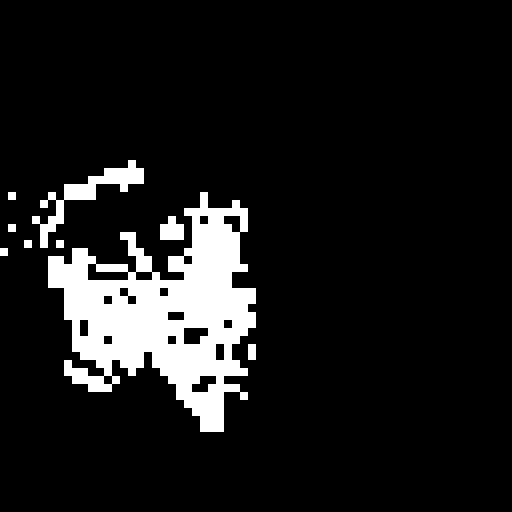

In [370]:
img = Image.open('test.jpg').convert('L') #Read in an image as grayscale
img = np.asarray(img.convert('RGB')).copy()

#Normalize the data from 0 to 255
#img = img/(img.max()/255.0)

stdTest = np.std(img)
print(stdTest)


filterArray = img > stdTest
filteridxs = np.argwhere(filterArray).tolist()
xValues = tuple([x[0] for x in filteridxs])
yValues = tuple([y[1] for y in filteridxs])


ERDValuesNP = np.ones([ReconImage.shape[0],ReconImage.shape[1]]) 


filteredERDValuesNP = np.empty([img.shape[0],img.shape[1]])
filteredERDValuesNP[:] = np.nan
filteredERDValuesNP[xValues, yValues] = ERDValuesNP[xValues, yValues]

Image.fromarray(filteredERDValuesNP.astype('uint8')*255).resize([512,512])
            



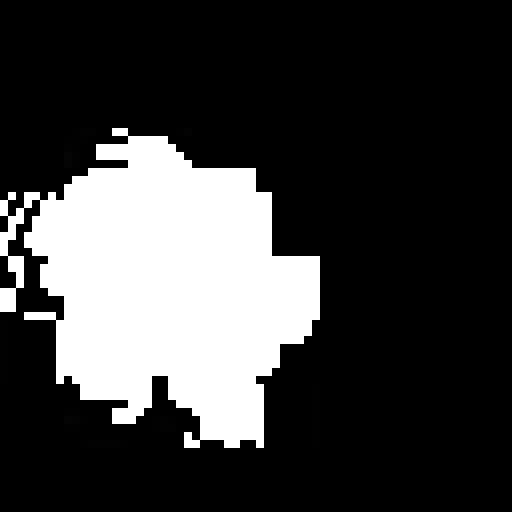

In [320]:

test = Image.open('test.jpg').convert('L') #Read in an image as grayscale
test = np.asarray(test.convert('RGB')).copy()
imgbackup = test.copy()
backup = np.zeros([test.shape[0],test.shape[1]]).astype('uint8')
test = cv2.cvtColor(test,cv2.COLOR_BGR2GRAY)
contours, hierarchy = cv2.findContours(test, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #Identify areas
areas = [cv2.contourArea(c) for c in contours] #Save the areas into an object
imgbackup = cv2.drawContours(np.asarray(imgbackup), [contours[np.argmax(areas)]], -1, (255, 255, 255), -1) #Draw all areas in red into the color image
a = Image.fromarray(imgbackup).resize([512,512])

#testResult = (testResult == 255)
del test, backup
a

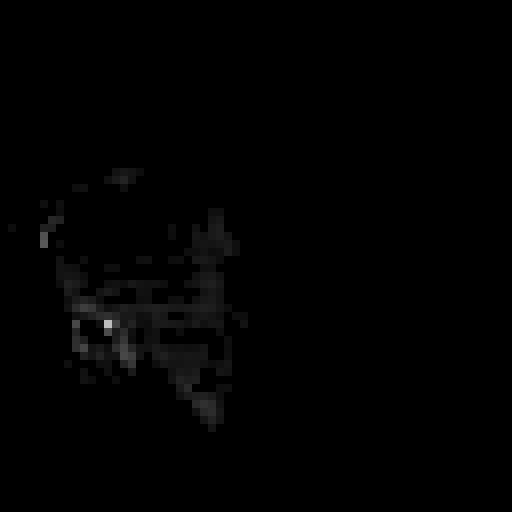

In [126]:
test = Image.open('test.jpg').convert('L') #Read in an image as grayscale
test = np.asarray(test).copy().astype('uint8')
test = test*(test>filters.threshold_otsu(test))
Image.fromarray(test).resize([512,512])




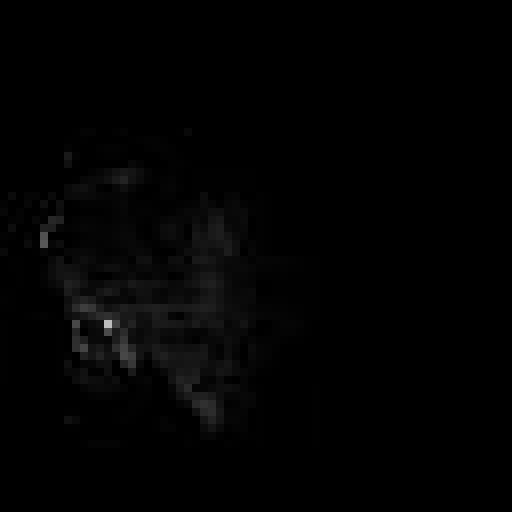

In [160]:
test = Image.open('test.jpg').convert('L') #Read in an image as grayscale
test = np.asarray(test).copy().astype('uint8')
test = test*filterArray
Image.fromarray(test).resize([512,512])




In [162]:
np.max(filterArray)

5

In [300]:
for i in range(5,11,5):
    print(i)

5
10


In [307]:
symDim

18700

In [315]:
times = []
for symDim in range(1000,50000+1,1000):
    print(symDim)
    ReconImage = np.asarray(Image.open('test.jpg').convert('L').resize([symDim,symDim])).copy()
    ERDValuesNP = np.ones([ReconImage.shape[0],ReconImage.shape[1]]) 
    filterArray = np.empty([ReconImage.shape[0],ReconImage.shape[1]])
    filterArray[:] = np.nan
    t0 = time.time()
    contours, hierarchy = cv2.findContours(ReconImage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    areas = [cv2.contourArea(c) for c in contours] #Save the areas into an object
    filterArray = cv2.drawContours(filterArray, [contours[np.argmax(areas)]], -1, (255, 255, 255), -1) > 0 #Draw largest area
    t1 = time.time()
    times.append(t1-t0)
    if (t1-t0) > 1:
        break
    del t0, t1, filterArray, areas, contours, hierarchy, ERDValuesNP, ReconImage

np.savetxt("contour_times4.csv", times, delimiter=",")

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000


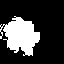

In [281]:
filteredImg = img*filterArray
filteridxs = np.argwhere(filterArray).tolist()
xValues = tuple([x[0] for x in filteridxs])
yValues = tuple([y[1] for y in filteridxs])
filteredERDValuesNP = np.empty([ReconImage.shape[0],ReconImage.shape[1]])
filteredERDValuesNP[:] = np.nan
filteredERDValuesNP[xValues, yValues] = ERDValuesNP[xValues, yValues]

Image.fromarray(filteredERDValuesNP.astype('uint8')*255)    
            

In [273]:
filteridxs

[[16, 14],
 [16, 15],
 [17, 16],
 [17, 17],
 [17, 18],
 [17, 19],
 [17, 20],
 [18, 12],
 [18, 13],
 [18, 14],
 [18, 15],
 [18, 16],
 [18, 17],
 [18, 18],
 [18, 19],
 [18, 20],
 [18, 21],
 [19, 12],
 [19, 13],
 [19, 14],
 [19, 15],
 [19, 16],
 [19, 17],
 [19, 18],
 [19, 19],
 [19, 20],
 [19, 21],
 [19, 22],
 [20, 16],
 [20, 17],
 [20, 18],
 [20, 19],
 [20, 20],
 [20, 21],
 [20, 22],
 [20, 23],
 [21, 11],
 [21, 12],
 [21, 13],
 [21, 14],
 [21, 15],
 [21, 16],
 [21, 17],
 [21, 18],
 [21, 19],
 [21, 20],
 [21, 21],
 [21, 22],
 [21, 23],
 [21, 24],
 [21, 25],
 [21, 26],
 [21, 27],
 [21, 28],
 [21, 29],
 [21, 30],
 [21, 31],
 [22, 9],
 [22, 10],
 [22, 11],
 [22, 12],
 [22, 13],
 [22, 14],
 [22, 15],
 [22, 16],
 [22, 17],
 [22, 18],
 [22, 19],
 [22, 20],
 [22, 21],
 [22, 22],
 [22, 23],
 [22, 24],
 [22, 25],
 [22, 26],
 [22, 27],
 [22, 28],
 [22, 29],
 [22, 30],
 [22, 31],
 [23, 8],
 [23, 9],
 [23, 10],
 [23, 11],
 [23, 12],
 [23, 13],
 [23, 14],
 [23, 15],
 [23, 16],
 [23, 17],
 [23, 18],
 [

In [242]:
a = [1,1,1,1]
b = [2,2,2,2]
c = [3,3,3,3]
d = [4,4,4,4]
z = []
z.append(a)
z.append(b)
z.append(c)
z.append(d)
z = np.asarray(z)
line = np.argwhere(z>3).tolist()
x,y = zip(*line)
z[x,y]


array([4, 4, 4, 4])

In [241]:
z

array([[1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3],
       [4, 4, 4, 4]])

In [236]:
x,y = zip(*idxList)

(2, 2, 2, 2, 3, 3, 3, 3)

In [220]:
z[(1,1),(2,2)]

array([2, 2])

In [221]:
z[(2,2)]

3

In [237]:
z[x,y]

array([3, 3, 3, 3, 4, 4, 4, 4])

In [258]:
filterArray*np.nan

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [265]:
np.argwhere(filterArray).tolist()

[[16, 14],
 [16, 15],
 [17, 16],
 [17, 17],
 [17, 18],
 [17, 19],
 [17, 20],
 [18, 12],
 [18, 13],
 [18, 14],
 [18, 15],
 [18, 16],
 [18, 17],
 [18, 18],
 [18, 19],
 [18, 20],
 [18, 21],
 [19, 12],
 [19, 13],
 [19, 14],
 [19, 15],
 [19, 16],
 [19, 17],
 [19, 18],
 [19, 19],
 [19, 20],
 [19, 21],
 [19, 22],
 [20, 16],
 [20, 17],
 [20, 18],
 [20, 19],
 [20, 20],
 [20, 21],
 [20, 22],
 [20, 23],
 [21, 11],
 [21, 12],
 [21, 13],
 [21, 14],
 [21, 15],
 [21, 16],
 [21, 17],
 [21, 18],
 [21, 19],
 [21, 20],
 [21, 21],
 [21, 22],
 [21, 23],
 [21, 24],
 [21, 25],
 [21, 26],
 [21, 27],
 [21, 28],
 [21, 29],
 [21, 30],
 [21, 31],
 [22, 9],
 [22, 10],
 [22, 11],
 [22, 12],
 [22, 13],
 [22, 14],
 [22, 15],
 [22, 16],
 [22, 17],
 [22, 18],
 [22, 19],
 [22, 20],
 [22, 21],
 [22, 22],
 [22, 23],
 [22, 24],
 [22, 25],
 [22, 26],
 [22, 27],
 [22, 28],
 [22, 29],
 [22, 30],
 [22, 31],
 [23, 8],
 [23, 9],
 [23, 10],
 [23, 11],
 [23, 12],
 [23, 13],
 [23, 14],
 [23, 15],
 [23, 16],
 [23, 17],
 [23, 18],
 [

In [262]:
64*64

4096

In [263]:
np.sum(filterArray)

970

In [49]:
list = ['./ImageResults/mz518.3126_518.3334fnSlide1ns72LCHCIV_CHotlines_1.png',
       './ImageResults/mz518.3126_518.3334fnSlide1ns72LCHCIV_CHotlines_0.png',
       './ImageResults/mz518.3126_518.3334fnSlide1ns72LCHCIV_CHotlines_2.png',
       './ImageResults/mz518.3126_518.3334fnSlide1ns72LCHCIV_CHotlines_10.png',
       './ImageResults/mz518.3126_518.3334fnSlide1ns72LCHCIV_CHotlines_5.png',
       ]
sorted(list)

['./ImageResults/mz518.3126_518.3334fnSlide1ns72LCHCIV_CHotlines_0.png',
 './ImageResults/mz518.3126_518.3334fnSlide1ns72LCHCIV_CHotlines_1.png',
 './ImageResults/mz518.3126_518.3334fnSlide1ns72LCHCIV_CHotlines_10.png',
 './ImageResults/mz518.3126_518.3334fnSlide1ns72LCHCIV_CHotlines_2.png',
 './ImageResults/mz518.3126_518.3334fnSlide1ns72LCHCIV_CHotlines_5.png']

In [51]:
import natsort 
natsort.natsorted(list)





['./ImageResults/mz518.3126_518.3334fnSlide1ns72LCHCIV_CHotlines_0.png',
 './ImageResults/mz518.3126_518.3334fnSlide1ns72LCHCIV_CHotlines_1.png',
 './ImageResults/mz518.3126_518.3334fnSlide1ns72LCHCIV_CHotlines_2.png',
 './ImageResults/mz518.3126_518.3334fnSlide1ns72LCHCIV_CHotlines_5.png',
 './ImageResults/mz518.3126_518.3334fnSlide1ns72LCHCIV_CHotlines_10.png']

In [34]:
list.sort()


In [43]:
def last_4chars(x):
    return(x[-5:])

sorted(list, key = last_4chars)   

['./ImageResults/mz518.3126_518.3334fnSlide1ns72LCHCIV_CHotlines_00.png',
 './ImageResults/mz518.3126_518.3334fnSlide1ns72LCHCIV_CHotlines_10.png',
 './ImageResults/mz518.3126_518.3334fnSlide1ns72LCHCIV_CHotlines_01.png',
 './ImageResults/mz518.3126_518.3334fnSlide1ns72LCHCIV_CHotlines_02.png',
 './ImageResults/mz518.3126_518.3334fnSlide1ns72LCHCIV_CHotlines_05.png']

In [35]:
SSIM_testingResults = np.load('./ssim_results.mat.npy')

In [106]:

avgResults = resultsAverager(SSIM_testingResults)


In [105]:
from itertools import zip_longest

def resultsAverager(testingResults):
    c = []
    for result in SSIM_testingResults: c.append(result)
    meanValues = []
    filteredValues = []
    for x in zip_longest(*c): 
        filtered = []
        for value in x: 
            if value != None: 
                filtered.append(value)
        filteredValues.append(filtered)
        meanValues.append(np.mean(filtered))
    return meanValues

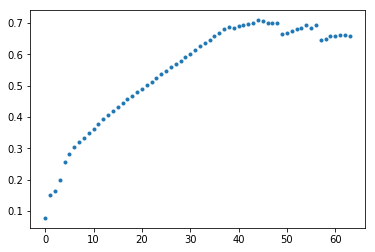

In [91]:
plt.plot(meanValues,'.')

In [103]:
filteredValues[63]

[0.6594556536796161]